# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

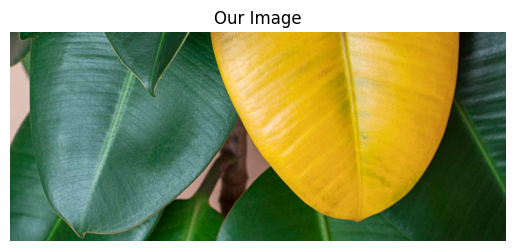

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [2]:
import base64
with open("image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOmZmZmMxNGM5LThkZjctNDY0Yi05

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

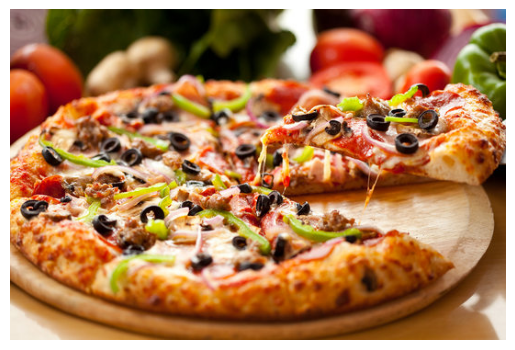

In [3]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image1 = """ /9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOmZmZmMxNGM5LThkZjctNDY0Yi05ZmI3LTJiNGIxMDBjYTk1MDwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD54bXAuaWlkOjM1Njc3ZDI2LTkyNTUtNDEyMy1hYjk5LWU3ZTE0YWRjM2Y3YTwveG1wTU06SW5zdGFuY2VJRD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgBaAIcAwERAAIRAQMRAf/EAB0AAAIDAQEBAQEAAAAAAAAAAAUGAwQHAggBAAn/xABDEAABAwMDAgQEBQIEBAUEAwEBAgMEAAURBhIhMUEHEyJRFGFxgRUjMkKRCKFSYrHRFiQzwRdDcuHwJYKS8TREU6L/xAAcAQACAwEBAQEAAAAAAAAAAAADBAECBQYABwj/xAA6EQACAgIBAwMBBQgCAgMAAgMBAgADBBEhBRIxE0FRIhRhcYGRBiMyobHB0fAV4ULxJDNSYoIWksL/2gAMAwEAAhEDEQA/AK0mUU8qwaXm0J8jPocGSnFekkS2kBQGORVZE6DSVZ4qNysjf/LYXngYoN7aWemf6hUFyynOcGuPtcvaxmfe2zBDxSBivKDASEY8vA71f3lh4g+WhSXAsjpTNZBGpbtheFL2RuOpr1txPAkhdQRc5QLh6n516ms6kwHLeznin60lvEFyXlEECnEQQbGVUk7uTRiJWfVq4qAJBlNxJKsUcGDI3O44KHBgVDnYnhxCjSuBSbCWnD3XNWWVPmV3ADRBPSlKHFMVyDBjuQqmhPCfkuEV4iTqdhzNV7ZGp0DmvakicqHNSDPTphe04qrDc9G7SKUrWFHuaxeoEgQ9SzQW20iKK5wnZjhXiD5aUAE0zXBlYLkKbHUU6imRqDJbqQkkU0lcqdQNJlqSrjNOJUCIMnUlhTvUAo9apZTJDQsgB4cDOaABqE8wjHtBdbSpKeaIDxJAjhobRcu8z0NIbKWwRuVil2UudTzHU9jeE+kY9ktDDLaB6UjNamNSEEWYzSm0BCQkU+o1KTqrT0A6xOLa7/6TS9pkifzf8fgpWuJrp6eYRSmOeTGl4EzQqIpzUIDJWn8cVUrLd0sCUMdar2y3dLdtkhDgUTUalgZo2lL2mOhKgoAirR6nmOSNbvFIbaJ/mhsJq1ADzJG77OdPmLcJqk067V1qfXL0XEncs59qIsKdHxAV4uoJ4V/erSUUmKd2nFZ4NWAklNQMXck5J60SUY8SF5XpqYpZzIPeoMHqRrBr0CfM/E8faphAZ+acKXAQelVYSh5MYrLdnGXB6jQSJYbE0PSeqXo0htYWRhQ79qFYu1i9umHM9IaKuxnQm1lWcisqyZrpoxgeHBpVpIlZtSFq2qxmprs0dTzLP0m2tvtkFIORWjW24s3EznWGm3IbipDCCWz1x2pgcGESzY0YnunbkHqK1sWLXiU3XylXBro8bxOYzR5kRmOZ/Wa1VA1OdcHun69tFKSACPvXz3c+mA8wfa5ymVlpSSoVMsTDsR4lO4dM/wAVBkeYSBBQlxNVJlZSvjyREKs4z1pDNbSGQfEy+7St0lRB6VzFKcbMzLTtoK3rWvAUTn503oAQepbZ/LQoqVlQH8UFvqPEKg1KbjgWog9TRguhCcSZStjGPlQwNtJgaWvk0/Ws8IKkKBPNNoJBMHvjJJFNLANIgkk1cmVknlE1Xukz8Y/GcVHfPakfl4NX7pGpdjoOzml3PMmcvipWVMquYFGWRKElWTimEEqfMoup5JphTJEhIOavuW3P3NenpIgkVUyJ9UeK8J6R55q2p6OmjTgINYXURGKo9Ke2sAVzwTbRvugqY8s5ApytBKM0DyVOnORxT1eoLugyQpR4PSm1lSZUeaBGcUZWlTKigUqou9ysP6ekhbiW1nntStiaMMpmu6OtSJbCMgc0P2hhN68MbJEYShLaUg96vSvMDZxN0sjSGmEpGOBWpWIuYSo8ifq9PQDrAbra6P8AKaXt8Syz+ePj/G26omnH/mE0jSdNGh4mPucGtAeJM+JqZInWOa9JkzSik1QywhCHcXG8JCjURul9Rm01OUqQCtRNVImkLNiaNDwpgLB4IoJhq7DAd4keU6SlXFWUzXx27hAsqSFIJBzRQI6sEyV7h1q8hzxKKlkGpBiLNOVuEjmpgTPgUCKmRqcrVXoFhzI1L4Ne3IkaFc1QmU7peiuYxQzCqdiMVikqDyBngkUMwFqz1L4RPqXbmkq9qybP4jErRNFmPNtoyoilXHEoikxauF7jxnNwWMj50mzaPEfrxWcS1b9YwHWTl1AWOozWlj3AiL3dOsU+IL1BqqIplaVLQpJHOafV9yi9PaZbPmpmS1iGw47z/wCWkn/StLGsC+YPJw+0cyq5BurgKhbJZT7ho1u4+Yg95gZGCjnzKi2lpVhbS0kdQQQa1FzBqZh6J3cw9dYxkNbkAZri50uoLj210v7i1Uz2oUhxVJJQRxmoJlvEsqSWvy/bmqyvmAtTObIp5xSOYPoMq/iZZNcKn14PesOtQFEzX8zuKAgbldfeqvzxKgalO5S9gw2olR9u1Hpq35nu6VYTnr3qVk/OmGQHiEEtSZI2daXWrRl4HlvZNO1pIJlBa8nFMgalSZyG91T3alNT6Ggmo79yNT6kYNeJkeJJtG3iq7kiRBncvpVw0gy003hOKE0iVpI6iiJKkQc+rtTSiRqUnAVGjjiVkZb4q3dJnCmxVg0iRqQAKsDJkZOKtJE5Uqpkz4kFSgkdTXjwJ6PmlmChtPGK57OfZMYQajO6s4Az2rJUQndIg3vPNE3KyvNjDYeKPW0gxfltbVGtCttyhlVQGOaKJ6VHwM0ZTPT5GfLLyVJPINSy9wnt6mxeH2pmhEQCsBQ6ilda4MOj7msaY12za3UOLdHl9+a8pKnYlbOZrmmPFexyC238a1lX+YU6l4ipM0+1XWLcGUrZdSrI7Gm1cGehCiT0Eamb8yC4P8tBsHEss8Ef1I29bOpJZKThXqFZ6jTRtOVmEqYccVhtClH5CnA4HmXCkwhA07dZhAajK5qjZCCGXHsbwIwQvDq9vAEoxn2TQWzFEZTAsMvjwsvBTn1f/jVPtywv/GvKknw3vjGVBO7HyqwzUMuvTrFkcazXO2uDz46wAeoFEF6N4h1pdfIjTDuRTGCdxBA5BqeDLqNQReJvfdmvDzNLGfmDFSgeneiTSDbldbmetWBlWPErLOTUiJN5kSjUkwTGfguo3Kd05UuvQbGRqORXpQmcZ5r25STx1npVTDIYzaWbU/NZRjqoUBjqet8T1Z4apREtzWSN2Kze3Z3ELBzLmt7+IcdSgvn2qPs5c6EewqgTzMjvN5ucwqLYUgHoTTNfTF3szcF1NQ8ytpfSmrNST9kOW62jPqdAwkf7019nqr4CxTL63j0Lyu5tumPBy3xYyXb7cJM10DJ81zCf4FeFS+85XK/aG5z9ACiM6RpPTMNflpYCUDkIAob31VDe5h25tlp2x3Fr/wAWdJR5Ja8lRTnGQmkR1qnfvA9zn2hVjV+gp7fxLgYSpXUKQM0+mfUw3uWFzDiZklKT+kimJsyVIIHQV7cmfgMZJIH0r09qVXlJBPc16e1FjVKVOMH6UpkL3LIaZfcPyZxSrp1rFCaBEzrF00hek4bOKha+YJjxBMp45xTtaSEEjZfUDRe3iMan5x5Z4PFR2CRK7qievWrgakGQ45zV9yhkzeM0Mz0+uEdq8BKkzgJzU7ldyQdBUSdyZlAJqhOpMuR4y3OEJKiewFT3CR2mduaduLwJSyR9RXhaqwq0O0GSdJ3bJPlnH0o6ZaSxxHg6TYrjHGVskj6UcZCGDbHZeYPeQtsbVJIPzoqkHxBMCJTcURRwJSQqUauBJkZ61aenxKSpQA5Jr29SYy6espcUlxxPNZmXl6GhLKNx7gQUstAgDgVzttxYxhRPriSTmoBntTtrAqwltTmUAUGiLIMXrknBNPVGDMDyHAM06q7kQdIkD3plUlSZXDmTRO2VJl6BNkR1BTLhT96C9YMkMRDkS83B4htyQvaeoBpWxAsv3bhSKt1PLbq059lGlWbU9oGbf/T74kXGz32JZZ763Yjx2oKlZKD2H0q2NklX7T4lWTQ2J7OtklMqIh0dxmt9DsSk+3JvzIyh8q84nhPJ/wDUrpYSJAlbPSSUq47GsvJb0+ZqYVfqntmO6b0hH80JLaevtWLfnH5nVYnTABsiarpnSMRARlpP8UuuSzHzHzjKg8R8tem4SAMto/im058xV+PEJrskEDGxFWbUqu4JnWKEokbUGkHftPmOoNjxFW+aSiuoVhpJ+1QMplhhUreRMz1Vo8NJWWkY+lPY+efBgbsEMNrMr1BElw3VJcBUkVtU3K/iZbI9R5gtt7NMajVd87LteEI1u5xv5q0AX3OVq4r0GxkW6vQe5ypVelCZ+zxXp4z9jmvSAJYjI3LA6VUmFUbjVpdSmpzZR0SeTQyvdxL2LoTftJXoNQE+rPFUGPEX5M5ujztyeKnB6ewNNV1BRLC3tGhIrbZ25cxtpXDZV6j8q9bYK13Fr8kopM2qzv2jTllAjoRuSjIApF8lVXunL35BsbZMybxB8TrhJccaiuKZQDjg1y9/U7sh+1OBBqm/My2XqaZKdV8RJcWFdQVcUPsdv4juGRQIvXGWsPEhRwaZrpAGpcyJN2loGA6rFFFWvBntTZUvYGQquqmvOviXeiTUSdS/DttzmDc22sg/Ko2JJGpNKsM+OglxIB9u9DewL5lkqL+IDvFreMYlSQSB0oDXoZdsV5kWr4b7EhSy0rr1xWe+vUmXk0uvtF0lZAKuPYV7geIlomUpRO7r1pisQ6LqfWSEp3e9XaE1OXljjvXgJQyI81MqZ8xUSup3yDUTxE+ZyqplTOwMCqyNTndzU6kRp0bpmbe5KQ22oIJ64pax/YRmqkv5m66T8L2mWEqcayce1BJMfrpVY2s6CioABZT/ABQG7iY0oUT7I0LD8o/kp/irKDPEiI2q9GxWm14aT/FWFpB5kGoMJietNOtsrWUIxinaL9GIX0TPJkRTaiCK1a7dzMZdQc62pJ5FMqQZSfYjCn3QgCvO/aNyY3WLTocUFrTxWRk5pA0J7UY222YZ2kAAVkszWQo4k7Vxbcc2JIxQmxyBswwlogKTuFB3oydSutWzJPSj1jcmD5k9KQRupxKSZUmBJkxK885puuoiDJgGc/gkCtCpJRjBi3Co02BqUM7bNVMjcvxUkkUvYdSwhy3RicHFZ9tkIBGOEwQkEis93lwI7+F2lrhftUw1MocbZjupWpe09jnFExqGseDsca1PeemGVsWxpC+oSK6ZBqCEISiAyomrNJE8/f1BT4rMBaHVJyo4A+dYnU3CpOl6HQbLRqYdZrmywsKyCc1yDkkz6TVijWo52zUqUpGFAURNiefB3CqNXpbTku00Lte8D/xnd7Th/XAKcJVzUtk7GoROkaOzKStVla8l3+9Z1pJO42OngDxLTGokODBWDQw5gXwde0huj8aWycgZxRkcwIoIMyjW9raWpRSkYNaWNlFGAlL+nixd6mW3WEYrpKRxmuoot7xObyMZqTBxc+dMaiJtn5K+a9IFk7UeKiWLyIqqYIvPmcmvShbmTNpJGaqTDKdyQI+VRuE1LEJpbjoSB3q0Mg1NB0rbM7VFHWpVYK6yafZ4wZjgEdulFAiBO4VjoKldOKtKGGoOndQykldugL2EcKWdtYvUxdYO2kbmP1C8fwrA93d1DYCsXVte3pzyK5tftWN/9syNAzMNSykSX1uoI9XJAoVY25MOo4iq+s78g1oKOJcSKSve386Io5l/Mqhziids9NwYw8sISk5966FmCjZm0iFjxG7S9kYXIQXTuPXmlPX721GzT2LuafGZt8KGNym04FMF1UbMS7GdtARXv9zgOuFtlYV7kVi5eWpOlnQYWEwG2EAPiO8gjIOaQF5M0TjD4ifqXTzUoKPlg/aqtYYF8BHHImY6m0uWQpbSSkii03ETDzOka5WZ7cG3WHyl9JB6Ctmoqy8TCepqzppW84gEAjFG7ZQz4lRUrJNQRqDMnQRihmRP2Rnk1GpE6PNRIMljR3HnAhpClqPQAZqrMB5kaJ8Rjt+i77Na3oiqSD7ig+r8CFWhjLMHQN3NxbbfaIRuGeK8151oQqYp7uZ6Y8KdGRoMJoqbG7AzxQl5j3b2jU1NMZiO0AEjgURlGpUEwdKksoXgkUADZhuYJuN0ZQg+oVY6AkhSZnmq7u2sLSCDSTEkxtE0JkGrtr5UcUettQF68TNbxDBKikVpU2TFvSLc6OQDxWlW8TIlnSsYOStyhkZqmZZpZC8zSYzjEeL0HArnWJYy+ok6pvYC1NtK9R9q1cHDJ5MgmCrJdlJdw4rnNN5OKCOJdGjxbbi242ApVYF2OQYwDK14moQ2dqqPjUknmQx1Ei43RxTxCFVvVY41zFy0iRKUU8nNWNYEjulWS4VKoqLqVJ3I0JzVyZBlllo5FCZp7UK25nKhSVz8S6iN9piZCRism19mGAmm+GOjH77d0+Y1tYQM8jrRcTHLtsylje09Y+G+jYdnhoS2ykHqTit6qsKOIHU0RpAbQEp6CjgakwNqu5t2+3OurUAEpJobtoS9a9zanhbxe10vU+rXm2nT8JGWUI54Ue5rn8lTce4+PafSeh4gx6gx8mBrVlxQwc1jPXttTr620I4RIWGQSrmrfZxqQMjmULqXGDyo0o9ZUzSx2VxAsi4rQcZNESsmPrUDK34q4DncaJ6EJ6Ik7N9dbPJNDONuUbGBhFnUhIwV0I47DxFLMOU7jPEkEbsg1KoQdwBq7Yo3uKHUKwMk1vYV+vM57qlA1uUbJpdct7CklWe1PWZnHE4qyrTRxY8J5kpkLZZI+ooK5bk+YE6WCrt4U3+MCppvcB2waaTK+ZQ2RYuGjdQxMlyAsgf4eaYW9DKd+4GcivsObHmlIUOxFX9QHxLgyZocVQmMJJ20FasAc1A5jdaFuY1aYsynXErUngGjAT1xCjU06xQEsoCtvAogmex3GuA0FIyroKtBGaN4b6WalOpuE1H5YOUJPt70B7NnUys3K7foWadKu1rtrPljy04GKC+SieTMcvuIGtV2rUdvfZ3tlRBxjrSV7V5CkSm55U8RLDcbFPcWgKWwScEVk11Kh7Whxz4inEkLlupaabWt08BCRkmjtV2y68wkbNdjkKt0hJAzhSccfeqhfiFFbfEjTpq+vDzGba+pB6EY/wB6MFOvEt6bfE1Rm6R4g3LIGPnTGVeSdTsMTHAG5OzrsMvjy1hKR7GlkYg7jpx1I1LE/Xj0pAQl0n71XJvYjUNiYKKdyqxfVL6r5+tYr2Hc2VpEvx7qo/uoa28whpEut3DeME5ovqgwRo1KlzisS2jwM4qS2oJ6QeDMu1np5BCyEc+9OY2WUMweo9MDDYEzWZEXFdKFg47GugrtFg2JyF1LVHRkSe1WMWIkwPpocrOTmvSph/SWn5t+nojRW1EE+pWOlL2P2wlVRsM9LeHPhHDhsNuSGAtzGSSKX0T5mgtSoOJp7OloMVjaGkJwPavHiXHMX7naIbMjfsQOfal3YRhUhqzzmIrQCVAYq6NKspMgvmp0MoOFD+as1klKtxEuusklSsOc0DvMZFMXJmpnHgQFnn51JbcIKwIBnz1upJKs5qnEkxWu7u4KzVhF7InXIgFRp+qZN4ixO5Kh3NaNfAmYwluxJTFTk9T3pfKJsnlGpYvV38qMpIVyRgULGxe5tmSxiS+6p10rUckmt5VCjQlJwklKgR1FSRuTC0C8OMp2KJpO3FDciEDz5Pui3k4CqmrGCyGfcEnlWT3pzwJSXGmzt4oLNzIEjeSQqrKZ4yaK3nFUdp7UKRo27GBSb2alwIbtcL1jikbrZdRNC0fa0vym0qHGaVrHc0JrienvCu0MxUNrQgA4Ga28dNCBebXbNiWhgAcU8JSXVHCSasZ6Yt/UhenLdo2ettZSrylY5+VK5B+gx3ATuuUTwjDdUp3eo5JOSfnSdi/TqfT8Vo52J8IUg1g3fS82k5XUfYk9gsjKgOO9X711A+m24E1FMbcICDkDvSdpDNxNbDQr5ipKcyrFFQaE2kPEgyaJqX7p8Ofao1IJM5JVU6lCTPgdWk9TivdoMWt8cyw0kynUNIGVKOKlQUnM9Sf6Tubb4W6JbS2h99oKUcHkUdVJE4PLu03E2i32KM22EhoD7UZF+JmPZudztPxVowUJ5+VEI1Bh4uzNKQ1qUPJQQflVQYTZmc+IHhXb7lGcW2wlt0DIUBg0VbCJdWnn2+6Mu9quJi/CPOpz6VJSTmji8e8epBYy/ZNIXRSw47AfCR/kpmuxD7zWGkXU0CxWfyGkoW2Uq7gjFMDUzbn2YyxIu5wNoFXihh23xk/ENpXw2kjNAyLhWhMXvs7EJmks3xuPaQzCxkJ7VjnL7l+mcvY5c7mX601HcPNUlTqk5rl87KuNnbuWRBrmICtSXGM8VNyV8nkHmvUl15BhOwS85fmrzFMeelKlEYOa1ar/AFBpvM926g606VRa3xdYTaV+avBWcYbFWtsbhdzRxaxru1zFXxS1ncn78mNDk+ShgbCttAwun8JCyFmhbW0dCLsXV+oI7Xls3JwJB7pT/tTXbB904uGpXXlEBZNVGKXO2nWVvqVG7y8Oc5+9E+yiNowh2wXFT53LVwO2aUuxwDqNpZ2xnYlAKG09ulZOVQByJpUWd3mGIkwED1VkuNR4CE48rHOahDqSV3LXx4CcE0b1AII07ge8uNyUEd6EbPq4lHoBGjM91Jaw5uUE81uYWVqcd1XA86ie6wplZSqttXDDYnI2IUOjPm04rxMERDOldPTb/cURoraiknClAdKE79okpWXM9ceD/h1GssJpSmR5mBkkUrokzQVQi6E15tpqKztSkAgUQ6AldkmL1+mlCFYVik7SY3Usz6/XbaTuXSZYx1UgAX5aQdq+PrVlbUk1RZ1TfZDiClK8CpLEyQgET0SnnXvUonNXGzLbhuFGW4kKNW1PEzuVCUEHANSF3BkxRvySzuKgRRFSK2tES7S8KPNaNFcy7mgVsqdcLh6dqbb6RqZ55lkO7E5oXbsyPECXJ5byyT0HSn6UCCC3sygBTG5bc+kcV6enJ61Ikz9Xtz0+jrXj4kGFYqApoGk7DzPLIZqMDNXrO54ySCM4qLZ4RhtjQVjisu5tQgjVaowACiKznbZhVEdNNOBhxJzgimMdYYLxNs0BqZTGxtauOxrWqfUDYk2nT13TIbSQrtTqtuLGMLsgeTnPar7nhPPn9UqlvaOmJRk5QaWv/hmj046uBni6EvChQHGxPoeK8aLW6SkBOTWHlprzOhxzGm2sy5KQAhR+lZumbxHSVWFUaekO8rSfvVhURJGUo8To6aRj1p5+lT494Zco+0/J07HT1RVSx+YT7S0ma03HWeUD+K8CT7zxymEtJ0fHWn/pp/ir8/Mp9uYSnL0SkDKEVVmYe8IMvuGjP2mtKKavCC4jgHjipSxieZh9WrDVllno7RMNpqEgbRwK16tET5plAq53GpWEp4GKux1FANwZcpQQggq6Us9sMlcV5M94ysMKJOelLNfo8RxKO6HrcwJUf/mQNxFFS4tJbHCSrPsNpK9zjTWfnUMR7mO0MQOBKqm7FFO1SmED54oleSiHkxo491o4Uy2dO2O8Rt6GmF8cLRjIrZotVxtTMS9bKX0eIkXjTa7NMUcZaV+lVNK/zK9wccQBepnwTGEn1K4Fcz+0OWyIK18mZuc/06lrRF5Q9I+HeXwe5NZPSMn6ux5ismuZ88UYML4FL7ChvB5xR+rpWAGXzL1gzGbk6ELPGaVpXYhRB7M9AXjO006tZU7lvMtzL5PatzsViYpLTg5A/wDnFG1siXSxkGhFZy3J/Dm5WPMJUQc80yLz3lfEuX43KQajLyfJPBwcUXuce8gWTZbR4UwtqUqYTn5iss9StsPBn0cYdSDmXbl4TwCyQlhPTsKv9vsT3krTWfESb34fzbTvXBykdTkZFHTqXcfr5hRjg+IAbekRXi1JyF+570Zgtq7WFq2hhGPPKeiqzLcfmbNLBhCbFyOP1Um1Goz2Sf8AENw/VQzSZbtkZlbu9T6eoF1leUEPIPTNErJUzKy6BYsTNRwtqitI5Fb+HdvicH1PE7DuULDbZF1uDURhJKlnBI7CnbGCzCCFjoT194K+HUa125lamh5hAJJFAClo4AKxoTZm2GobACQBgVcqFEqCWga4XFKNw3UszxlUiHqy9JbQr1DNK2v7RyqvcyrUF5LizhVKM0fVdQALktRPqwKoGJljqULpL8xOCelHQEwTkSpbFJVJHfmmVWB3NF07A+ISnjNFWvcG76Ea29Mh5nlHajiqKtbEXX+kVojLWls8CrduoJj3Tz7qSBIjTi2QSgnr7U9U66mdcCDIo8R10BuOytxXslOajZYwAUnxIbjCmsHa7Gdb99ySKKg1yZDVsPaDHY618IbUoj2GaMtgHkwBEHujYSCCCO1MjmRIyatLT4BzUzxnYRVdys+bDnNe3Jha3DLIz2pO7gyVn6ajKK9U3MkifLe2SoAc1NrSAI22WKslPprGyLIUKY4xIxQ2CRSfvDINwhBWUOAU/TxGgOI5WOappSSFU4p1Buu5sXh9fSpKULXyKbreJ2JozSPxRKo/6u1H7oMCZB43SES7JIZPqykjFBtI1HsQHvGp5MtenZL01adp2hZxj61m25Wl0PM+h4FLMAZo2mtH4KC6PtWPaxc7YzoUbsXQmlWSyx47HoQM+9eUj2id1jE8y3NYaQwTtHpodjaG56pvq1AchpxwZSnA9u9IvafaaSOq+YDuan2wdgXkdqW+086MepKt5guPdJfnhvyzTAs43GnpTW44WaQ84gbkGjq5MyrlAMPMslwAbTVzzFfU7ZO1DSy6lzaM5qmiJV3Fi9pj3pySlDSRmtTHs4nE9Tx9OTCc25IQj9Qq9rzKSqLNyuKnyrZkgd6ybrj7R+qjZ1IbWW/MClEZoVVncZrriFF3CtwvbUOOSkjjvTb3BF4k0YDXPzM/1FrJz1BDmPvSBudzOoxekIg5Ezm+atccWdzpP3q4rZptVYQUcCftL+JEuyTUOMyF7M+pBPBFM4/rUN3L4md1LpFeShDDmbG3ra16kswcS4neU8pJ5BroEzVZdz59b0qyiwgzM9Zy90hKEqyBmuU6lf6+R+E5nqI0/bAkCa6w4FNqIV2xSDIRyOJnBfmOcCHMvNjkLUVOKSMjNXpSzIrfnepDEKZn15sckOFJQQSaJRkheDLagk6LuMnKmlpB7A1uUWFh4kbEB3eyXm3BSXmVKSO4pgdu+Z7Ur6N3XFE+1vPeS42PMaC+/wAq9mqtfbaJKHexKb1tuUZ5bewKyrORUrkU2AGe0RPVMN4oOTzXMI4TmfXXTfEsiYtS8CoFpsbiUNYUSC5fDvMlLqE5I604BxBLsHiZN4gaebWFOtIAPUYo1OSamjQXuG5m4W4w6pl3hSf71slVsXuWM0nUuNSOOtJvTNFG3JEyiO9C9KFnYl/Oo9AwbSRuYM4zVWoMSt1K90Ql9s/Oi0EpOX6rSCu43eBlkbVePiHUD9XGR2p0v3mcilXaTPXNikR4sJCQUjAppCAJR1JM4vN3R5R2qoNtm4SqvUQb3d17lK3dKz3sIj9dcz/UdwU+VEqpYtsx1E0InSEl5zGc1ZU7pJbUryYpabKqYWkQTWRVvM8sqKaMlUXe2V7NdUpkAqV3o/p6gvUm0aAucdYRvcGPrVhxKNzNattwilgBODxRg4MXKGKev7hH+DcGOcHjFCdx4hUrM893Cxy7/fEwoEZa1vOYzt4SPc16tudQV1JbwJ6d8NPDLTumdOtl6Myp7YC6+4kEk1qCyutdkwVdLA9qjmR6o0Rp+9NrCGGVZ6EJqi5SWfwmaS1FBpxEv/wntcSM6WY7YBzk4rner13Me+s6id2Km+BPOfiXoqSjWBjW1nLax6lAcAitHonUfUxv3nkTM+x2PZ2qJE34TX55jzGRvXjO3bgVp/8AI1gxw9GvA3K8fwu1U44UKhBvHQqPWobqVQECOk5BPiTv+FOqmmlLEZK8exNDHVKT7yx6Nkj2gNGlbwJpirguJWDzkcUU5tRXYMW+wXhu3thRzSl1hMblx+B7UuclWMl8G2sbIgs22ZJdTHYjuLcUcBITzRFuUckxftJ4AjLZtCX4EKVbnf8A8aWvzFPG43Rh2MfE0/R/hheJCULeAZz+3GayrMle7U2k6WWXmPP/AIVS1skI3Aj+9QtqnwJT/jAvvAb/AIa3aNJJU4A324o65aJ/FCDprt4M/R7BJhyNkh0bR3TRf+SpHvLL0a9z4jPaXEwXEqafOR7miV9SrJ4MFd0S5R4jfHv8hxjCMq4960VyVYcGZDYVinREUtXGXPSpC0kg+1AyL+Js9KwgXBaL9p0+wx+YpAFYtls+gUIEUAQmX48VQHApGy7t8xwIWEL215yXhLCSkfSvJeW8TPyAE/ihZFikSEgukkHtVnRm8mJ/bFTxCEfTCQkHb25r3oAxduoGVrlpNlxOAjn6UC3HHtGMfqRHmCo+h4yXwtSRn6VSurRjz9WYroRjg6ZjMoGED+K0a6uJl2dQdj5lhy0ttp4TijejIXLJg+XFCBjFCevUcquJlQ3IwEncrGKqjlDB5mMLV2J9tU5y+yghtZ8sHBI70fm3ic3aop3Duo4zUC2+hONqeaBnha6uIz0is3XDcRLPdVvyijOBmsTCLE6M7vJw1rrk2q5qEQlErA4961rUGovg1/XMe1BcVFS8KODQ60nVUoNRRlPFRJJzT6LLW2BRB7rvqp+uniYmRlajJpW5PMSG0tuKAJ5ANI5S9gJE5/KvDKSY2XV5TpClHnbXOptmLGfMs5u64mVrY2pyQParXMFWJamv6DUPwWQy3jeae6KpepwPO4nafqiFfn5BlyEKA3Nk44rKsrYWnv8AMMG44gay/icmeG0uKCSeTWrjH6gAZVjqaF/wt8Rb9rziVqUP3VuBRqUFkyPxD8M7szKM+zhSXOc7O9WS8J9LjYl+8GL0CFrRiOGn7blaTjKyQaVvXE7+CRLhzPQKJCc4BrklY2HQn2gprmWI0tpDmCRWvjUBPMTvBI4kV3ktlGUkZ+VOWKAOIGkHfMWpzzchCmnCDnpWTb/FNBRqZbreAhl0utjCga2OlXknsMJ4O4tMvkDrW09W4xXZJC8T3oQpjQsE580+9WFYg2edIeI7141xSwy9He81GM5pK2vtO5j56bSaHoK4JtqUL4TjvXk8Tkmr080mPrlBAQlz+9Wa0iXGNvmTq1MH08udfnQDYTLCnUE3S4h0EpVQLDDVpFG5OOuqOxKlD5CllJLRkjQlaEy4HMqbVk9OOtaFYA8xZwZLdbdOeZIbjr5HXFHDqPeQMW1/AipcvD7UEweaG9gPTcKsMhV5lX6daZVt3hHq9+ehCAhKFHlXPAopzqyNdsXOBaDyZsNj8O16dtqFurW8/j1k9BWVl5diDYE08LASw6Jl2DJlNr8tKtoBwKVw7sm5tkam/Z0zGqTZjLC043dGwuU6lWewroq8dtbac9kWVK2kEYrDpSz2j89DTaVDndjmh2stXJifNh0BI9R3VDwEZpXoHbPWua6h1P1PoB4m1g4PZ9RHMHsyXGYpLeMjtS2P1N6BqMW4y2HmWNPTmrgh1pfXJBSe1dThZleZXuY3UMU1GArxoyC5c/MU0klRyFYrH6krUN+743DdNKL9REPWWwx2kYcZTtAxkUvi22N/HHcnIH/jO5VutaHgPICjRXtUHUpWHYbhSDbrS4jC2EDNFq7DyYpc9q+JXmaMsMpe/wCFZUfcAU32gjgxcXMDsiV5nh9ZpDe0REZ+YoFncniDtyO4cyrpzwwscK4qk/Btb89SkVOCzMxJmGXUWHUb5embW0yAhpvj5UbKq37zTxsgg+JxHgxYicJaT8qz2HZzHGud5xcL9b7eyS+42kDrTNOXWOCZNeBdcdgRbm6ktkttSmdhB6A081a2DYmhXjvSdNM51XJ3rUtoJSr61j5PTWY7BnUYFtQH1RWime7Jz530BHFKtgv7CattmMV1qNlmmuRgEv5PvT2OuRWOeZzuVh0WHaiMEJ+PPc2IbIWfenEyWY9pHMzDi+h9UtTrC8Ub0NHHyFWepjzqNUZ6DgmKF3jIivEyE7dp/dRKMIXcET2b1YULsGMui5tvdWG0FsH3Bob4bVPqZj54vXu3NJhRo6mwUqSTVxTM57zviXUxUAdqt6UCbiZw7EQU84oT1blluIlNUNlK8mhpWNxgXsRKNyktxhwoCj7Cxqis2eYJ/GG3spCxmrrYDHxidvMrPLKweh+lVbmHQBYn62y2x6ScmhdnMdRtpCHhStLSFqWf0mro4UTl81C9mpb8UNRbIfwkc+tzgn2FY/UMr1GFS/nOn/Zvpn1+o/gQZ4Y2eHNZk3S5reTBjKS2SgYC1k/pz8u+KvU2NhUfasrfbvQA8kxf9rP2kOG/2bH5f3Px/wBxZ/qC19ctNKiR9KWy0MRHgtKzJt/mu+nHq3KOMEk8YzxWv0brGP1FnVKgqjWvBJ38zgsfNz8nutNjcfHiYQ7rGXc3v/q0SIhx1Q/Njo8sD/7RxitLIwq221Q0Z1/RP2pycexask9yHjfuJ1IX15pWlOZ32TbsSi+FJwpSSkHkEjGafUr43MC9tmeq/wCnjwatQ003fdXW9EiVMTvZbeWQllB6cDqcVVK6r17m5B8Ther9Rs9U11ngeZpb/h5omPl9mxR31Mg4DhIORyMDvSf2DFqJIXY+/f8AIe8ygPVYdwAP++Yn31zSN5uDkNEIx3GsJC1JDQ4ScjP7Tn34rA6l1Dp97Kq+3v4/Lft+Y1N+volvok2gEH45P4y7ZtGJtzT7zSpCW3E5bUpwKAOM8kcHtWlhdPfHburB7WnPW9Pxddu/q/32iXfbEG5bwl+WpZByptQUO/t0PHSjXYaOT3jmYt2Pbjn6hxE5alWZ9RSUqT1zWFbTZjN9MoCGE7jakmynwhDy0p+RoZuvB/inuxY6S9eWu0WNLCWBJlbf1KPQ/M1tDqapWERdmDFZmXXTV8uVNceKko3HokcCs90stPcxhgNCHnrt5a8hVY+OpQ7n3z0NiRG9gg881q/adDxANi6nX4oXGeVc1JydrFGq7WgedP2q4VzQl+qXVdxO1XOL6SD171r9Np024VlAWKAdwoiuk7diZwu02pKlyqFI0t0738VTtl/U3PhXXu2DZpdshU5LCO1KZoC17iGYdpHVLbwifkoWogftGay0t0Jzbp9UpwJFyEjYI0gknA/LPNEZuJK7mkae0nqiey24Iy20q7KB6UIqx8S57R5M06w+GivJQZqTu7k96aXF2PEVfIRfeGp+j7PAh+Whlscc8DJNKZpXGrMNi2+o3iD4tjtzQH5LSfnjmsD7a2uZpsRvYE7nwYDTYUGE8c9KNRl86IhaXYxavN9bZWhpuFvG7G4jAAp23IZtBRG66F5LNGiw3eCWklLadwHWtPHTuEx8msk+Z91TJTLjbQMJxkhPetE4aPy8Xxsg0NsTHtVvamW4U2SC2rnqtWB/amK0oq8RXOz8i1u1PEj09qnVtvfbZuLGxOfUUjNCyM1FU6gasa3Xex3NihPvXS1JUh47lpyFZrnsj/5antbzC09RrofR9ok35d0tcwmU2oozwodK518C2t/qnXYedj5K/SeZVZ1KQrrx3q7YbnkRhkWWrVe2o1x+IQv0uDCh86bwS+LZv2MSy6RamviFZur2fNQneCQae6jkF0+kbmXTQEPMuK1dhnCW1g44IHBpAfaAv8JEbTHrY7Jg1u6PSpBcW6oH2zUVY11nLxxyla6WANT6pl213a28sDoAFUN6LQ/aDqNY1Vdi7IkunPEV9BBlvKKfl1olVl1L/UdiCy+now+gTU9HaiXdmwvko7EjtWwLldN7nGdRVaCRC16uQiIU42eQMmgNaVbSTnqPrtilP1x5Edxbqv084pqnvtP1To1Va13FdnxUjurWhagMds1TqFRqTYjuCnrtqJmvNbtT/wAttWEdTg9axKMe21u5hqdvhYYpXcT4eoltu/8AXXtJ6ZrpqB2rowWRUGMJHULToyt7OPc0VnWLpjsPE/Rb0C6UoIx1GKhD3GXtQqNxt0cmVfbgI7acpHVWKZSvZ1MrJuFS9xm2WDTtutjSFuhG/HOaZ9OpOTOayM667gRgMy1BvZ5jfFeOTSONxIU5G96idriwW28w3EoDa9w7dalXUHayzK7jteYbcNG6hsE9yZZ5joQDkNk5FMeotn8Yi/oPXyhnyy+KmrLffI9ruFqcX5iwgKbOfvS91Ka2phKrrA2nE9B265TF21El1sjKQeRWZZ3KJpKqOdSrI1Q236VBRPTCQSf7UjZmVrwTHUwN8wXdtWmJMVFejPNvpAKm1JwoAjIyPoaVfqAVu3XMbx+ni1A6MCPmLN71Au4QJclqPIcRH2JWhtQSsFZwFYPVIPUDnHSjUXrkdxJ0B/fx/OOek2MyKNEn+3n8/iDbCHztUt3clzlJ3cKHuKJWCBNK6xNRqS81FZKnHBuHY9qb2EHMRCNa3A4iBrm/RQvG8Hn3pZ7dTVrxG9OM3hnYb3LgCStlcRh0BbanEnctJ/cE+31rnupdbrw2FbbLH2HPHzOQzuo4uNaR/ER8Rik6Ct6ru1Ou096bGbB3xPKLSlq/b6gT6ffvWX/zmBWS5JY//kjtP3fPH85c/tlamMa8evtc+DvY1/mfdV3636bs6A602zDZIbjR0coSTwlI9zWL6mX1m7tBPb5A9gJyaVXZd/cx2zHk/jMV13+O3vE921yzDI/JwyVIAJ98f3rvundO+x1AKDz7/M+t9Hxen9Pp+zKykn+LkcmYPOtEpUx1hlJAQ+U5VxtFdpXkoFBb4nzqzp9j5L1VeAx/DU37Q2jhadGJvM+wSJkuUnEVx5hWBtOCcEcDuD3rAzKMm9GYbUHxr+e52qdSo9RKGsB7R9X6TQ9Go1lKjsMzY1vixSQA2/GbUUpz1G5PB+VXxOmZigbsIH3gE/zEzeqZvStk1oWP3E6/rGe+yru7b2pjk16M2k5ZSrASAMjPsB7n/an8rBNiAliNfl/6mXhZFCWFAgO/PzECV40XC3zZNqcS5cIqyErkto2L54yM8H+KyC+UFdC+wfyP6/8AU6VP2exL0W1foYe3kTRLMzpk6fTdoqkvuLQlalzG8uJUexa6/wC/akH6diYWObV5I925/ReJz12TmNkek/A//ieP1i34gQ7xqCOzJjyJTbHAjohOlpKyFesqGRzgfSh/8nk2qLG8HhSOAdedg+Pn+Uewhi0k1sOfffJ+7mZ7pyJqmwXR+zsWeEtUxYJLylJdXyAQhWCNxBHB4+hrZwMn1N1Hhj+sF1Oii1fVB2o8j2l/XOh7tbIaLi/KQGnACGneFgntkZSf55qcvAsVe9j+v+6nDHp/czei3dqLnnM2mzqfUhKlrG0e/wBaGtK1171yZm6JMSrjOdeK1KUc5oNVIEJqB3JR3fqp0VjUiM0m5eo+qslMfifort4lY3MZxuo32eCdZYauKijAVQzRzM61eZXfkKUokk0RUAlIt3l0qdUPlW5hIAu5R2+mLzrmHTzWwBxOfst087Q7xUEQyXS9bo8mfJTGiMredV0SkZpe+2uhO+w6EarsLHQmk6H8MH7i26/dlKaSn9KBx9zWUOpC/ZpPAnsmw0kAzRNAeHditclch8JUsnCVL9RArNys3a/vG8Ra7ucfSI/SoOnbakLQ0yj32pFcrnZ7V2j0zv8ACBx8eyzgLP2npWnpk5KUNtqVnH6RT2D1UixUtBG4TN6fdTWW1NAk3CLbmEJajqUnHYdK6e3NVNADc5qrEe9js6gCdrR0uqYYirCgOPakn6pbvtVeZpp0ZEXudpQt0q5y5SnZqPSTx3ApRBk3tu5dQlpoqXtrMKySw00VlKfnR2xqh7RZbGY63ASrjFWtaFKBIHSvU4tfdwJe13RdiKd8Sq4SzGiNkOdM9h862EwO6IjPYHkwo003ZrchEhY38DJ602/ZQupK3NadiFnLrbGbUFSHEjjgZoRy11omBNTltiKh1Tb0SS0220oYPIqnPmT27MHzblb7iTtwMdQOoNLOnfxDHarP1h1Oq1zfLadCkZ5STwa5e71sK4mvx8TBzMYt9Q8x2Vdbfe4wQ8hIJHQ0tZ1vn6hqAxr7KT5izc9FodcLsFe3PO3tWlg9SoyON8zp8frLdv1cxfudkuFu9SmlqSOuBWs9AI2JpVdRSz3ipeHnGVec2olSecd6pVWO8bgsrbDYjN4cXT8dlGKsLBRwpJFbORdRVWNic62VdW/maydLNfD/AJeMkcH2rPOZjgRivqVhPJihqTwycuawsyHE89qzMnLpB7gZq09daoaAl3TvhpbrehKn8LUO6uaybMxTyYnldfts4BjYuRbrJEKWdiSB2pO3qyKNJyfunOX3WXnmBJVzVPacPJbx79TXZdFxe6j1bByZoYuIEXZ8zPNURJc5bjaFqQ30OO9aQZUMZZCxi4vT6m4ikYG/oT3pHJ/eCbOFatWoq3K0SUEgAnFJpZ2n6hOnx88HjcAPsSWlELQpIz1xWmltbDgxsMGPEkbDgAwqhMywoEvwWpz8htmIhbjyzhKU9TVEcb0IO7tCln8T0z4P2FdisKXp20ylDcs+x9q0kftXZnC9Rv8AWt0viTX+5zJstQaeKGUGsfIyGtJ0eI5iYyVrthzFC835+MlQbkHCf3E1jmx3fQM2qsddbIgeJr2Sh3Y65ke4NatNjqPMXvw6z4jdYtRx7n6FrQrI5BIrVoyd8GYWVhlORCMCzWuRe2n2oyXXm1BXpRnH1Pb70azIrrBZjwJm2oFTbcTR5MuPCYaRHLatqcqTgYNfO+uftEXtR8az6R7fP4/2mEbrLDwdCU03mQXVBlTbQOMBIwAftXMW/tDmFi6nW/7fEg1938R3K8q32O7SXZV3cSw8hvKXgoAqSMnbz1/154re/ZvqlOS1oznC+4P9QP8Ad/E0cPqeThD06uVPsZl3iXc7RFszUuzNhpMncxlQyVJB5USc7CSB054rqfUqsAaka7uPy+funVYN11j7vOwvP5/3l3wv1NYrppBNtuD0aFcIKF/DPvtgheVcH3UoE44+R7U3UtFlIW89rJvR/v8Afr/v2iue9yZJerbK3kb/AN1Gp3T0e4WBX/EMiFHlvOER7nEkKLa0443A8A9eDWgmITVtyDvwwJ5H3/fF8frduLdqkEqPKkf6YHT4MaQavEC7zLpcLsykpUplxaQhahjOQB0zzjNYHXsv/iewtyj+T4b23rj+8Zyf2wz8itqUQLv3G4/SZLbDQbSSFKUMbRj6CvkD335NjHyWO/v+6c5XgvZA2rk6kdtEh6y21Up5JCVZXt27u+PYdz2rp+mfstmZLG24eCN/PPP6fM08KnErsAtaYCp263W4MxrmlM5gKUlLTijnJGPSex6c11mEcbFO1Xz5AnUmtUH7saI99TcNJxWLboaHDm3d5DA2x3h5hPYkJKicZ7Z47V3mJYrUL9XE5LLV3ymYLs+ZBpxrQUAyI9vhWu5SXXPNLLTBclApG453fuB545OeM1er0F32gH+sjJTMbTPtR8+BA3iR4w3S2PtQY8JcaKpG6M67FCvNPTbjI2gdCOvTirZGW4OhwPwhsDo9LqXY7Pvo+IqL11cGmk3G52qTPmobyl991KUMrV7spGcDIABINJm91Hcw2f8AfaaS4FbnsRwq/AHJ/Mww1F1Fqe2Q7WuK62/LeR8QVbklpP6ueCEpx+3ryM0QLbYApHnzBerj4rtYp4A4+/2/0x9svhhZLciKXrbl9lfmqUXd5WvIwSccjk8fSnEw0XW1mVd1m+zu0/B4/KNb2nYL0V6RdIsMrQjaHCVKUhA/Sk9iRXsnDpvrIuUH8YjVmWo4Wpj/ANyyU25iM025ZvMW7tCVojegAJHPfGOcjjoeKyrjTUArU7J9wvHA8++gPjj3l19VmJFmte2+fP8AOJ2uolyjRFosdkddekNKLctolKUFR/clRz9eQMVnu12K49Crex/ENgc/IO+f04mvhNTcP/kWaAPg8+Pgiee9W3e92jULS3Fy3WJK/NdiyinykrIwQVEHrj5DgD50SjPF4It8jnU0m6egUmnXxuBdWNNyYMW5suKjl1ZD8FaeGVcnKFA+pH1wRQ2totc+kfy+PwnJ5/THxB3HwYoXOWgJLbYHzNFSvZ3MwwA/IPmHFPLXxKGFnpClE5NKJTP0U1gHiV/NUDwaYFIiz27l+LI9I5pW2nmJWHZk63+M5oK1cxcmBLmsKUTWvjLoRax9CLchzD1aqjiczkW/vJqPgDoFWsLwqZMaUq3xjySPSpXsfesfquW1f7pPJ94epgE72m4xNGWCzX9S4UZKXVAA47n51846rlX3OKA3E16H7au/UkvMZ5tl8IygD9qTilsDqFmI3pGXLLboxQbvs9tXlJSpAScda1MgevyTHa61EE3u+ylPEOPqOe2elWx8NdbAmlQqgcCE/DH8RmXhCIqVKwrJUBxVsnF9UhV8yOoW1JSTZPRaWUR7elVwWkK29TW+ta0Vg3GfNy5e3VIgB5y2NuKW2tsq7Y7UzWae3uWGsF54aFobkNMTzVkDjvTagMu9TKtLBtRZ1JdEZIZA2jqc4pN6STvUYrs0Jmuo9RR4L5W2+knvg01j4p3vU9dkjt0Yz+Dslq9SHpb7ieuBWmzFeJk+eYQ8RLa0uWl5T48lvkjOBmqDC9Y9zS4z/RGhM71Tc7RIh+U1Nb3tj9q+c1D9KrY7lqurMOJnLV2SzKc3SPTnrmkMhHQ9qzRptVh3GfZOoUtJPwri8kdjXqaHI5E9bkKJBbJ8xySF71HJpe/p/f8AxCB7lsGppGn7jK8pJwo/SuYz+iuuyo3FnxAfEdLPqFTWAtXTsa5azEet+5OCIE47JGmDeLbOHlygkE9zW30/rllP0X/rK7ZYva40Zbp8VyTD2pURn0966ZMyqz61MZqy7NdpMzLw8W9ZNZux3FhI6AdzS/Wb7LsYGrzPNonmbXK1XGhBIkPpb4HU1y+J03qOW+m2oijsi+Idiy1z7Z8VEkbuMgdQa3cn9l8v0dpYd/EVF3c3iZzqPXhhyXIq1FLqDgg1y9fR7rD+9J/OaAxyw3ATMi+amJVGQtLI53GtrC6OAdAQ1eKoOzGixn4dBiSQPMzk5r6LQoWjQmpZXpAR4liREaSypaQPVyaziuzuJ92ok3iWxDdX5hBJrwpZvAhBcq+TF1NygvvnOwjPvVXwm1D15oU8GDdVLgpjEtjBxWd6DrYBqb2Hl93vFJne4tKUJJJOAAKcaudBXcpHM37wU0O3Htqr3d8R0qB2OLTnnskf96LXUa6yxOj8+Zy3Wep99gqr5+6OlolKlxpNsuBlxnHHApic3FPkc4BSo9Bz/HvxWdjc1mqxiCTsNrjn2Px8f3mbfZ2WC1ACAP4d8/iPmL+oLRfmtRLsMOOt/wBIWHUkFGw8FalA4SkHOc+1DsxLEYox8c+RrXyT4mrjZ+O1IuY6+7338Ae86uF50PoXDcmzSbzMS35irpKiExN24J2tlXp4KhxyrucUapR9nN2GgfX/AJH3/AH2H6mJtbkZeStF1np93hR//wBH5P6SlqG86rvOj4GoY14NqjyglxlmEylACTn0qz14od/2qoeozb37eP6S1NWIL2oVd6Pk8+J34fa1/Cpj0C/sIuUN5ISEvR28II9gAKVwepviOTcNqfIPOvv5jub0hc1O7HPaw58+ZoFjd0mn4qTY25amZC0l+Ml8qDZA6pSfVjH7flxTmSMHNIs7Cy+CN+AffXBP4eficxn9PyyorvIBHg68/n4/OLOqdSR03N2HalLlhKsJLSSSo+2B7VyHVen0NkeljAdv+/0mUmFeBsqYC/Hbs0FOuwpSGwdpUUHCT8/as1umIB5nmxL1/wDEyhcPEqOwPhIiVSZC/SnAyAfcmjY/7N2WnuPAjVGP26LxausJ69GOhLW9DGNzAJx6uxHTk8da+g4GEK1GxyJsfaexNA+Yo3ax3CK089CX6Y2VgFW0pSOTjOM474+1NjHWw9pkfaSvMctD+JctGn37JIjtyYzCXFvRJD68PBYAOCDgEY3D59x3YxwaENIHHPH4xHIRbbBbvR+Y3eHuv4Ei/wCyOl82llKnn4kwJHwzKeVOeYk8pAxnd7d+KXysGvP7a7K+9Qd9p9vv2NQdv7ussW03z8/lI7z/AFNeE1qvAet8e8XhKVqA8iIG0fIpLqk5H2q2J+yuLj5X2hK1HniINnO1XZzuPuh/FfT/AIlWOc9Y4l2gLQjc8xNjbG9vTIdTlByO2cjrinMnpzV99lX/AJa2Py0efJ2Pb29pODkItqiz28GWtWC1wGo+obaFxpDMVQ8j4UZPoHDhx6T09XUFPsTS2c9CorUjR18fhwf8+ZrYxudmqt0Rvzv7/b5/DxPPWsNe3kvoPmSkIjp9DIWoJbRn2+/XvWWEyb3+piAPGvab9JxsdCO0Enz98oQNUafuRE69xl2yQr9L0RzYHT3/ACyFck45SOKeNOa1g7FDD9Pz34gnzqKqyDZr7jzDthvFm1ZfBFv4t64LaFOpbEl/zWwAVDYlQypXQbU8YJ46Y1novVduoP5zN+3YpHbjuQx+QAD+fibNonw+03d3U3Vpt+ZBSE7WXiny0LH6dnGThJHJPy7UPpnZlJ6oUgfB+R/vmJZ+bfjk0kjfyP7x/uUyx6UhALaX5risojxUBch89zgdvmcAe9aGTlVYi/V5+B5MQw8LI6g+k1oeSeFH5/2HMVJ8rxQv7iXrHYo9mjpXhKZigVKB/cSen2T/ADWM2T1XJf8AdVdi/f5nRVY3QMIduTcbW/8A4+Pw/wDZly2RdY2p1sX+a3qIOkK8llfllpKVbtyUEZc5xx7dsVdftNDD1HNm/bYHHyBrZimRZgZKk4tfpa9zs7J+T4H+Y5s3CK/CdcUzJbQkFSkrBQtQHPA9uaabIS2liyHQ3x4J18f2mGcexHABBP6iKeq9SQLa0hSI899l8fnBDZW2E+2ccH5D7isCzOxqypVmAfyOSP5jj8B+Y3NrD6bdeD3FQR45AP8Av3zOL1I09qzzXkvRI8lDRCGJcdIIJGcLBJSTt7A5GDj2pLua602BxxwONf14/wB41NyvFvw1CFCQfcHf6fn8/nFXW/hw3I8Npb1pYRKuEXYpkh7PoGCUp7KJHTuQRT+Njqv7xWHJ5+/fjX5+Ji9Use7dTDnyPxHmeb7imTEeUxKacZdHVC04IrVFejOXZSvmDisE5NG1K6hVTleVNT7o10431YrBepLMdfzpaxZR3krjnGAaGqRZn1B05SlJ2oSVLUcADkk07UNcmZ2RbpSZomiv6eNW34wp1ydZgxH1BS2+S4E/6A1FvUQF1WOZzTEGws54nquzaXsegtLNW+3NoQlpvBOeSe5+tYuZ21Vl2O2l6LbMuwIo0sAW5ce5srmeWN4cKSM/P3rlsTFbKrNpHM381Wx9V7kGomUBHmpHBHIrP6jgMp9UCBxbv/ExQ/4cuN0eWYMMhA/U4oYH296d6d0/KyRtV4jzZ9OOPrbmKmotGLhuiXLmJUoq2pZSOpNdPj4DIna7AS569pCKl3NNsD1l0Lp9t95CUOqTuOeprNtLYjfwksfEVb1eqP2g8TPtX+LMjUd0TDgbmmE/uB/VU5OLdkKLL/yE38PpNHT6yxOzJdGv3i43hUdbivLAySv/ALU1gY7oe32mb1F6u3Y8x1ahajXIXGjvJdAHpzmtzGsUN2zkM7HPb3iVNWWe6t6afMd1szkpJAKiSftWmKkI3MI22A6nmaTH1s7eFpkWqe4rdzgcf2o47FHEB3Ox5mweGkDUUO2uTCzKiBIyoFJFU2j+YU7URN114nuKdft6panHE5SeelNoABxEW5aZLJukuZOCQ8tIWrkg1VzoQiLsx8Wxao+mUgOBUkp98qJpcVoeY2bGXgRJVd3Y8naWl4CsUUINQDWHc07RjXxzLLy07UnHUUN6wRDV2lTN/wBIaZjO2tDu0E47VlFAZojInFz0+yndgYIrIyun1W/xCO16cRVmxrhCdJaKlJBrncjpXaeOZD4YbkSpK1hNgRVtubsYpSvprBtKSIv9n7OTMlm6zeTq9MlPp2Kzz3r6D0rAVaQLOZl5FhLECWr1N1Prma1Gsbb7jSSd684BPtW0K66h9IiQBYzQ/CHU1/0XIGntR+aqMvPlqUc7aXvyAq8xinFLNxNfg6U03qmcLgttl1xQBBrIpGPkOToEzStFlCR5t2jIsBjy4zaEJxjgU/8A8eg8RIZzRA19ptVomi4+dlBOFJz0+dNV1isds6LpuX9oX0yIr3KbcV7GrfHLxXxgGlLMNu7Ygcyv0OTFTXFkuIhFyewtrcOFD3+daFNSoNGc7beXbiYjIhagjXcqYIdZ3cBJwRRCokbaaNYtNXS9w0hTSyqlr8dWGwJpYWcaX0xmleHfhHDQ98ffpuPLa81MVkHckHOFLVxg8ZCRnPfFcu+Vq56qwSV5PHA/mNn3AHmdO/UbDUPTXg8b/wB/r7Sz4leJrnhjf4NmgQUXO3SIYkJ85za404o8kAZT02nChxmtTFVMhGGyu+fvGx+Y/L2mBmC0MLGA/wA6/SKV/wD6qNWGOY1osVtjpCQlPxDi3OMYOUjANai457QnedD/AHn5mSzoGLFeZkt+8cPEV6PIt7F3YtUNzALEGOhpPUnvlXf3+mKGvS8UDt7Nj4Pj9IZs60kNvke/v+sUrVL1JqW8MtOS7hOU8sD1uKXv+QHt/pRbhXRVoDWvAnsd3su798/M9R6WXNTp6z2OfIUsRyUNNlwKG3j0q9iMcZ98VzFrd40Zvr9LFx5MD6wg3Ni7uMwYjkjY4FBDYyo8YP8A+qzjUtjFDNfDyewdxOoS0DpvxNulwEmLBXbmwoBL8lewoTnkEclQ+WD9q0sTotrANX9P3xjL6pgJX228/d/viaTCWmJqSRD1hEjMNxUbkzgvyky8o5CCCFHuD/70TIw6arwMoKePPgn7vmYjB7KA2ESd+3nXPv7fhFDxB1Fbb7b3WNOW9txcZxKS5HYIShJB4UodRjnk5rOvxasgD00AA9wP9/nPCnIxBu08n2J/tMhgaZ1RJkqkJt6pkXYQUwn23Xc/+nOQR15HQdq1Maqjt/i5mXYLVbZEc9JJu6YVw8+I8h6PGCkQpO5Cn1gbQQodgD07jIHWnsJUvYqDwP8AfaDy2NQUkeZnGsLr+HTVR9QamRFfP5gjsQknAPIOMEj7mtH7HSTsLE/tlutblHTC7dIuAVYdQRJ0t5XpjvpMdSj7Aq4BPSqvjLvfiXXKOueZ6C0z4YuWiRMdRfYaTOhoTIhSSo+U8DlTalpGFozjtzjpXMj9r+m41jVFtkHzo64/KJZV3qka8CIuuPB3V8RJb0Ha9NMtLUXHnY0psOPEkYA80ZQBzhKSAB7mm1/avo1hHfaB+Miu+xR9Lanfg94c65g35V01tJvTLUd1Hl29D6VtSk4Od6gvCUA49IGT8hU3/tZ01dJVaG39/iXqrRzt3AjV4kT9dS7k/GtVskRYKU4bU2lRQrnjPJz7kmsarqdOQx7rABvjR8j9ZvrdjVoO1gT+UxTVKrsq5Kts63SC4ogArC2xIJOQCo/tTyTj2xxmuj6cqZH1K2wIpkZfYPp8xY+NjIm5Q6ovtqU24snbuxkZGOieuE9B/JprJe0fSnA+6DxlrP1PyY4WKWsW9Fww4XY24o2qyrATkYPY5ouC7lT3mD6glYI7Brc9P/0xammX7RH4nNVET5x8luO0fzHFtk+YpQ4AzkYPfv0qaWWmx12OfAHmAtrLqrHf3k+PujKb28m9zZcC3kyXHNkmRKUgbUoztQ3g/pAycnPU9TxWPblX+sWqr5PkkjgD4m7XiVPjrXY/0jwFB8nyT95/3iLl/wBY66uYdTpqxvvhKyllLryWQtQPUnIVjHOKX+135RPlQN++t/f8zSp6V07GH79xvXwTr8uR543LkRi+OQ/+Ipmn35F9QsfCsMSQ6WVJCgcrSQFJyo89f4qlVI72yD9b/wDjrzxvzqLtdUNYosC1n+LY0DvR4BBPtxLGl9Wld6bj3NdwhvOtlPkS2EhbbueQHeEq9gCM/OmsDPRre2wkHxoj3/Hjf6bgOodMK0l6gCB7qToj8OSPnzqOVwdlsvLfVH/E2ydraErSSggcjZjr/NaF5dWLa7x7D/rUw6gjKFB7T7/+9/4ipNs1q1K6tyRo5iXtIBcYV5T6FnI68A8e9Y9iHIY6xww+46IP8prVZd2GAFyCv3Hkali1aJVZoMppmQ42rYspQpWQQDlO4A9eP/nSvUdFbFD9rH8P6blMjq4y3UuPieWvHTSWoXP+Zj2yBLajkrdkW9IASCMhKgcHdjPpxn0k07hXPapWwg61B9Yx6h2tQpG97B+6YgnevlCFKHyBNPhDOdJA8mEt+at2z7H6k+hdQRPepJWXMUJ13KtZLEZqTNfTHiMuPOrOEoQnJNDIVeTE7bgo2TNZ8KfDVhqW3etUIUFxnQW4x6Z7ZHc1mZmfpSq+P5xf0jeAV956itM1r8PaUXUsDo2k4AFJ4jPagJOifEwMqnssI1v5ihq2HebhL8qLPS63u9YBAwKx8vA6g1hUt3L+mp0HS8rDpTbLzFiZPc0xLKWWy62D+bx0NAxLnwLjWOR7/jNgUL1CvbHR9pYc1xaJVtUHW8SEHOzHWt852PZXtxMbK6TdQe5fEA6o8TrhbbChmFEQwH+ArPOKdTNsKhUGgZiHCr7y7nZEy5y+zJF2E5S1OOJ9QzyAa8aB39w8xkZWl7B4jBatSvaneMC6IC2ykp3dh9apk1sxG4TEyvQ5Q8xTm6Uv9lub9zg256RAbXlC0DcMe2Ka7w9ShvPzNdeprZ9LnmOug9UOPzWGxCWxzhZPGKVe9UftJi+S1XaSGm76TcSS68y5uUU8n50SkguWQzDy7g6hTMq8Qn9U2++yZ8WWgx1E5aUMgCmMXIdQfUiz4aXMOyWtBaz05EhPTL+0wmQOn5ZOfpU3dTVONbMZToFzsO3mVx4x2+ZJfgRbZhleUoVnn+Kz0zMxDtlGj+s2cr9n6VQfXszGL/4Ram1RqmRdLZCDMd9W4lQ6n3rpsO5jV9U4vMwPTtIU8S9I8AdVtx0raQ3vT1AojWiCGKfYxk8PvCK7u3hKL40ENJTjHuaUW7TRmzGIXZj5dvAGzypYdbOwdSAKK2RqKrRvzCls8HWIyUR25TiW09sYoZy98QvoDU0CzaeFohpjh5RSB3NKllBlwPifXYlvDmHFpKj2zk1JaqGR7B4nC7CzJeSgR8IV3IrLvUvaABxHkyO1CSeZBqTw5tqoBdCASByMZFaD4advcIvT1HubtYTzP4r6etjMlbTbAQ8knkJx/FIrnvXYEE27unU20GwRk/pjfVbVPQpkDLu4+Ws90+9bf2xCQN8zkrMOxOSOI/a40qu63RM9aUNNoHHHNY3VLyRxNDp9ejzKWnr8xpaZht0kJ4IzXG4mTbj5BdeROtPTPtdWmhm6eNM1ZDMGMlA/xrNdE/WM2wfu10IiP2fwqf8A7H2fui7eNevXJITdJDZT7JFKr1XPJ+sfyh6sTGoO6pLadZ22AW3EJDqUn/DzXT9MzXuH7yUyMH7QNExrn6h0/q60FlKm0KI6dwa17d64nOW9EtqbxuBtO+HVpnLUhLQfVnPAyf7Un9ofu7YJ8Ja12/E1fS2k7NpyAlMhpDOSAVOcdfn2pg3hF2/EzTQbH1VzB2qNKX2Zd3bvptuIpLrSGUlx4J2pHKlJ7ZPAz2GcdaxrcK+zIbIpUc6GyfYedfjOgw+p41GMuNkkjtJOgPc+N/h5/GIcv+nty+3h65awu8SLFdW464iJnclR6FKldOevy4xTGJg31WF7CAD8S3UOu0ZVC0VVliugCf8AqcRPCXwk0+6759nVqVXQvXJRLaU+zaUkA/U5+VaYftGgfzmWuC9q7b6fu/zMs8TdMaQul7h2zRel7OxucCFJZYwpskj1Hn1ADPBIrOvzSl2t7ji9MCU7fW5qVm8PbBpqHAbtEqPMlqQqKp4NISvAwpZ453E47jA4HWl3Y2ne97gK/p47dajTbdHW7yNjjQKSPVkDAJ68/wC1XTBVebDqFbIYTKP6kG7xpy32dWkb5PjxvzW5j0Z7bJWrjbudHOwDIx1yOSacxhjI+kXn594tkNdYm/AmcaL8a9d6bkpQdTT7vb2xuehXQh1RGf2rzuST9eO4p57OIkqbbbcxj1v4pXG6eKMaI3bkfBOKbjpYeQFK2kjKlEjIIJ+nFZD0LkE2sPHibmLlPjdtSE88megNJ2dkQJCHmUS30u8ISEITtPpJITuIB4Oef7VfHr2jA8n4/wB3LZ1wNikcDXnn++oYi6Vs1sgmVNYaZcWk4VypI6njYgY44z1/nk1WFVWu2H+/pEmzLb37Kudfr/M/n8TCv6iNPvaUhwtUWCLthuSVtSXWFubsqGUrOf08ggYxyOlWxaasdyU43LZ19mXUEfyv4cfp5nnzVNwttylIn3CI1cXg0lC3lurQ65tGAVkHkgADOPrWnMMgxdtV2s8G4tTEWiUlbLyXEJbmek7SCB6kk9qq6hhoyykgzevDbxI1d4h+IgxELFqYbXIltMI8xQQBjlWBjKinmuOy/wBlumoCy1nn4JjVFS2NzHq5axu0S5Ji21aSpX6UyGc/yciuXyf2c6f5+oTWXpaEbI/nK961r4gREfk2yHMH+KKwp3+QDkfxWfj/ALPdOtbXcfzOv7S//FY+udiLq/ETXv8A/d06hlB6l2K60cfLJrTf9mMCocOd/iD/AGgH6TR7NF2/6kmXW6RTKbaDjQUGktulaQtWOcdjgHmup/ZvCqwy6od92v5TPycRaBtTAMbTImPOOSJ5bQFlSVNIAHKskHPTGTyM1vvjdzk/MEGAG4L1lqv4izQ9HacQ2+hSwHXWcreeVu9Kc/M44FMqgRe0SOGbc9N6B07cNB+H1tsE51lUnyfOfbZdCil1ZJUMjoQePt96yMyo7JM0MewNrUF6guOH2VSXVeey5sEnjKGxnadpJ5Az8ulc9mWDuVj5B1v7p1XSye0qvg+3yfxjGjVcqXbCixTFEpOxchxsF14qx0zkjvSGX1O4qUp/X3O/iFqwKa7N5K/lvga+YR09MnOJVBlzvMcfH5ZQCkthIyrIT2/1pCul7E7WfRbxo+Nef+xK5QqLepWmgvn79+PMcbjqaDa7cGg5GnStiVltfpUrjqB2NdR/yFeJTosHYAb9j+kwael25NvcQVXnnyIH0PFevbay5fZQjsu7kx1gl1A6p2O9VAZxk8gcc0PAFfVE/wDtICnx7j40f9+IbqzfY32KxsjyPB+dr7f6Y+yJz1tjtR0R33tycreJyoD/ADZ5JrpXtahQgBP3+/5zmRWLmLbA+6JesGb9dlsp0veEoQk5dSXVJWR3SrKuR9MYxxWbe9z2A0MCPce/9Zr4TY9Sn7QnPz/jiZFqa6GUt6x3AusSVzEtTpLbmXkPhJ2FClYTjHBByPV1pUZTowbt53z/ANTZbEWxODxra/GvwmsaCV4ZwLAmBpuPa40WM4pt1pWN6HhjeFFQypXTmuoqvqZfpM4i/AupbtdfPP4zwAHKFqfThbPvmVGpPqTQPDTwy1BrB9t1DK4sEnl5aeVD5ClLLudJzEcrqKUjXkz1d4b+EVi0rCS6mOh2TtyXFDcomhrV/wCTHZnMZOfZc2jEvVV5RH183boUP4tDUlAeKP0pz1BPuKSWmpWZ7PczVXKtFapX8QN4sartE7VqLC+89CjtpBQAop3KpXMo9VwahwJbGvapP3vkxr8NdIyFgPx7vIbjL52FzII+9Cx8Wzei/EHl5ir4WOtz8P4ctlxJfUvzDlWec0Z+jVsDo+YCnr99TA/EUr/ouHaY4UzDSdvVWBQb8Ba1A7ZoVdbsyCQ7TNY0FnVN1dh7Ar8OcypPbHtTeNVsA/EWyLAvj3gbUjUSLc1OtQtiW+FJA6/OmVfbd2osUIXUafDlizsJU+4y0fNOSOMiiuynmC03ic3fX0rTl0kWdyE07AUctKI7HtSquw2F8Rv0lbTN5k9nsqr5CdvdqDLaycqbxnn2+RrKy+n/AGkF1bRETy1dG0DJ2bxebJ+W68Y61jgLHB+9ZdX2nFJ+rX8xM9hb7yGU9PubJccBeSTzzwfvT9eQ7DZ8RrFzmpbZEF3iHHk2tyPJg7CRwSKM94C7adFjdWTyDqDvD7Q7UOf8bP4azlO7tWzi213oGJit3VTYSFm72nUFmhRUtNra9IxxTbZtdY1Mpsa21tmRzdd2ptwthxsq9s1i5PW0RtR6jpTsNmSWvVEKZlTTQJHzAr1HV0sHAlrsBk4JkN08RbVb1KbdSrenrg1r497ZA+lZk30ik/UZWgeLGjJCkoeuTTDiuy1YxRjUd8iBWwHwYwsXG2XVKXbdObfQT0SoKBoFmKCdiN1Whhow5GixvJ3CKfNHP6cZoVoKL9K8wevq88TtInPkJDCWke+7mla1ybtdw7YYilB52ZxcYtw+GUlLxVx0I4oefTl+iRS3P3wC+mW3qYX4v2H4l9tamwh5Bz9a46nIzcW8/ahz/KbuLcFXXtOPChgonBtaG0lBwSOM11PS29Zu4w/Ur62q0gmu32wru1pU22/sUU4BTW9f0yvJTTGc/i53oWb1Mdm+HE6G86uTLU4SThSqUo6EtZ5mxl/tKzL2qNSiizwYbnkraXJePZKSaebFSpfEyEzLLm8ydWlWXT5k6F5DGM80kau48jiPi4qvB5leHB0qucbe1LbC84wV8ijpiL/4Sn/J2p5mgaR8N7K9LaYbdeUV+opaVg469e31qbDYn0odn2EIes3Khc+IzXi7DTcMQNNwoiQFKRhDm5aVDqpRPJ+p9q4279pMk3GupVHkb3s8efiOYPT1zm9TLY+x8aB+4TI9V6u1RcG21+a5IAc8t3YnCN2CQn2KuCcdflRu63IUWO5P9J3uF0rp+KSoGuNj51/XX8oS0f4w6gF1dt6rkryGmir88AkFI9sZHXtWtR1HJpXfdsffMfqv7LYPpC30+Sfb7/zgTU/jTcn5i0MlU1xJAyXypCVZxgCjJ1DLsG7F7fx3AY3QsMV7Q6H3Af1i5L1dqjUWn5a8qZKXizhrgDCcnHz5FE9awuoY8GZefj14+/TihYhqtV8FmtcFpZfO55bq1pwOPUVJOeOPnWktSMOZzrWWWNoT0hpdu1aL0zFizZAc8krdCnVbl7nCFLJPXk9snAABJoV+TXQu/E8lL2sQkFas1RfNR22ZD081IieaypCJZ9BRkYBR8/b2rETPsuvVgPo3zv3jzYldNRBP1Ty9frlc7JH/AOHnojrQaWQ4h2StSjnko56dc5Hfua6lK62PqL7zDsusA7GlKBGnanvbLcSEhsFKQ75aThttONyj9s8nvUXXJUvc5laq2sICiOut7VGOoYE63PF5MoZGN2/rgrwB/wDPalcO9eQfEcy6H4YcETbvAS9XPSZY0pPUJDE91x5qW/lTgOMhKcjcrP8AhPv1FN+tWG7VAG4FaLblLuSe2bZcZjzdulz5jSYmxsobBf27gVYIKAeTjNE7tDubiTTUGda6z3e5437fOoJ19/zmgHGoqWFtlKfQs7mwOnI54GaBlqTVxIxR25X7z/uePrl4b2O/tSVW6a/bLylxYXC4W1kHgJ7gEcjsR0pHGz7FXtYbM2eo9GRbO5P4Tzv/AKmbXTQF/gyiy4EFQPcEHHvyK0lzUPkGZD9MsXwQRPWf9Kvhy/pPRkyddJkT4u9Bvy2kjPlNjJypRHJyf0g498k8XC+oCx94lY4rYKB48wz4paSatsCFfYkTchqR5bzjKc7tw4JHbkf3rE6nhlUDge/tNfp2Z6rmtjzr3i7BvNgjAJmvOxHlqAStYKM49wTn68UlRgq47ip3GL7mQ67hOoVys9xeuAuM2BKhupCYbm4l1CuQSc8Acjr7Va3p6e6wa2k61JNW+H3hi3DS+u6JgSnUoTGW3MUtDzpHVI54z3BolarSdKdEQI77PK8TB9eaPuU2C47AeupjtEJDHnlxLhGRlOTz0zntWvTnjYDEcxO7B4JUQj4F2Kz2W+RL1eLPJW3EeSpRcJyFDp04HNGtu523IgkoYDtHBm3au1LBlzHIml7ZIUl9PmeRHa3KHPOQkdz3rOvvrckLwJo4uNYAGc+Ij2rT+rdWXtCmLZJhMuOFtb0pJQ22c89euPYVhWUi5p0uNauMhLHx7e81W3aV0xp2PJW7cpN2mgjMeOA0lCu+Fdf71m5d/TsI6du5/ge35+0n1s3LZR2BF+Tzv8oZdXck2sO2yK1DQ8Ts8tAK2h/hJ7n51n3XZz6uxgAh8Aa2PxMGq4wt7bSWI/Q/fAztncmpZbnI2SgSfiDwVE+9Vp6c9p/e/Sx9973+MM3UPTJ9L+H4hEP3+1QHfw6VCmN8BSUnsOvI5H1rWSjOxU/dsGX3/KIs2Le49VSpl+x6wgzbeJM9EtKmTyjeCoK7HB6j2NT/AM+q/VchKj3B5394P9Ytf0llfVRHMEan1NZNQ251pU2bb3MkNuE7FLOeOR/m45/mmR1XHzR9RKsPH3+48QlPTr8J9qAw9/8AT90zVq9XXVdyn6bvEOK+DGWtbmwNq9A7kAn+xwa0MXKbJU+oBv8ASXzMZMXtupJH8/Mja0dbrW2I0mTd21H1pR8RtKUnoDtBBPz7+1aoo7gCZmNmuzEjX6TzTEaflyW40ZpbzziglCEDJUfYVoMQo2ZtesByZ6Q8FfAF6SWbvqtHspEb9qf/AFe5pJ3a3gcCZWX1Tt+lJ6Q/D4lmhMQLahppxWAnjAAHWsvqWQcdFqpI728b/nM/FBtY2WeBKanbxHkqT5/5LYUVqPTFJ00Zf091vje/gx6xsb0y3bz7TN9W29UOzqbt0ZSpbjpeWpCfUSTnOawcnLd7Vxyfq3s/h7Q3Tbk9UO3iI2mNMDUOrmJF7iqV5Ctx8xBBV/NdIjCpAoj3ULq7B9Op6Js1qYaCWrchLagkE5/SkUZKy7bTzOdts7R9cuKflNP/AAoKFr7FNF9SxT2b5gexWHdFjxKflwbK67KW2hG05JOMVexHddNL0FQdiedrRqZNncnohLaLz6yreFcnNCrqehe0e80S6Wkb9op3u/3JlySleVl/JyodPpVKksLcniNX2J2AASpp+7zY1pfdcdKFlXoOelOWVjsIETqY92zBWotSTZPkMHLq1Kzk8ml8LB0SQZbJzfAmm+HWppumbeX3mt6HBkpWraKa/wCG7m7y2onb1EEdoG5q2jdT2jWbvwl4tkdDZ9KXAoKGT/pTv2Cta+0jczzlN3ciaV/wfarfZDDYYT5OPTxnFJ3YtddfaBxCIwsOpn1qhQ5l1k2iYUthlzAUfY9659KEtc1MeJe/DddFYZuenrFHiOt/iSA0kdVKAFPt09agSj+IKvGtVgU8xbe0XH8pSYjy8LGQtKuKzrjfWdFdxpur20N2uJSsXhywzcHH5jrj6iMJCqaw7KnOnTmVbrXq+DqcXix6w09vdh2t52IT6VNYUcf+mt70agv8MCuaWblom6jlXr8ClSJ1rfYDgwXlJxt+3amcVlH0iUytsN7nnvVjku2TwptOUq/coZyaaHJgNaEOeHHiFeLRdWlRS+26FD/pAqSf/Umq29qjZMugJPE9oeFHiW3qWCGpTaGZTaQHEg96z7XKt90crq7l+8TR25AUhJSncn3Aq3kQRGjzObxPZiBC85Sf1DNCytqB2yKFLEgzOfEODaNRxPPiSw1IQPSoHH/7rByqass/VNSn1KRozHLGq6WzUTkVb3qySkpHUUzjYC467Uw9bmzgia3pHUdxjuBqeglsnAUOlP05T1nTeJF/Tlde5PMZdVWtF9sylsPKZUBkEHnNaS5AddiZBo0/a0AaKXabYfhJLQce/wARGc/U0n9p+rTTTs6cVTurl7UzkWc2qI3syrgAJqr2o/0gylVTp9RmeMeFkFq9ousoKaSlW884BoTvZWOJL+nafHM2J2HA0/YFNxVrWuc0lTj6ePTjgA9kjNcn+03VBhV/ZV2XtHn7v9/WUxA2TeCRwh4H++8yy5atbEeRbJjQZXkpQQAfQP0kEdup596wBkZD44qUAjjkca17f1/Hc7mrp/Y4uX/TM/v8pr4tx+LISht1QUpHnfqUP9T9K0KbbGHboibFeUvYFfyOPECLCmmmrs2sxvOWtkPIxlZ7/wDY1o1erVyPEHfeLN0tyPOoKhItthXMhSGx57hDjbijuIOD1P3zWj9qtuXuI2Zm9taqiVnSj2jHbdQm221yFb2Ypjry44+UncVEDtj3FQM0qdATMysH1m7nP5RksjibVYnL/IjqVLljcnHBSk/LoKfsyilQJ8mZn2UGz018CHNG2uNPbRcb35kyQo5ZbVkttZ/1OP8AtSQKbBt5Pt8CReXXa18D3+TH4NR22ylLH5SG9qQkDJ9vkB/pUm3tUsR4iHaSdbmV+KNr0G/bVP3gB6VgqwlAWsZ6fSg4/UhoelvZmjT027Jbt7RqZSnUiYdpdsOjrN8LHeGHpC0ALcPz+Xyoxxmsb1Myz/8AqP7mbNXR/S4VeY0aZsrsWyRg6NkpgrcW6+5wSeQAkjIPTIBIPBwKea9e3ajUVbpu25O/whK/3C4xJ8K/3GTGSqIgiPFAJKFd154544HUZ+eaAcjWtHmaGB06pgagDz5P9o1N3++TNIKvN1mj4QhsNRRhPnpHJyVc7sg5HX51NhtKerY3HHHtI+zYtWUKKE+rnbfB/L2+I16T1TE2PWm5LbdYcQNvrztSR0OP7jsRW3j5C3bQ+ZgdS6azauqGj/v+/eIia48J9VQ7mu86MQu4sPK85T0eSC6SCSnck4B2g49PXuOtAtw3VdVwmL1iizVeV9JHGiOP9P3zm0SI2rUNW7VTS2b61saemOslopVyEoWj54ACxx0GAetA/qHTcH5nr8U4wL08oeQAd/mD/aMlvZm6WliM1Oea8nOzCyUe2QDxg0QWtWdbmW9KZA3rzAXipqq/M6dXGsVwAlOHEh1zBdSgjPoB79eadxh3juPMy8v90wUDU8i3e7yFzn1LLj7pWd7z6ipZOeck04FiTE+8ZtEakeZcbMV9yI8kjJQs7SO+R0IobqDwYRGI5E1lmAnWaItytL6hJho8lbKUflBR5Kk/WsvIxlrPA8zXxcg2jTeRDkXwf1re2m1wGPJRu4fcUUJTj270n9mJ5AjhyK6+GbmN+kfCWFZH/hdQ3e5z5jxy6hh5SGUj2JHKqzsjIVbPRH8X3ePzjtf1VG1AD+P9hCz2p9PabL0LT0BDBSoocecWd68e561iZnUGNnbUux8/M2cTodlyhrm/ICHNN32Rf7exFkKWp3d6NnHloz/c1mpm35DDF53vgj2Hv/pi2ZhV4djWV+Pv9zDdyh2S1Q0FUZx2Q8cIaHJ+9O5GL0zDTbL3OfA8mZ9F+XlOdNpR7y5JXBj2NlLbJQ+vP5K1kK//AHWlb6CYipWumP8A4k6MVRbWyGLHge8X5eo7ax5cFbaitSDlTy+nvzStebVXqkg/n/mPfYrW3YD+kUUvW7T1zEpE9oJcBRnzApCQeeRQ6sV6bO2uzz/KN2M+TXp18SV3Uegbw5JjRbqz8eGsghexII9vf6V0F3Sa76iwAJImQuRfj2dreNzOL3cbbIvDUGY66ylIAS7nIyT0xWFjdNKv21n8dzeTKausvqOLd6j2+6RbjPZQ9KbbXHbktgBW0lOD/mHfn6VsYxeldW8kcbmHenqL2odA86jNIcRcEsutIgqUhsIc8ry9u/JJxuIIznP3rcR9qNGZBTtJ3v8AOCPAjwTi6Xabud1aTJuKwCVKT+n5D2q5LWnbeJ7IzO4aE2W9XFm0R2mwnC3DtbQkd6u7BF2YlVWbW0ItXN2TICDIlCKCclzqQB2FclS7Zdnr2kAczqKa0pXSDcYLHZyu1LStxTyJSP8AqO/qAI9q36MIKhA/8vc+dTFzcnus+NewipeGpFtaMeUla1Mg+S62nJdA6Aj3rFzf2dbqChVOnXwfn8ZlPa1J+4xZ014j6duU5q3YejTS/wCUW5cZTJ3D9vqHX/WkP+M6p01RvTrvk/ELRf8AUOdR8YXLbdLxeUBJVgNITylA9z861lyFU67uT7TRYo/HxJ4qno88ukK2p/USOgryFxZ3QjBWr1MG/qX1BN1TFVarZJXHjtqw8vP6z2TWvTaCQziC+zELoTBbLp6+R7zFbc3LLq9qVZ4NaoKMvMzyliPxHG+R4lsubcac8mU8tBCkDnYaxbN1kleZtVnvADRdm2yU3K8pOS0rkfSiB1C7Mg1t3aEaLzb7c0EXRuOgMQ44KiB1VWrT2he4TJu2W7TM5SdUa6uToitumI0eUpO1CE/OjluIvrZ1GR7WTGibTF0/ZpBenBe+W8Dnaf8ACKjR7ZVwN6E9b6Q8W7NJ0tapFxWW/OShCyodFEf71mX5KVV7eaVWDbYfplzUVystpvSbwqE1L+ITtaLShk0pSi+qbAm/iEOygQtoxC1hczqdUtKYaolvjAF3f6SDU3Kbie5dKIzjsKdabZMH+H+sixINmVKbBSrCHVqynHtmlVtU/u2hcrEVx36mqx79aG1sKenxVOkgbW1A5NDy3qx9OrDfx8zCfpTWbKDUYZOq4flpafCUNkdVDjFIJ+1wBCZFZTfyJn2Y1lfMyLxy1E1dLV+A6fS0p6TlK1kcJGP9a18HqVec/wC58CN4vcUPdPLt5lfh81dlv8ZJdbxtcxwoHoa6E8jUlD2nmd2adAtq1vRUMgkfupG/DFpBY+JoV5nYD2jmbx/TRapF6flXUOpSkK28cZoxrSwdgPiCW16tuw8z0Swp+zsnzcuN44PtS1932MbbxLJWMpuODFG7vyZc16Q5KEeKU4wo1mPno27WOlm5VhaQIBsxG1E3Ej6dlPRZe5TYJ3pVzWUltWUhNZ8R63FtpYd44mLxbxcLhf40ll9W9t0JX/mFbGM3aoV5nuv1dy+09R2u3CTYWFEgLWkbjitBqNpFlyyLJelXKParQ6mQvDTaOVn/AHoCDs+heZSwBj6hnnPWvig5ZruuSwW0NFeUBRIJ+eKcrwgeXM9f1YhQlYlnSvjB8fNaW66jf2SM81X7DWG2DzFTn2OutCPeuNb3GfZEtQ2glTrfpx16daw+tWXYxVSfpMZ6c9W+4jkQn4cpul68FXPxCYplcaVIZDi1fpZABIz14ycVhZ3TKr1pyFb6l2AT419/9o/TmomcXK72P5zArvNhz1PPNXiYtShhLSxhGOw456U/TQtKhQn5zas6jZaODqDoNqVe3IsJj4hyQggNhhJUU/b2p6slWPaN78xRsh2G7G0Jv7GgrbG0vAh3OPLXuIkupWrZtWUnOMdAOOOf71c4tdXaH9xEj1S+yxmQjjj8pkWsI8S3SCuLa1PMYJwt5RO7OQonuP8AL0I+lScdP/AahDmXgbJ3IGLNdbzJiXCHZZqW2wCkHO0q7+2RSgregEDncYHUe/hpua9FX266QQw0bc1IcQAsLUpI25yodDgnp7VgZPXKxd2uNqPJHt+MQ+30qx1vcTIVl8QNGXdsOQTPiJQQtuK8HknnggA5H0xitkIHHqY7A/nsRgZNOQmmP6jRkVw8Qbu7eWbJMadtDb3pU44CjryE5IGKFbTk2VkM2vw+ISqmlD3gd0ZYlr0zcoDLU5xLC3VFKCpQBXzjPzpOjDosqDK5U7/3iG+2ZVNhKjuEGar00bTLduFrgw38q8xlbOUqaIxggDrj2qXbJobduj8Ef4mz0/qFGTWK7GI9jv3iJe7/AHJ9Z/5MMrdSVTPyNqC5nqByNw7EYNOG/wBTZ7hzNivEoT+FtgeOdnX++xi1cXfiVf8AMSFuLWckLOc8Y61ZC29xoDt/hGobM2QjT8eJIAI5Sypas7cZ4+pyMHtRlc2J2n8pmMi+szp+cNMruc9bd2W2mDGEYJZWg7UgNIAP8nqfc96c9NgfVHHH9ImGrrHoj6jvn/8Asf8AePiaz4cOatZYUry0eU2hDjbsd3c24laQoZHTIBwa0KsrJTiwbHyJzfVRguQN8nYII5GjqNR1Np+4ykR9TW6EmQ30cfbBwf8A1dRTVeZVdwZkP0vIqXvxmJB+ITnwNMXttLiXPKUE7UKI3px2opSqzmZy2ZOPwRPN/wDUs0rSWorXLZdYkx32lJy2k8Y7c/WiY7KpKiUyS1oDkambWm4+FbzUtd3tqW5co7i86CQg/wCXHTmoyabbV/dP2mTiZFdTD1U7hAwY8P4N0/EU3UOtJztjR0E7vkc9qmiu1F1a2zJybqrG3UupqH9OniPZYmp7qu4QzFtYjYjMstbsr3ZyfmarlXpUO5/EnFxLLz21eZrcnxZuFzYnSrfE/D7bFa9Jz+Yok9TXMZPUr7lY1jtA8Tr8XoOPUyI7dzk/lJmLnONk8yO05IkyUDZ1KuRx96BXiMlHHLGesKfadE6USfw78H5Mme/d9T5QVkKaYVyM9yr50507oml/fiV6v+1nagpxT+JmlMRLfYpiWolsabJRguBIyaTvyUwMsVJT5H8X9pzpstzKyzv+UR9caluKJC/hITTSm15S4sdBXOZPWychgawCDwZ0nTumVemO5979orXPWCZjBflAqeTwlCTjKqCbzk3h7hvXiPJg+iexPEDXuKi6splM7Q+22UuJC8nPtW5lYAYd1fn3gq8hqT2nx7TL9TwZKW1L9ZWP2k9K9jHsbTDUYbL7uBESLHlu3R6W4lSXUHCU46/aukN6VVqqTMeo2Eu02XVVke1nopiZBsxjT7dHQHHOgkADn/7hil027ep261/OLVuuOexn2G9viAdKXhq2yYFrvrimw5sKZO3eGOTyU9+OMVWvt7iW4EvehdNp7e3zCV4u7MW4OsP2aBdEpUfJkIyMtkkpBwfmftitCqkOuxqZT3FDrZE9jznYdvhuSX1pbQ2nJJrQICjcwF7nOhFKLJjXFpua8kObnCWivjA+9Ztqi4dpPvNtazSOPiTMT7Yq5uR1IjSNhBIT6thx09s4oIemg6XRH3QjVXNX3DYME6g1w1a0eYxGkKQlZQptsD1DscnpXOf/AOT123lQSoXfHHP5nx+Udo6K1i/WRv5Pt/mYR4ueK10VfX3YaXmEqh+XHS4eEHBClDHfn+wrsuiZi5dJced/jMDrGEca0IeRqKPhp4kRL60rSmq2np9zUNsCc+tO5RBGELOM/Q9acyg1al1G/kRbH7LP3bnXwZqNv1bM0ncRadQOy0slZTElqSSCP8Kj3x796+f9e/ZfssbLxGI+4e3/AFBB9cGaCxqRN1szsTz1N+ckhEtrCsfWs/B63dj1dmYCR/8Ar3/MRiq7sbY5mfyfDNUt877giWnlQ25T98HvXRYvWMLL+mtxse01K81W9tSvd/BmVcIDQhyXIi2lFSVFeCT8qftzqqe1XbW5DW175gy3+C92YdxIY84rIUt1ZyT96fKkj7pdLqgODDl60LY7DaVy7vcIzASggF1QHPyqPSDKRKtldp2YH0tD0xdrS/b7XcHbjKW2SUFghsH5kjFaWLX21BTzMfJv7rSy+JnF6sOrWXJVit0mLbWdxS6IyNq1ff2qzOE4MoCz+DE1fhjLt7yJEt8vEqyRjqao+R3DQjFNIDbaMOpdQi32Vi1sNDzmcEqPRH/vQ0oVuWjb5jptUMWrLfLrerj5EN2ZLdaG7d55AT9OcD7UyWSoDjUzwrWsfczWRq1EjQMuxXp9xM7ywphzOCsDso96rkVLfUVM9RY2PcDMpt99QXTh0gjOQDWBZg64InQpm93Ilw6jnoWBGecSc+lWTmgDAr3siH+2EjUftEz9eX6dHt7CX31vcJMhW1IT789qXzOlfaiO/wBvEFa9DVdpE3TTvha2uL515fD8lGCTHWQEfenem9L+yKSG3Mu22sAKg1EfxV8GYl/UTGYktyUght1ZBSce9aXrWq29cTwqqcDnmYCvw5m2+5qjSGVrUhe3AORUWZRK8GNU4K72Z6d/p1sVxt8URTDcYQTuKxx/NAw7h36+ZPUUVVHPibHqh92BbVlvy1paTuWpZ6Co6nlOiHt1oedwHS6EttAO9nxMJlyZOtNQKQp9bMMHHltnHyzXNYeO3Ubu+zx8T6Y719DxfpG3+TGaT4Uyo9lkKjXJTkdxBPlucn+a6hOjJSv0eJxmT+1DZj6tXn7ph1z0pddNynJeEJQFbgKVvoKkMJVLAd6hLQ3i7e3HpLElpXlMelKQODj51FzW1gHu3v2g19Ow9vbqMep/FuHcLMhh+GoMj/rFAzt/9qv07KL26caheqdN9PF9RDuY/q3/AMN71M/Epd5fK+6UE/wK6EDU5MsD5gRnVulbEkt6etr8t88Ide7VUpvmXVwBwJe0LrK6yrm+/cHlrUTtS0eifkBXPdfxfXVfujeEGXbT2rKsaLJ4RP2lrcpQt7zryyNqi6tBUrgdMZx9qyMmkV44rTkL5P3+YXGu3f6jTyZH0nd3pTTIaSEOEJKx2Hc09iZNWUwRDNQ5laqTHHRXiZpvQF6l6bkW5L8ltaUMSGkgqWtWPSfuR/NdI9Yqr0o8TAN7ZF2yeJsup9Xs3YSYjsX4ZMGIlxxe8cqIwoYA965G/qleXetY8A/rOmp6Q+Hji5jstv8ALUoaX0/b7q60ox0PIJCiSO1biINbmXdcVmnyWLZBt6WmI7SAgYACRWb13qVGJiMwPImarOTvcBXW7IZb+HYI3K9q+L5FzXEhfHvCop398rx7ppGIllu9yGkyyvI3mvpn7FNjDA1Z57jNL7BmuO6obGp3c7Tp3Uc6I9b7iyry5CCpj0rSsAgkFJzXX20U36atvED/APIxlIsX28xR/qI0QVQ4l20fbo8WcwtXxKWG8BaMcekcD7AUFsDFyWPevjzqVw+pZla9qvsffz/3Ms0/p3xbvVgcukaQtSErUDGDgS4AO/qH9s0G3pNTL+7O/wAdzUGe1WjegBPxFWNqO8N3N9m7shamFltaHW8HI4O7HSsjI6aiaYDmbGNlCwaUzm8RbdcD+Iw5HkrQQooc/wB+hoNLvV+7YbBnQY+eQPTs/WflIlQ1R3pCWpTO9OQFhSScZ5/t1pmt1Xn2hVRbgQvBm5+FkG2agnQ5Cn1SUR8PyUuFLbBfOFIa24GQkAk9s4610GE6XsCOdefjfxON6u1uEjLrRPA1snt8E7+/wPfUY0a9gOXGdYbUlLivPUd7KAEA908cHB7jrS9nUQ1zY6TPv6NbXUmRdxwOD5+774Ju1hkXsvPFlRd8s+tPUY9x3rNyemWWv61R04/3mMYXUxi6QnjcQPx6+aclCE3KK0IV+g/7Gl8brVqbW0eJ0dvT8bMX1NeYJ8S7gjWVh+FvcRxp1B3R3kD9J706nV07u4eZj29DTRVTsTz9fNKXJh9aI5TIbB4IODityjqlLjnic9kdFvqPHIg+Jpq6vSEM+QGyo4yqmTm064MUXp92+Rqbh4baTTard5LiErkuDKyOc1hZ2WXOhNXEo9HncerdChNyUxZj5aiuOJC0+/1+lZqqHOn8TXW+wDuTzN2tDVvgPxnGFpdCE5CsfqOKYbqBW4AeBMRq2esgjRMJXPVagQlKkoSOvNWyOsWvwnEVp6ai+YFl6oYf3qalNLeA45/TXP5eVfZtkILe33TRqw1TQI0JnepbxcH33mnUtuML7gc1z9ll7r23ed/E6ChaEUFPMUJqEoUlYA/VRaXMZW3cRr6/cYl2JjyHEBSivCVEZNdHhurV7PmGsdXTxILvqF1thK3UBThAJKvemqamtbW5kWKq7Mo2e7syZZfebDbpPqO3GatmYr1jgwVVgbiHdS6/vMXTrcWLjyml87ARlHcqx/rTnTbHscI/gRbLqSsF18mUYFyhvstuyo7MxUtO1TqR628+39qbIUWlNRcljWG3DNqsKpcJDnLoT6Eq9wBXQ49IrrAnMZWQbLSdz0At965XJmPqNx91W3cI7BOw+wVjvXEZPXaftHoWb393z8TrKsAVVGynX4mSOuTIVnDLrKJCkqwylCCpWcn0ge4TRjYXx9a2w/r8fjqOolVt+1Oh7/H4/huS252K7CD81TjSU9lJ2lA9u3HzrF9fuQ+uSBvXjWh/j+spkI6Wdtej/PcEXlUWXDW/FEnynQW0pS1kEjv8s47VlGisA20g6bjXbx/1uGUOCEcjY58zDPGi1Oz2HG4rTQeYSFthtO3HH6TnqTW/0XPOLcC+gCNHQguodNOVjfTyRyJ5ukOvNzgoFbLza8jspJFfRgwYbHicKayh0fImwQfFuVqa2xrNrZ9x4sseRHkMtjeTn9Ssfu+fegMo0d+JIXfA8zW/CbSd8lWB64t3NxjCf+VaPJXjusdq5G/oKZas3j4jFtAQiM6tR3e1gIvFsSFDjzW8hJ+dcV1HozIxDJo/P/riQO9DsQvavEK1rWkSEup5AB64rPqwTW4e5e7Wud8yGyW+I4NXi23qItpq4rQFD0lC9qk112L1NXX0zYdewPGoJMxqjsCDE2TScPMmdYje5gPpfkr8wJPuAcgfat+zruPQgKVFvwMUtvexu5jMs134d6o1JdHLhadYRbQ2clmKxFU02MdElQOT9f7UPG/a2gsFsXtB9/aV7mI55gbQVt1o7rtq0asta2THjKU7NA3tupHTChwSa0uodYoTHNtZ7iPaHqftMbtQ6btjU1Rul7ixmlDcwFHBV/71XpuSudULUMb9fQmOeJnhjexY37rZgbnEcXvW6zyU/I1tdpXRg/UDcRY8PtGTYUCTebjK/DI6E+palYJFAt7rmAHiGrIrBJga5zVan1bHjwXVNx1OIjtKP+HIBUf9aZJCrA8s256N01/Tfp0syGpkpx6UlQUHWlY4IoAQuNExhrBWAQISj/04yIN0Zn215M2O1z5cg7cn60MYpU7HMg5wI0YfheG+oYTwvt7Uww1GJ8qKyv8AUn2JFDykf0SWEJjXqbQFMLNz58ZpDEK5twYrqdwWv1be5HNYFGW5bsV+1f6TYsprP1Fe4wfctWKkW11MWQ5IJO0OhvaFY4KvtXmzWetjSe4/p+cNXgKrA2DUVl3yHZdPqvNwtjU2a24Pyd4G9OeVZGcACmOmqL/oc/VAZ9xoH0DiHND/ANQOj7ux8JbWPwuWB/05KkgHt6VDhVL9ZyM7p67xqu7fv8flAYdFOcf3j6I9jHK76hgM2YKuzyHwtQWoJOQtJpGnPrqpC5Z7m8kD3mxjdPse7/4/HxCGloGl7ohqXY2oYbB3L24Ckn5jtXW4DYtyBqNamR1Ns+himSTGW8MB61raZJSCNpKT0+daFnK8TGp+mwFpnWqNF/iVidYStKnSD6jWbZSe3ib9OUnqfUNCY7YtKRbFqo2q9ICEvg7FBPBJ6fSufyQ32hQ/iavYBUbK4PYsrEXUk/TyI3nLkKJQMZ9B6Ucl1ICeYXHdba/3h4mb+IvhMrT96Y/NV8O+rcpAHKPlW1TnMuq38zn8rpqndlX8McNNaf0zZ7YiU9aGy9G5C1DO/PSh5ljAeYDDpVj4gvw1hWRvxptTuomkt2qZKKgnaSlTuPykHHYr20lku5xSfcR2yv09hPeekPEzXsIW3VdtbUpDtrgJTyOFvPkJI+qUqTx/m+VY+MjWYxJHn+8Qav0zvcwSZqwxbI6tDvlrGAFUDpuEy5yEH3gLj9BmHagcel3x5TK1yJDiioKHUnrmvoh17+IhWp9vM92N6fai6FtVxuPmynblbGEzVunBVlsb8n35J+1fL+tUHp2WlyH6XP5D7p2XT8182o0WeVH85f03cYKLPFd0/OjOslAA55roeojJasHEcD8Zg21uGK2CVblqlIdLKnFOPBW0Ac5NfLMyjNvsK5Db0ZevEduQIUsmnL3c3mpDjHltLOSpR5xWtg/snmXlQV7VPv8A9Sy3UUb7jswjN0tpu0oeXeYyJ8qSeVLGdg7BI7V3deLjdLTs7dkx6rOy8vQpbtVYP8PtDWeHqUXmLcFKQhzLTOenHQ1oYKUP+8U8/Et1bqeS1PoOv5xn11c4dsgPee+2wXshKljqfagrbXU9gB0TEemY1mQ40N6gPRs5Rhb2ylIX128A06jkqCI71KkK+jMIux1HpbxSn3JcCO/HkPKUjzW/QtJ7fWssNZUwZv8AqdDXj4+ThgVnR95o0rRendR2BF1utiatkmQjCnIStm3PPKR6VfcU2Ps2Qu3Gj8jiYn2m6qz00bYHsef+4oXTwtdiNL/4bvrEpSxgxJiEo3+21Y4z9QPrVMjo6Mu6mmlideNB/f1nXyD4iPChX2HfhYL3GkwGycFCztCjyeCOFCs2/EurT3E0z1yi1i9Wt/zjbo+6MWbUuxtDSIqmilpQPB70PEuSu7axHNR8qn6zs7nP/iDcEz3zCkyJT6l+Sy0OiEjnJA7c960Eztc7k39JQVA9oGuTGTS+j7jdpn4tdyS66NxCxnH2qteAtlvqPzuZl/WBVV6NY0BGW9wrHEjKZkeQ2EJwFLA4p+2mgDRAmZTkZDtsEncz1m3WC8PufCtMP4V/hANY3qUjfYNzVt+0Vgd51Pq7DaY8vauK0FJHpCU5JpcZqmzsPECQ5XYMrP3J6IotxoAQhPBWo44pyti3tJWhD/E0UkaolW29KIbFxmOEpaZCchJPSjVgrthNNaEsQA/SJvGlHZydH243BPlTPLytIP6Se1ZbYrE9zHZ3MvItr9ZhX4le8lT0VzYs7yMZzRLsfuqIHmCrs04JmfOmTGkn1KCgeo71zDVtU2j5m2HV1hi0yzNS4h5s7kd+xrUx9ZCkMOYjcPSIKmBdSLEdX6SQo/xWcMcpaVMfxz3r5i7MiIceDyhlRFP4jbPZIudlXQmfa4Ehpxe0EoPGMV03TlQNoxCxyVgzSj8yVuD6cISQASOaa6j6agAGLY5fuJMY7u28m2yDH9SHWVIPzrMxj22Axi76llOwrjsxre+wXEpUgt4d4AWBhXPtzmtyuoHJ2Jl5NvZQVM37RkSA3p+OlDkfHzcT/vW4GnLkHc0GPfZwlygi2xmkRcpUt1QBAT39z9q+e129tzJTUCV8sf8Adn8p3v2JGRSzn6vYf7qC9aaylCEtmKuTFnJ5bW2yUebgAnYoEjHJHJz8ulaGQ+Sy9m9N93G/wP8ApjOB0qoN3Npl9+d6/Ef44++IkDUbzzCPxJtZS64XEvzHipzJGPtx2xzWBlBm+l14PnZJ/ObFuGqn6DyPYDQjJd9TQLHY2VtOfGqcKgpS8jA24T6c9KJ3CipVqPeTve9/GhxMinDfKvIb6QP9PMRL1qS23WMfgoQbWpkIX5qtyir3HtS9tSBh2rrjk/P3zZTAekHvbf4RLvnh5ar6y26VpjyXCACnurpzW90nOur4LbHxOa6ng1WkkDn5iuPDiVp27lam0vLaWdhUc9O9b2RkM69sy8PFqU93mav4fXHUkFMVCFPoSVlaQk8e1YgvuW0aM2bExmqIIE15JlTkpE2GF7h6uOv1FbDdty6cbnNvWi/wmUJGlIMzKY9rQVnqdpTg1m29Ixm/hX+0EQv/AJCdW3wzu3qWHHY6T/0wlWefnWc37LCzZJ/CKW+kfEvTdH6nsz7Edu+srQ6nOFBXXPTFKW/sxkUutdb+fjeh+MHXii1SynxGiyabnqjIXcrkwhP7gGQD9Aa16P2aCKDddv54H/uV9BF45J+6GVadsa0Dat5KsYJQspB96dPSumgaC/zI/pCLVo/wyhe9C6Xu0UM3GGt1lP6SFYKfmCOaZw8XFxOal0Pxk6+BzILZpO32llxmy3Ex2nklDjbqAtKx/v8AOtgXIw+kwTpztlmM668Bp10vKnptzfctCufhYvpSCO+O9CdbFXancarFVh8xj8L/AAr01pm6fFxoTLm5GxaJCAoH/Y1mV5FyvqwRu+mvt+niazHitRZfxTRSy05gbCOAfYU/Vau9+AYmQSvaeYfiz2WVBhS05IyBmnA+vETahvIksx2O9HW0ppKwoEYNCssBBUiUVWU7BmSa88PY6ozsuzTJDKsFSo6juSFe49qwcrplOi9fmbuH1RwQtg4mKantCG4Me1syd09BOElzCiSec+wrlrCKrwAOPedFX1BFBZzE/wASJly0Hqe1ymZUd5L9uAfaDhWlRBwQQemflXYdHrroQqpB3zxOa6nkDIsDAxRdd0ZqJEd22XZnTF2aeLgYltbo61qPZwdB8jWutYDFh7xA3bQJ8TbND2q+3TSsd+4yILzraijMN4ONvDoFA54rJ6p0anNrLAaceD/mavS+s3YVgBO1PmabZdGXWy2L8RYjS0SVIy4hk8n5Ed65Zek5FNAuQsH+7+k6S7rlWRd6VhBX7580H4sQ37i9aJ7SkSG1ltwEepJHGFA85rWwuuWUgJlprfvKdS/ZwOnrY7bHn/1GvVUuSm0qkWR1L27nKUghP1rZstFtXfQ2wZh4tapb25C61M11i1eJVtRLZiJnOlOfOQj9JFIWsrnt3szSR6gSu+37oN0SzIkXiBd3YObk2vy1kjt0q1eyw7fIgCQoZSeDHHxN0/MnsokPWlqQser8s84p21Crhyu4HHtVq2qV9b+ZjniteY6bK3aEWZ2E6jBW5jgAUnl5AtYKBzHun9Ker6y2xCfgxpBudqDT8y5pLjTUhEgEj/DlQ+2QKYYdqAGIZ513AeYr+IF5Xcv+IJCDu/FtQqbyD1SnBTjH0FKKv7qDFY0B90Wb9oq+mIYPkLLr6ctoHU/P5UKo+lZ3+dQDYj2fSg8x+0Z4AwICok9q7SJNwTHy/vSPKQojkVoXZdlibUhR980cXpiYzB7ufunpy4tsR9PWyHJW2fKbbbx1BASAa5T9pMmkChXI8iJYSt6zlB8xCaten9PrXerLHcdabyHivhpvt0rfGZSVF9Q+ke/tGxTdcfRuPJ8fMGw2YV2fev8AdJBiNMu5ZZS3t3j/ABfMVlZVNOUhybTrXgD3j6VtSwxqhsnyY7wPEALS3EiRXQyMJDqhwRVMfrttnbTWhA+Yvf8As+qEvYw38RT1jqR2Xcl7SVJBxRbXaywkxvFxlqrAl/wwluytTsoypO1KyfnxRsas+oDFOpsBjkQx4yR7Y/Z4hubSlsof4UDylWODSefalKgsN8yv7PtatremdHUA6TnW+EymMzKLicZSVHt7VpY2fWaV1HeoY1tjd5EQfGe4PQ5KbgJyHIgcGGVHkH/ag2F7x9LflHemMiJ2FdH5jNbPEFk+HRuKoDwDje1obNycge9C9XtqdNc+Jk24hXJB7vEy2x+IvkXZTU9eDu9JzwAfaj9Oe3HUK3K/0j2U1Ny6HB/rNTZetWsILBnpQH46w5GkDqCOx+vSt9u26plPvOZuoNNodPaMy9NaSj6UZttxtbD7RGVOgYXuPOQocistsKjHpCMN/fLjPyrMg2q2jM4g2KHpx27TmoDjjRfPwyUAuL2Adc9+tZCulHc1nt4/CdJdbbmpWitzrn25nVs8WIEaMth4SGFpyMLbORTSZzAcDcXs/Z+0nfBmR681q5fbo9JU7IbYHDaCrAV8yKOlVlvLeTNXGwRjqFHmLVm1VdIckKjSFNuIJKVA9vai29NrX6hLZRBGiOIwHXF9VhxLoWrHtWeMCsP3b0Yh2rrWp0zfJNwlJFwkuISvoAah1I9+JPpAD6RHzQUOxW+aZSUedKGCHF+o80VLEI0DuI5LWka9ppbc9JSt5xRUAnCUjoKsuuSZnkHwJVTP+KW0UIAaWCCcdDVe7vI+Jft7Qd+ZSu1vDw3BICs/zSeVhiwQ1OR2yKzQ0xV7MEZOVE17ExxVxJvuL8z5fIjC1epGU4zVcuhW9pOPaw95nN1krWtxtlspKFVk0VhNEmdCEBXmDZUFMgBb7YVxkg1q0W753Mi1e1iBAVy8mBuU0hIT7UyoNralR9IlKJcW029xySvy0JVypR4ANMtjnuATkypsAGzM+1hqp2dJYatrq2Y8ZBQCj0+YSf1YrpMHDNSfvByZyvUM31X/AHZ4EDJvl3Ax+IyR/wDfTvop8RD1rPmf0UYcQrfdV6bkSJMjCIgb/MCEgf8AUCcg7e+enIwcmuOq9JOa6jo/w/5/39Z3h9TtFJuCgct7bPx78xJ1xqaHoq1+QxbkJvEhtKS4GkKzxnK2v0j/AGzzxQ1c1fQB2sfw8fgeJtdNwLOpP3O+61+8/wAm8/74ibY9VnULaYl+t7TS3Elzz2khsr9RzkjjZnHbilMohyAw2PkcH8/uj2ZhJjMWobgca8/6f6zjVlhm2eIZrkhmdHKcBpCicJPI5/dj5UD7MlJG9cxTGzFvPaARAJ0fqO2y7fcIsNd7tctSFNPQQVH1DO1SeoI6H6VpNjrYvHP+/wAow3Ua7EZGPaw9j/vvNQiQbIxa0qkSU/HN+ohKd4T0yFgdCB86WszMPGX6m+r7uZgnCzrrOF0p+eP0/wDUksFw0e/eG0zi4StRCFpSFj6Y6j/WiY3Wqu7ViMB+G/5f43K5f7OZyV9yMPw8TSFad0hAU3KYnNNNujehPsPvyK2WqxeHRvPM5fvytlHXkRhtI04gZFxhH0+kLfSjP8mmqVoHJYfmdRS31vGj+kmutyhJZCowYdQf/MjLDgGOoJFTcwZd16P3jmepQ7+rY/GALhr9+OFMQ7ah91PAU48P9OKzcnqGcg7aKwT8k/24jlXT6WO7H0PwkTGoRMt69QXRxhBDXQKAQ0n2z29yaYOWOwNaeR5142Yw+Gam9Gocf1mK6k8bbvOMyNYm1xkoz5UogKUAPZJ4H+uKTZr79sfEdGLTSOTzEmX46a+gvsrntsSGFdfK746njpVhgCwfx/rBM1a+02HRP9Qml3o8diRKLL7vHlujnPtR0sfFTZXgfnEWwxkPoGENXTrhqW7Q7xoS9uWeXGebFziy3CIzzK0+lezB5zjkAZzVsS6nIsYqO3xvfA58ESczDvw61L8g71r+ka9Yawa0FYET9USmm2whG5xlCilaicHCTz861LQ1a/Qdn4+ZlVOtj6caEijau07forMqDPY3rAKHW1cc9iO33oIyFtGnGjHhW1fjkQpDu90ajuNK8qUwkbiVIxhPyIqWfsU78T3p1uwI4MigzZTSkvRx8Vk+hCh6k5+fes6u56j3VnY+I09QYafiW37nJhRly5EhtC85DBVk/wAimf8AkajxYeYMYfqEBR+cqjUzUyGokgAfrSf1J+tTbsjYPEC+Iam5mYazs8W7agbl2+Gz54QQtaTtUv6++BXP9TxXyFC1DmCf92e5oB1Fou0X/Sy5FzQHvKbV5ToO0jHUZP8ApWNRlW4VQapt8/l+H+8yUYWHR8TBL54cxyEKhSPMHX5/Q+9dpR1RmQNrzLfYwT5jL4G6batOqmZd6lOiGy4FCMhasLPvwcAjg/aiWdRrY9rQ9fT3A7veewrJqNq0afauF+vi3m3ifhwpA3lOeM4+VAOQlFHqWsde3z/Ke+ytkW9lS8+/xFtVn0dr6/SbqLcq2ymkgidGIQ46f82OvHvmslcijqaO7KURfc+/5TWa/I6PWED92/I9hIrTY5su6mPZbx8Kd5S5HkEkLGP1AjvWH0TObLsCY7dp+PYj5haus02Ut9pr2R7jyJ9v10u3h48U3lhuTCcztkND059jnoavl0dQwcxrRz3fpKrRR1KstQdEex8xQT4i2H4sPoW2ytZylQOKRxLerYzFie6JOpU9jRotus37kksx5LCsNklS1clNdX0vrF2Z3I69pEPVjVH6iJlF0tj98Tdblcrj5ETzPKaGwFLmPY0Nbe1WsY8b/Wdp2KSlNa7OuZr39P7EWVplb8lCjFiILDUhQxvJBCsfQcfetOvOqerbe04/9osZsfJCL5PtMpssdfkw41l0/Dkus3CY6pc5xWxpKCEIc4H7hnA+VVN2PXSCR3b++LU4+TkWkKe3ULRr9Kt94jPSbC2Uz3URFzG5BcQ0pRx6QoZCc/61nYeZTkEilSPx5m/biPg9v2gg/hx+s3SBbY1usbm1CfSjneMgn509mhFxGB9xrnxMK7LfIyBszOdV6zat6oLd6kBpTru1WB6Qd3y6DFfO7sbIz3UHkr59vedf0/o3q95xxvQ/tEzUHiN8C7PsEWN8TBcJQ04lWU7efV8812NVzeg1YX6fA/CY7YqrarsdOPP4wJH8WEQmYsJTbUlEUAAK6r+RryJcVUhf4f8AeZWxK+9m7uTGrTevWL7dpaW4SoraGAtLaum4+1EqNgZntAHwBA2KO0KCT98XVakcF9dgPxFtLHqClHrVkGx98a8iaD4QzXXdVhZWkJQhfGeuRV1codxHqFQNUs/1BX4MaabhNrSp16QCoDrgVk+stljIfMJ0mk12ep90yO039bIaUXClzOAM0+tChNCbr2iwaMC+It1VNQjzUhxI4UDUY6kWaBirHtXiGLVq23v6E/BEtGGqOxtbSFZST/iq9zdjg/J5/GZ5QuxYmYdqRyT5zjgcKwFekproMXsI1MjIDKNxr8K/EO6wrlEt8lSlsqXkn5JBUf7Cr3UempKHiVpv7uHE0jTPizMBS2D8Ql9QAaXyCSegpF7SBphNA4tVh2OIwaw8RY7E6RZ4wbUqOfLW4noVj9QHyB4+1c5nYz5KdreNx/ErFenmYXq9uzpJW6pJyeAAOavjYYqXSwzZ7oeDFtcViTLO9DiQT26VsLe9SaEKeqMRrUsP2yKyk/DScKx6hgV77QzfxcxG3JZ5JbnzGcT5rLTyO4PBNL3Vep4OoNcplGjLrU2xLcLciM80c+nacgfegjHyB4bcIM1YetF2Zh3Jl6DLShhIAdQtOSee1DWh05I5lXuS0aJmo2u/RJEZSg61g8gbh0oveyjkRFqeeJfjykfDBDCmzznPtmoS7jQlWqO9mT/meouKCkgZCs96ZUb5MAfunxhxRKuMk8ZFeCzzT7JwtvlODjFeZQRIBIMULpb21y1+WkZI9RxWRk4Pc21M1KcxlTRge/hEKCl5TYAI4ND7Gr0oEKmrCTuZneJTUwOJSSNqsn6Vs41bJomBtYCIOpr3vjOWuOAUEjevPXHauiw8TTC1vM53OzO4GpYrYPtWpMXtnyvSNT2/Lt91hXKbOnSFLcZbKN0dBJCQPSEgkBPAHuSemK+WfaUs+l+CNb/3ifb68qi2tKkXgnfPz9/BJ/kAPmA5Ua2zWlMSWAzORtWh9xpQaUeeF8jBzxkZ5o2KoHLfr/7lna42Eodr8A8/l/37QQbfdbUlxhiUmRFQoqcisK/MGcAkZGe5+wPTmnWViNA8RW2yuz+NdH5MYtOXyNa9LrlXYMTGJrm1mK+r9aUkpOR05PT6Vmeqy2CpR3fP4f5i6dMsyXJTjt94o33W9shSptu07EVCs0lYW6wFKOXAnnkk+nP7en3rTsx7L07V+nx+f4/2m70/AFaLdkHusHg/A+77/v8AMVV6vuPwTrC3kKbUvlPQY9sDtVh0er1AQOZoNbT/ABsOZNY9cSI0pKUsttJUrktDBUenO7IwRxTSdK9Ju7ZMyOoZFd1Z7fP3zT7tebjddMfDzkOwZge/5OShSleatPBZWn9Se2CB14PvRqMRmpKE/Vve/wC0+dZGQqZHevg+395V0zZnmbV+K6hvjFpcUMCLMwt8ozgK8rcFZyOisf7+Xp5Cd9p/LW5R88F+2obl+4XZbEIKjXPz21HbvaJSknH6gkdP4oORaMdAV5H3Qlaeq3IlK1x9U3QGdaW0Tgz6VLckJGSc4SQSDn5fSljlaXv3+v8AjzLsFVuwiTwbZdIum5n/ABJdn7WtxYU+w62VY3cDpnI4SQe4zwQKLUa7GFjH8P8AMbopucBaV2T/ALqCp/h7qRma7aLVAZcAa8wT1rDccggc+asbepHHXuKdx7y6kngDiIZHbx7n49/0iu1o3Ui7fOevERmKIiXFuOOrKgUpGSpBRkLGPbPfOKt69DFVFq7bxz5gSrrslDofd4mZzXrI5JQZN/acZOF/8vEWVA5/Sc7R981sV0MBzM85IB2J6F8IfFGwPSGLdb7Q+pwRvIk3CWs7lBJ9AQncSBjA5PGBisfIRMHRHJPkn4+6Pm+3P2Dwo5AHzNTut+k3/T86x/BtzvPb25kIC0j269TSY6tcSakUk/MoenVgh2OhPN8/w31Pb7sZ1g+Lclt53MNFaUqHYZHQfKtDDyiw1aNyt+Prms6mn+Eup9Z2KyLha4iiI2kjynQ+C6cHqpIzigdSKNWUVjo/HBEYwsayw9xHP9ZpESbcLttRaEuzFvJ9DiThIHzV0FYVLWqexT3E/wC8x61qaBu3SgT7ctB6rlQlKcnwmCU5O9asI+pxzR0wbO3vcaH8or/z2KrfSpMWrXb7gxqFNt+KS6tpKVmSlJ2Ed+vXkcZ61ROv41OM1obYXj8T8Ceuy67avU159oZ1nEjsxRNQtIR5akSlEAEjqFcdMHjj3rH6f+1idQvaq5e0Ecf7/SZQQ2KVMWoUK86hj3PS9jgrnxICCl5aClCgVjIIyeT7DrW2uHbZaMeofQv9/eLrWtaixoFd0HabZCiJY07qfUMmeA4BGfDaIySD+o4xkEYyfeusTplNa+Cfzgvt9ndpeJNp/QseTJSt/S+rLEEDnzH2JJOf3hI9RH0Bxio/4uljsbEIOr3KNEbmceL8i66V1j+Exrp+LwwAQltG11KjyULSOc/SlLOk0Bj3Hc0Ker2lfpGppngF4hOSxOs0q2uW90tpcj+a0pJLfRSQSOo65rkv2qycnBx+3H12Nwfu/D/Mkp9qPcx5j29JdtVxbuUcbsnBCxxg1w3R867AuW1R+vuPeDsp7ef1gm5+IULVj1x0lqi0tx4bjfl4BKlIV/iB/uK+hN103gM4Hpt41yQfn/fE2cfpfpIt2O+2/qIiat8HokyxPNR5qy6lvdGcabIwewPvTGI1lNgYfVv7vMteq2rtuPziXoBF8tDaTeFx7U+0DH824LS2kpzjcAo5P2FPW9PyBf3Y66DfPtuXw+o4ddBF7ePYe80y36Ntt+t0aH/xMZFuWlT4XD9SSvuOQCDnsR3z3pHMxWwCi2MSp2dgbG/8zX6d+0i2BrqE+scaPnUIa11pZdBaYY0zbnFENMlIBPJJ6k/esYJblXGugfSPJ+8yU6ddm9+dbMYuOstSFll6wIfdtD0UiahCd/lr3khXuP8AvXV19KFuJ6LeR/upjY3Vl6f1AWuvcvuP7w5a9Z29p3TDLnmyf+eQt3ccZKenB9jz9qVqxzQ3aq6C8n75pdUz6c61TWdhv5TRvEXxkTbrQI0JpTzi1YIB60ll+t1B/QVu0DkmV6f0esP3uZlmrbmvUrC77JcS2p3a602V8pG3Chj6il6VNFrVnlt8mfR+kenRUi18rrn9f7CCrJDcFkVd7jNIQ62ShAONvtmuhNFdST5Pk5b35DuPckxEMkecvCA4FKPrPSiCvgc6gC53D1uvUlhKW0+chePStJPApS2nY8xuqwS9GubrLpkZddeUclajkmgDj+GMrYvgxq0z4iKtKlqTGKX1JxvzQMiu1l0suRW5+rxK2otXzL1HW+VFxxrkIXWbj9PFNg7z594yXRR9ERY2p1GWQ7HWDu5xzg10zdPKptWi/q9vMkud1+KfAbBUDyc9qBVjemCzQF2T3eJWUpxaSFKwnGMCicA8RU2GVPh2UJUF4Uk+9F9VmPECeTzOLFGS1dHH2wAG4z6hx38tQH+tNm3aaMF6YB2IxaBtyoKJOpZCFKiWhvchXZUk8Mo+fJ3fRNKXWhz2+5hV7tQSH1LcUpbuXFElSieST1NDK+0J67CTtSGWiCtwKI75qPT+IEvuRvXIF9XrQlIHGOpq/o7Ej1DKqLk2DxkqJ54qTjtPCycKnuKUSG1+3SrCgD3nixnTchzdn4VSjVgFX3lfq+JaQ/cDw2wEg+9DLoPeSEc+0sMfi+QUO7D225oLXVwgR4ZgXPUsZBQi5rAPXIBpVzSTsLCgP7mFmdXanbbShVxDiUjABbFR6gA1qV9Ib3C1t11dUjEprzPcpGM1BtHtI9JYSX4jJLYBtrm/PIzRw24A1gQizf4F1iKWn8hakepJ4INeYEmeQag7UC48iwOsKWCG08HOSTQnr2OIxWxVtmef9T3FzzHYscFGeFK6Gt7CxwAGeZmdldxKrFYx1Zya1e+Y5WcGOat3yvZODHPtU98r6Yn9ElueYEx2IYcdVjClt42DOASM8k9if4r5KLnOkRNnjnWtDwDr3J9jO/Khdszcfj5/P+0yPxXud7YzEivOhgqHmFa+QvPJA7dP/anen5At2rkzpukpjj6mA7vb8JxphFpv9lZjuzZMa6R//wCPJSrcEqJxj3UCR0+dN+oq2djgjfiBzrLse02KAVPkfd/1EnVU9Vrksw/ikSVW0lqOUgBO8lSlOKx1IyMH5Vo4lfftlGo8jbpAPAfkj7vYRKedV8KcLyCScZ/vWglQ9TZEvdnhKu0Qcl1ZdKCArHY96fKgDYmA2Sx9507uQo7QdpB3DrVAQRFnvb3j3orxCv7sRyEWojoaGC88gqP6cJ7g5AT1zk9OQKG9Zxj3LzOczKFtJHiT6Vmanm+JUS6JYZmxUMf/AFFxDQSlCFJwfPcUMKBUAcknOcZyKLblI1BdZm0YZSzsM1i5Non2adGaiwYzTkZwt7WUlwLTztz1xx0/2rn3ySrkPrtI4453NX0eARvuE78KLfY7JpJ6Jqhp524SHC660XilLaR+nZt6KKUj1E9+PmyuPjWbV1/3zI9TIrIeo/y/r/iLerdRSdQS2/wQxnUhva0ypSULZHsSrgkAdc8d+tJP0yogInAHgf75mxh5llQIbez+e/0kr1r1tKszEXIXEDiQhLC97aR03OEZwTzj5CjfYFCg72P5fnFjnAWnY033+fyh+0HTlisCLZdl3mQ/IeSt9xp8NpS4EkZbSUbkAgnr26jtQ67cRrBUqnY5+PH5b/6kOMpt2AjWtfPB+edH/MUrx4R6bvttukHT9hhWePFhecm8HzXkAIAUfWtWVZIIyAOOcdqer6lltlbP/wBY2eB/vvF7umYdeENH96SAN+R+nHiZ14Sad1NCv0FMLT94msqfbLz0aG4pHl7+VJOMYIB5+VNZzLcC5OtfrA4lddA7XcD856vmadu1x1Cu7fEsQAceczId27scZAHII6/OuaObjKxse1QR5BP9vP8AmTbl41a+mv1fhGtcHSwipaUZMtRT6ila28n37D/Ws3N/azBrUFHLn4AI/rx/WY635JOxx+QgKTYNLfGsS02RLqmVbkJdkLUgkf4k9Ffeueb9sbW2BXx95/wBGBfmMpXu8/dDsO4XRs+XCSiMyAAhpppKUJHyHai4md+0OS5bEQgH4UAD82/zFDiKeX5i7c9Trf8ANVcHZnktJKgF+ncBn9KfseTQsunqV9iJ1G1tH2/3Q/rIyKBieACZU+Kk3e2JEBmMxJU6gtDcdqEqUArJ6nj+47VbDxv+Syxh1qFTnX3eOd+Tv/1CY6j+K2Nlp0rGt0F6536UJqUIJUgt/lBPf0n9Vd1hfsrhdNU32/UR93H6S5yPVYV1Lr+soaV8TNLyIhjtwUQHlHa80AlKccgYUMA8UWvr1KHsdO3fn/f8x6/od++5W2Pb/wBR1scm0myrTaYyXYKG8tqCwtGP8Ixk8e1dUuWtlRZRxqc++I1bhWPMSrxOsrK3HJNqjealJX5rqclXuD7DB+1cvb1t6bilifTrYPyfvmzX0oWoO08/EV9X6u8ObBAbnwrTCc1E/hTobRucRxgb1kk8gDCc5+lO39X3jg1L9Z+fb8f8efnU0+k/snkZFx9Q9tY9/n8P8+IhXjxvuilx4DTMNUJZS2SWcKTkjgZ5GM+9ZWT9rzqWqscaI9lE6RP2bwagzDfd7cx+04Lzf2TENhRJZca/N8x7apsK46g8KHtWZ0Xo7WD0vTV1HvvWt/H3zlOo1fZ25bX9D/1CcTwbTIusa53W4FsRiPLab58xI6JcUeoHyro8L9lqsct6r7U8gfH5/wCBF8frBxlKJzv+X4Rvd09BRDfjzpsy6JcSpKm3lgNhJ4wEpAHAOBXRh0pXtWZ+vUfvK/rPCX9RGnG9J+K062M3Ny4MKQ3IQ456lsBY4bWfcAD7EZq6MhH0weQhL9wHEGeFmt77pbVUNdskrc2vhQaPqQonggjpgil8wAVFj7cyKFYtoe89TXvUth1gw5Il6YjBtop819LYUEg8EE4x16Vwed1RrfqFOvHI8/78TapoyMddCw6P3nUii+F+nbnD+NsTioDi0EBcZwsr2/4D+1YB9waLjdTdRuu7X3Nx+W/f8Zk5BtFh2NzNdYeEl00xdW7s9qNm4BwqMdh1oh5ShydoQDux74A962K8m/MHYqef/IHYjfT8uuu3uuB48cRdvcK5RWkzJUda46leWHwlWzfjJScgEHnoaDdgW0ct7zpKuqVX8IfykNzuESNpaFb1MqbkuuuSXnemWlAJbSPlwpR+ooYxdOH99S46lcqtWjaU/EAuKSu2mGFqLW7KfV0HtimAzdwJiBAlZDcdtoNApCfn2qxZmO5AAElRLZaIbGMgcKV0r3YTzILakqZraR+a83k+3SqGok8Swf5g+53COyNyXk7s9BTFOOz8akG7t95VF7CQdjhyRg0X7F8iSckfMqomtJWpSUEk85xRzSxABME1u5GzKdbKi0ytRUf3dqs9St5MGGYeBPrsi5OEbGsJqq10r5MktYfafHW7hIbLahtB/mpVqUO5VlsYajX4a2CROusiLJ3qQ/DcYQQnhLi8JSo/Icn7UnmZadv0ediN49RJ00ZvEq1osOmLPouDO+LVHW5MnSEIKEuuKOE8HngA9azsTLrvyHvHjwP7wz0OqBTM+FrcVwVLP3rT+1KIH7NvzLDVmUoY2KNCbMAlhiiXWLA4ekc/cUu+ePmEGKPiW0WJTYyptCftQTnBvBnjQBJWbWT/AOXnHsKo2TI9MSwm1OAbg3j7UM5G57t1OkRHB/5ZP2qPU3Kyf4R44A9I+lQHkHckbtq1nBWon5VBeTqEYtkkFILUdX1UKjv3Pal9ixSyfzEdeoAqdbkblh6wbWFK2p344pqvniAcyrGt6k+lZG0GjK3sYJhJJFtCgduQP7UTcpzM68RNNlpabgyj0q4XgU9jX6+kxS+n3ER1QyO1PC2K+nOPgie1W9WR6c6/Dye1R6896U92pEm6OrTp+C48pZPnSA2dqFY7nnv2HvXy367mZsdSd+Trn8p1rMtIAyG0B4G4v6n8MNTXgLcEmEgNr9bkhtSCo9+gOetP9OxrW7mZSuv/ANDW/wBNxinq+PSQBzv2HP8AiKyvC69QHlNRrtZPhgFKTIRJxuUk8pCe6h9ccdae7O59k7Yc6HO9fB8RuzqiOQXDDx5Hjfv+EGaV0fpx9Utd2tTT8WEva/IkySt19eRkNoSsAEjvjA+dEGflUhWICj41z/P+s1cs47qoqt7nbwB4H48fy8znVsTwhZZQ5C0tOTFyoB6NNdSQezeSVAqyDk4AAHvWwnUVsGwP1iWP0fqFp7LLBv40P19uPjydxJleHkeXAdu1kkvpQgb/ACpmDtHGMqT09uRjpzSq9eQWelYPzENf0myp/TVgSYMuPhvrZ23C4NWVT0JKVLVJivtutpSBzuKVZTj/ADAGtrGdGG0PduYWU60EpbwR7Hj/AN/lGLw7lWzwvuc03a7WqS6+Y+0BpT6VjClLQkenkZAK1ennortoNiLaf3nt8TmMnqnco9EfO9zS7Roe16pdl6p8M9S/g0hxCRJhLQXIa0rBOwjqge6cEA8gDIpSyhqyQDLVZaWIC6f+5f0z4Va7uMaavUD6oMnzwGVx1tSWXhtxvKdwUB/fHasS3pTOO0gkfdrf+/hH/wDk6ayCn6HY/nKusNDyIGmrfBn3NDdxYYUyt9pKylxCSSlJSraQRkViWCzBvb1H2reBzsa8jnX6SRn6baDg8xIiXf8ACNOybbcY/nSefKcRHRlXsSojcMfWmftNlgC1nSxirKqNy3N5H+/hOdCXDU63Fs2o+VCUolzzFhKQMdM++PYZoi4bup7GP388TVy+o42UA7rz/OWL4hKJEdV3dVJmcvBlo72Sk84OPUFA4yFDofvU1UV4o7jyTzFe5rOF4HiazpmVB+FiLisOL8xpDYb3FSCdo9IT07dK4jqGR1HLyGWoHW9ADZ/35mXbXaSdnWo2okXX8PMgtyG44B2pBKc47Y+2PtR6f2c69kIHLFR97a/kOf1mf6NfqdpPMWod6urt0U07ZVRYoB/OceBWtXsEgduck9PnSb/s0tLBbnLMfZf8n/E2WwcSuruFnc3wBx+v9JYmXZmOdzzg3K/S02efur/atTG/ZKkfvcltD2UHn8yR/aKrWPCr+Z/xF2d4gQIb21LhkuJOC0woen6qPH+tN1Y2PSQKKgo+dbJ/vDikfMYtPX/VOqVLTbbe3CjEbAsqQpWPqSTn6VtC3Ou+mp9L44A3+plP/hY426kn8eP0Eoap0Nrf40RktR5EJ9rb8QHghDBA5LmcEDHcZzQ83pWQSrOeFHknwPkmY2Zk0XnuXgw1pi3Rbc5DLby5RaV+c7kpQvA5CU9QOnJ5Py6VzfSepYWP1VFQ8c7YnQO/u9h+P8vEqpdlPEqa48Qol3hyrJbiohbQG3f61lRGOB0TjP8AauxzeqNlWLRUp7fczZw+lGhDe5Gx/v6zCdWtybah0gnKweemeOnyoH2RGYbEcTJbXEffB64XWw6Wct7wMNc5xUlW9JTkBIx/YVZ+8E44Ogf7TxWu4i1uSOP5xhOp4GpH02K+Ro7zRJ/PBKSOOMkEHNIs17AVto68E+3xG/sgxgb6SQfj/dxP1x4S6dtkNOqH7xIYglY8y3uI3O45PpWFcAjnnJHua2HDYeOrONseND3P9v7RrD/aC/JsNAA3/wDr2/T/AHcbtCaO0lZrWzdUxnpkx1krS1dW0uLjDB4CQBhR+eTjHTmi01uaO7tAbnY8/wCJk9Q6hddca2b6QfK8b/rxG9i7WfTsaFqAuswH30hv4VrahTqMnAUAop6eroMe+aapdMatLSO1jxoa/T4++ZllVuUzUD6lHOzvj8ON/dAGpvHy0MW90QIrjlyIIbZeVhIUOm49h/epv6q2uEIP3+0Zwv2fFj8uO35H9p80JfNWXPT4najcDcp1xbiENAJCGlHKQT3wDx9s1nkPkv6neezXA8fnv+gmjkUYtDiuob8b9+f98xA8Q9Navk3eZJkrZfYdlkMOON+opP6SogEYxxzjtQrsCxmDn8PMZqyMXsC1/HI/rqK9o0pYLjYDKM55N3QvyZTLEQDYvPONvBGCPV0706mGprBDH+sB63p3dorAEYtSaqf8P/B9lESGbjLkNfDNvSBujMuLVw2E9FqSCVEH54z1oeKnrWinW152fbjnQHz98J1VVqoe/YUggBfc79z8D8PjmLdv8b7paLBaHLixbJKnAtDzTDCmnCULwpe4HAKvYAjKTWvl9E6fmV9l1QI/Q/kZwpusVyQxiH4m+KV0e1GlzS13cdjvNpcU+sbnlk/+SrI9ISeNqcZ68k01iYVOHSKahpV8SzWtYd65hrxM1bcrHPhW1aGZEKZbm35cMnKHMKCshQ9sEAg9M0VkFlZX2Mr3muwMOCIc1l4dXHUTjN+0DPTPiy4LUlNrfkJclsJwAE5ACSEpA4OCMY5rCWyr1jS4+rz59vv+D9026jb6YdhofOuCZlTlqvCX3WnHQ08lRS6gpwpJBwQR2q5yKF4KxoUWn3n02eY5gOyHM99vGaoMytf4Vl/srHyZYZ0xuIWt9xR7ZNDbqmuAJdcD33JxphBVg5V9TQv+TMJ9iEmGmG9v/Sz9qp/ybfMuMEfEnb0sgDOwH5YoR6oxhBggeZcj6bipAyj1HsBQH6jYfeFGIgk3/Df7m45IHvVP+QPuZ44q+0uM2cIRhUdI+gpdsvZ8y4oUT6m1Mp52AD6V45TGV9JRHHQWnXH25dxYdUw3DCVFQ6E4JwftWdm5di6UeTCVmtWGxAV6iP3Ca9KMd5xS1ZBPXHanMVHrQKIK+1WYmUGrW4FYMdKP/VRXtK+TBjmX48B4jCUg/wDpFKNcu4SW2oJKvzlFAHcmhmz4kGToiW8qAU8kn60WvbQbGH7RY0PlCWYa1hR/UU4FalFH3RO27t94wTtFKU3lJABHQJp2zDOuIomZ8wcNCoH/AFXCf7Ut9kYQ32pTLCdHQEN5UhSz8hU/ZjrmVORzOBY4bKtrUc5FVOPJ9cy3FtDznKUhCR/i4q60SjXak/4OP3LKz7DpU+jqU9Yz6LUkJ9SEpx96siaMo1m4v3azJbeVgrG7/SiWLzPI+xKBgOtDAUo88Z7VIHE93cyndbe3LYXGdaCkLG0/L50RToyDyJj91tSosx2OtOFNqKaOLCDAFINXFKe1EFkoUn4NEDoK93SNT+i8Vu2xbf8ABNR1Rmms7EIGzhPQDHKh865laMXMqaixSOd//nx4Gxyw+JZvWazv3sn8/P8ASIvil4pMaRsBcSPKkPuGOwHkHa2QMlWMgqA447k1t9Jt+1MyoCFTg7/oJGXjDGCknZP+8/E8iX6ZqnWF/nSIVpvGqpCCVuOKbUpDY+SU4SBg9hXRi6mshAQD8e8TFGRaO/RI/lBEbUbFktRkO2GE3e/NKWklop+HwSDuT3VnPB6UxoEc8xYs4OgSJ9Xcdbs+XPVe461qZcUqOXUqCG8ZUkoxt5HYUvZXSV0V4/CNUZOUtgdHOxz5+J6s8GNG3K7+DES4EswX7sz5ywvcEqAJCfT1wcbuuORXNZfQzYjIjaBO/wBPadA37Qub0e7ZZR/M+Za/8F50m1yvj9S/CsPJKXmYox57WOQVqwB/B+tXwejHF/eq8bzP2pryV9Bqe7fz7H8uf5iZon+n+3v36RJukZyPARlXnJuZdecHZOzbhPHfJ6+9PfbMhau6wjj4mWMbA0AgJY/PAH8+ZrfhHZ4VitItNogtojIeU42sJwSo8eogcnHXNFxbRcgbzAZ1YqbXj7hNKakXT4wM/AFmOnlTp/cMZ2pPufevP63frWh8/wBhEQtPZvu2fj+5mWa9g3TUMplbDKWH+UJDi8BSeSd5+Qx6vb3rmOp4tVw9ewhSPn4+/wC+aQNdKENyB/vH+JVT4fw48AB1hMpQTvWXCUjOOTjPpT7D2FY2j2mweAN68aHyfj8PiZZzPq4mU6wukrT94dssBhuPGwFFxxBCgT1I9umc81sdHyWGPp/JJmxi1m1e4wdp21SmLmi4POvqU8FKKUKwFBQwR8/amLcgeGHBm2lfcmtzc9E6e1FarHGk74UZaHw8IsxpSt7Z4UPTy2SCOcEn5ZzRsAPiod/jr7v7TNy8jGusK6JGtbGuD7fcY4P/AAjbbi331lO47Gmzk7c5CSo9AOwwTTdz2XKQzdq/A9/zP+JnojbHaPzP+Iiar1Nb7ayVOvJYSegAKl4+g5P2rL7KqeEHP++800obWzMV1lddSa0uLMCwRJkW0rOxTuwpkOq/xKPIQgddo69z2GjR6SL3Wjbfyil5sY6U6E2Xw10FYNMaYErUwgSA2kF2TcNgSD8irp/NXqxvtJ2qDUTuyPRGu47/AJwjF8e/B+xzfgo98traUq2kxmFlGfkoDGK068E1cqoma9pt/iJhufry16riKdtF2jzYKlHCozgUNoA4Psc5PPsK+b/tf1DNBOO47QTx96jx+p5/SeorUvv4nyCp1mXAhiDJWqerLDTaCVOJ43LKuiEgHJKvtk1zHT/2ay+oup7SFPv933f58TUVV7GbYAXz/vuY7X+1aTQGJVwtUdp6LgtOoSG1oA+Y7Hv2r7SoorVQU0RwJlJdkAEK/Bnk7+pPV4eu1uiaIt4R8Wyt1bjCPiVrBcWkbODtPpJOBuHAzxT6Y1egwXzLrbcQV2dTPNCa41fb9btRb3eb95acKkRZw3urGMehLo9BPAGMfeh5NSldsvPtrzDYruj6B1+PiahrW56fs9xgoduUNapCCl0NpBQ2oqIUhagfSrnPHAOeaysnpRCfM28XrS2Eo2xBN41PIFyZD7mREC3QVLJJWE4QrBPJ/SRisOvvt9/H9Y8zCpePB/p8QlF1nc0xYrjsrLimwlThPqIP1+pGac77E4Bi+6nBMVdUapQ5czI8lEZacH8s5HGOn8Uu2L6rlgNfhCjNNSdu9wfZJ1umasjXG9qW+wXQt1AUPXz3NX01a6I2Pf51DU393CcH2nrGwRmn4cd0AuIX6kZHpxgEZ7fStlFDICJk2WkOfaT3JqVHurob+KSytRLoewpHQcck/wAHOe46Ubv9MaO/z5lK1Fy8a37amTeJun7vYrjK1Db0NIhOqQ2pCXACl0ApQDjhKeMfcDihOPKr4M1cN0YILPI/p8/iNzIvEr8Xj6Ss1tuD76GnJD9zejF3gLS3+WSnPpIDh+fNU6OCLLeeOP1hP2wyKbjV6Y5APP3Djz7jcyRDjpaionJcTiKXG0n/AAlalD585J+9dASD4nC9re4jp4PaGXqRS71KkJYjQVq3FLCnVF3goBSMAJ5HOaUybQo0Y1Qp3sRhuHhpeNR6/wD+WlFcdLOHX5KdvlhKSSOAQnODxyckAA0GrJHaVAjLYjMQzT0BoTQ93tUKIiFKuFpYYV5iHpDyN75wAEhpIztIHuT16Ui+EXYuCQTzvf8Aaaq9SqrqFLAONa8ePzjtqPQ9kvDUlyfZ7a82ZDSFJSylpbJPDig4lION3PUgc5phcRLGOxxvx/WZr9RsrrUIfq0eTzse3H4Ty95+nH70i2hZtjqm1n/mnfNb3o3b0+YkAHATkdM4PNK5XRCXU0t9Pv8A9RvG679DC4c+2pzo3UGmdWamtmk4kAsgl1lFwI2uS18qSVJHAHBCe+MZomf0qs1L6XBH84LC6tb6reodg/ymwQvCuIEgFDp46kYxWWOl78maTdV14lXUPh4zEQktj5Ujm4DVDaGM43URYeZfsvh1FdhAlobx1UT/ANqZxumq9YL+Yvf1Qq+h4kh8PYaF7FJ49qMvSE3zBHqr64l1zRcWPBKUsvFffY3gD55pz/jq1TWor/yNjNvcXH9DrU/uKFBJP719azbenL3cCOpnnXMuW/w/aWNxa3Y7BBx/JqV6cp9pR8/UPtabVGt6LZGDiGVBS3UpT+onoP4FZ3/F+v1IH/xrAP5/EL9vCY5J/ibx+Ev2bRxUCRBARj1JUeRXUJirrgTHsyz7mQy9E25Mor+HQn36E0jfgKW3Ga85u3UF3bS9tYVtQkj6DFZ9/TUB4EZqzHaL7ulYi3gfKKxn/FS4wwDoCMfajqFYGmmmB6Y7SMd9n+9OV4JEXfL3DtpgLTLbQ2VLweCB6RT9NPYwidtvcOY3m0oWEl+UQojBSkD/AOCtT09+TM31CPAlGRaoaHCAorP80Fq1EKtjESI2Rt5AJWoAH9PSqmrulvV1PqbY20ny0tf/APIGar6YHE96m+Z8dtiC3ktJB+dQa+PE8LPvlN6EEJwlBUB7DAoRrlw8pPIUkEJ2J9yap2n2lu4e8B3tpKnWzu3qPBIqLF1oyUbzA0mMeSls5xjOaqJfcHyGlYUOEnpkivS25nniPGYbvLbjYwpxoFeBxmrv7SFio5HB6CqBpJEgVG5/TVw0qRPYku43mXqt21NtqbiNOlLaykgqGMFW7sOv1rl7rL7Lvsyfw78/9/0nQ11Y1WKLm5Yjn/GvmZ3/AFLW6TbWrLcZ0cSratC2FJUOG1hW4EH3xn64rruhUHDQ1sd78fdOW6jaMhu5faIF9vWmNS6GgWRjU6bAq3vqWl9j0LcCv2LHGQDyPatf7DQbTd2gkxdOo5NSemjkD7oiSdLacN2XLc1SdQTZDudqjy66o9cDkkk0ySFXXgCLr3WPvWyZrFl8Dp0B1iRdn7SmM+2USo6nsOJSocpGeAe+ay7Oo1uCiHmPVYjKwZhx+E9MaXuDcLTUaGzJhKVHYSy2oHejagYSMD5Y6VFNxFfbsd0rkVK1vdo6/nO7bNuEt34e4zrep0qJS02Mo29hhXO7H0qlNlx+m1hv7v8AuEuWhB3UqdfJ8/y9pSveloB+JkpfLD8oBKsuegEeyT0P3q12AjAnxuRV1Nx2qRsL/vmZL/xA7py4vR0voCEZ2rbcBSr+5596wgtuM5VDxOiK15dYciOnh5q+8ahUtcRLjrCF+WXMekq9qbxsjJsMzM/EopHPmaJdrbERFEhxlpEk7Ub0oAU6SRn+Kt1jGqNA7/4tjx5J3/ac617t9O+IEuTDTi0xUuDzVrDjiNpO9KT0461zeVXXZYuOrfUT3Ea/iA9v/fxJoGz3EcCA7vbrffnCxfbBbrgsDCVOI/MPH7cYNdDWlrLu1Afv1NKp/SP7tyILt9ilNakadsVjWkhIDaZSSENkf4eM575OQMUua73uDUp//t/b/J4E1vWqGORe/wCnn8/8DkxklWK5ouPn3K5JEgtENMsqyNxIzknqMdvvVcjAsTJ9R3+vXAH89/MXpzajT2VpxvkmBpFmvvnOlhK0pwcLXhRJ+nShdmazHjQ/X/qMnKo7QPeJU7Tlsgy13C7MyrnM3ZCQStRPtxwPpVBSa+WGzDfaGtGlOhI5eoRZbXMmyQm2xozXmeWy2FuJORtCieADnr8jTeJTZdYF8CJ5NiVJ3DmeetTXbXnjhe5QtrJct1tSC1F85LbTSCcBatxAKj1JOcD5V1VlteOoHgTCqqa1twZ4w+GTWhbdbJsW7fHJkJDchKwEqQ7tyrYB1QM4z70LFyzcxUjXxDXYvYvcIK8I9YztG6rjTWXFmC+tLc5jPDreeT9R1BpDr/SK+p4jVsPqHKn4P+DFqrOxp768PbkmakxoUiQ035RWsj1BsHoCOmPauI/YzIy/VfGfZUDz8fd8TRy61VA0Y3LNb5Tao1wU9cUufqQ4AlKuOhA6j5V9ETGRDs8xNizc6AhONajAYSi3QY0NtIACWm0t4HboKNYWA2INXq/8jPE/9Wmoor3jjJjwXW1XODb24UiZvz5SvUopR7KAWAVckdBjrVqGaxe4/wC6hL2rCr2D/TM+0x4fah1S/HjpkMw4znqQ69lSlJ6bkoHOMgjJwDik8/qNeJwQWPwIEBtbAnoXTPhPabfp5iDd3hcnGEEIfeVscTn9uE9APmSR71xN3Vq0vexyE37A75/3zGz1DJaoVjwPugTUujrepxuFAWhkbyGl7AkE/wCY9++M5xS9XVxZYQp2Pk8SfUu7dmImpPD++H81bW4K53njp29ia106mKgGsBG5BvdhKGnNKSmZjTch51lsqBWtTG8pGeoxipv6lTZ58fdHsbqJp/iWer9GfCwosBiNdHpETGxha+As/wCcZwCM4+9a2BZSa19Ftr7f9z1mQMkNZob9/wDqU/Fe+XiOFuf8Sw7TAQvyVmOvdvz13YIVx8jQcv13sO7NL40p8/j7zY6L9kReaS7+efb8PI/lPPxjanivNT7fqO33Tylpd2NTSSUgnB2K6gewzjNK2LUhJ3o/zE7b/lK8mn0raSCRo/Tx/KX16ZZ1vBu70q7MwVRY6nm1PFS1OKdUEOJVz6Ugls9M8jnANP8ARiErZt8nRnC/tE/qvWO3kAr8AfE883qI89qF21211y4CO4IrLqed6UnanHyz0roQUVe4+DzOYFdlr+mg2Z6a/pfLGjoJQzDub14uIU1I2KCAxzgek9VHjGe33rGOZ3X7QbJ4Gj4/7nRnodgx/wB4wCjnn3/6m42mfpnSzQjraSuQ84pTbr5xucPQlR9zxnsMVGTmVYg7QNn238/eYr9ivyzscAedfH4TQLYq3utpeMfypSgCXU+s/wD5c4/tTuPko9YLjtb8d/zmDfW9bEA7H6fygTWVrnz7NNciXZt9kAnyHSAEgdRnkdKUZGuDPRb3Dfjjj7uIam+pSFdNH5n89fEW4pb1RdLdZytxJeUHnlnqnOdiEkZCMjJJ5VwOBwdaklax3nmBsTbntEPf07WKW54lW65yn0xGYDwlmQUb0hSf0jA65JA7cZodtye5hEqceBP6B2Jh6Xa4suUwylbrYUryyVAH+B/pXgmwGA4MA1naSN+IM1jbEMxPiJCUttJIyvGQPr96QzscldkR3Cv22hBbV9t9tsK3o6TLfAIS3s2pzjOVHsBUU2rVV8mFeh7bQDwIpaP8TYdz1Qi2yPgt0h78tYZLSGkAKKsqJOegx0oeP1BLX0Y3l9LNNXcPYfO5qimrXLjgtueakjdltWQf960iEYamIDYpgWVbo6X/ADhGccHbPak2q2dxtbTrW5+d85vb5TaEoPXccnHyFe7e0bkbBOp15O5BLTqkrJzkIzzVaalVdjyeZNlhJ17CSNtPttpQA84v3WvGT86Po+BBEjzKsmHIkOBTrQbA7cj+/cVRkY+RLq6j3kFxhIdVjKFkftCeBQbE2eYVH1BSIDipICU7tp5SgYFAFXPEMbOJfahspJLrScgdyDRgnzAlz7T8tCs5bDaE9toINe5nty026lpsYacWs9doooOhBEbMkElIbBUzj/0tmrd3HiR28+Z9AlPp3NBKEnucZqNM3iRsDzIVMOA+pe9R914/0qpWW7hOTHdSjqnp0T/uajsMjuG4NlxlqX+Zu2ngdqGUhAwlVcVCUnbtAHyqoWW7oEvzQTsIxnBA4FRcOJas8wOprKSPTg9xS4WF7oPlRVFW3gj5mvdskNE7xHtchyw/FIayGF+Y4cjhPT/vUkEqZYMNzNkAntQYWd+VmpBnp7EZmt26BKlrdaecCdyUAk+Xxx9ulYVeSKq2YHZ/pH2pN9irrQ/rBepptk1ZpFVmvK2pKZKfzEpz+WsdNp9/Y0/Vn+mVR2+v7vYxe/B7XJQcf2nmK5eBl4VrBuDHWZEFxRUh08YSD3roVz+1fqHMzBh97fSeJuOh/CPTtkRBmRGo4uTHIIIUk/Wkbc5nOh4ja4fp+RLfi/ZmEWtS4YkOTNw/MDmWzzyDWdfVWv1IOfmbWAzWntc6Hx7zKb3F1Rp2xxpltuboUSVFhte5aD9B2pirahe48mVup7i3aPER7dqjXU2eIMWXcZUqSv0pbUrdu96YOBQz9/gwVd1oXtI4/Ca1b/D7xd1JpZ1U2+PslSNqI78lWc9+e1XXFdnHkgH5gbb6FGuAfuEffCvw0Ze0QbPrewNfHRZKlMuNvELWggdFgjuD/NNPQrA7XZEyzm3UEGpuD+k1HSlhjaegqg21tm3xEH073PNd556/96zaqc4uwZlrT292/wAf1iGVfZee5xs/oJxdprTJXJDq3wkY3rzn549qznCiwshLnxs7/r7fkIt6bt9J4mdau8VoVqlTYSVoYkxGlFR8zlS/YK/7V1XTcf6O510f1gnTXg+Z41u911O9qn8clXKdMkGUp3c3IUklJOQpJzx1/tWn3eV1GE2ADue2fDLxgtEfRkd3VeprS/KDefMCw29gAel1PdY55HBqn0r7Sj0s7fSI06U8S9Ca9ny4tkdXcVRkJU44lk45OMJJwc/Sg2+mTyNyy121jg6/OftUOyoSt6W7gIwQU+al3c2nHuCM5rLy6mB2N6/Hj9JpYTBzo63+HMRhf7Km1fGasZ81Li1IY8p0pXlJ6lIxjPvWXWjU1mzL52eNTato77PTxDrQ534/WKPjEyrVnhTdWtMw3kx2WkyyhpO3KUnkkDqcE9eetOYF3qWh03qZubQaVKueZlH9HziIHii1GcjtToc9hbDzC+pHCkrA90kfwTWze6D6nG5lB2Ws6Opu39RHhnddZoasmmrXCaTIUjfJlSFqca2kk4ySAjpwACSKyx1Ko5nohdEDYk15IFJ7j5/T/wBzFrj/AEo68tzra2rpaJrYwXA2tSVJHfAIwact6rVW3Yw5gEKOR7T0j4cfB2a0twQvyYiAkPyFnCnFjjn3Py7Urg1V4i6XwZp3Aa45aHb3rtqM4bfZYxCgOZLqeDj2Hf6mlupdXtqHZjjn5P8AiExOmi395cfyEV79qC9zrc+G7jK80oBSUq2gHOB0rjrlzsp+6y5j929D9BNyinGpYaQQJpvQ9r1BK2XPTlklPf8Anyn4KFuOLH7iojJPzNbeDVlhez1CAIvm2YwJcL5mmStHW+2aXcjxozDS0N+nyWUtlRH6RwOop/J6bugq7En595jpmCy3QGgYNt9ptEu1FD1yVGdQ6pnzABypJwpJHcZHy6UnV+x/T8nG0Nhtn6vffvv5kl7qrNBNjW9fjOE6T00le6SVXJzJxvGxAHH37dvcitPA/ZbBw1031fjIa26zyO0S7Pmw2ba8zcYcdduZQSUhsekAdEitm9aDWUZR2/EGcdWI7ODMF03fIV51a+EoRb7dlZQ26vdtSc4Hvmvnz41KXbH0qSfyEJmYbVJxyY+O2JmRCWqKttaeC60kcpVjhSVftOB9+9EbHalS2Ow48r/viZuPl2479yxWvugPxa4sykTpcpDaSswJACShQHCs5wofatjp2RjXNxsP7qfP5fM6fD653J6bAKT7zLPFTR150vJbuLT63YUvJbJOFJPGU4KiRj/TFa1ldOwH950fTs97AQvlYjMaguEREuE/OmRVOtllamnClak5BKD7jIH8Vf7N6ZD0+/n4mf1Sxcg9zCaD4HeHTMuVClttpL3/AF1qd/SjH7OO5HXvjPSovte6wIDxK4tNOFQbGHJ8fn7/AO+89A6M0wy3qIPtx/Ibcz5RZGEHKuFfYHHFEw6ArlgNQPUc8/Z+0nZHnfnx4iH/AFBRZ111N8Az/wAixFd8pCfKVhxSQMr3DoOnvyaQyUNlzEjgcf5mj0G9MbHD+S3Pkcb9o0We/r03peGI7/mtoipDvmerzFdzk/PNfPK8jJozra2H0sdEEe3sR/bUwOpUfaMku3z7R1tD7haRLQ+XmpKA4hSeBg9UqHuDW7hU19Pf1aT9Lc8f3+8Tn2yPTYqRFCXbrlaDJublqsKlTJKPPlsnapOPSFKSrlRxgdcCuio7cqvvDfl8flNKrMqsbS7H4/5naHLjZ5LpZiW2LOlKPEdG1TmRkBStoCiBz6T8qtWW32IeYzqpuXHEsxtS6mhtpDsMuIBAw32z+4D256/WiBsmob8wpx8O3wdSPxRvsqNZmgu5NBtzIkMuetAWR0Cjg9jQ8/KtFO1P4jzBYNFfqePwPjiJ8S8Ij2p12fLW22uPhktLCvMB6n5Vn4TEIe/zNC6slh2j3mXWt8Tpc6NkNbVFbS3jngdAKfpqASRdaS4miaY8Y0aXnsQglcq3lKfPIO4pVjBKM/6VdMxq245EWt6cLV54M0NfjJbZt8hQLVENwakKQjc4S2rKiAOMY4zUt1VTaqKNgwSdEYVM7trU092G40+EhLZKj+kdeO/NarDRC/MxFfYJ+JIpiR5SvLSj/wC4nH9qL2mD7huUmRdESQgtoKSCfMAwkdOME5z/ALULVgMKTWRJ20S1qy4VcHGAc5qR3HzKntHiVJsN9bhWlJSSOc96G6ne5dGAGpWQy62ohS0I+eKHyDCbBkiGGXMpK3Fk9Up4qRoyCSOZG60vIDQDY6BK+fvxVT90nfzJGGgPUmUlJAwcIxmrqPvlGP3TtCAFnctxftggD/erASpMkEZlZ2hJ398qyat2AyvcROhADZyF7eOM/wDvVvS1I9TcjfYWE8u5HyGD/aoKGeDCDZDOMkjcR3XQSsKGg6QCUkEjHTjmq6l9xYvaSl1A4UD0yMAUK3wBCVyikJ2kqwM8YP8A2oIEITOHmPdSUn2NSRI3F3XcUuaRuYbOF/DqIH05P+le1wdSynkTDY7hPelTGhLAzjrVRLT19BtYch7XUtbpDeDlYzsx3rITGr7t+5jT5DA8e0zeLGt+lr9snS3ZTaSotpI4JB4z7ilMZaacjvt57ZtWPZm0aQa3P1z1TbXYspAbkNvP4bCUKxtUTzj5Gnr+o1WK3YDyJfG6ZZW6nY0I22ObabNHYnTnggIb9LYJOOMc/OjUiqqsXP4+InlC7IY1V+/vKd5cjamdgKiAtwXXQt1npkA9fpSVuWllta18KTyISqt8RX7+WA4MKL0lY5F0TIivNh7H6eox9K1K/sxvFqtyPaZ75OSKSjjiGrZo2JEhiRAixxJaO4O+WAVH61oFDafUSKJm9h7LfBlyI5qJcFbs/wAiOG87ENclXtn51f7Vcqbs4hXrwRYFp2d+5la23BmKGzMnPrW8vJSs/p+X0oCZg47m8xi/Eawn00GhLdwjsyJsdSJw8xBynYvBUPY1TJSm517jz9xi1NlldbDt4PyIRmoclMmKmOovAbUqQoDIx37Yp5SPAHMxrKAD374M8b/1U2qdpnVTb/wojRpzAUShRIW4OFE+xPBxWliWMV7T5gLKhruHImOQL5DfaMC9MKdjKOUPNnDjB9x7j5U9oxbiH7HouPdp0ePa7zHnB9YSklwIKc91A+1L2eoeFh6zWAS256A8ALHf/D28yoEm1SXZm0vqLfKVtD9yT3HIpO42K+wPEZrrrtr33cH+s2XxBusy86XYasJEd8vFx1JX6hxyCO3WksnJ9dVWr55jeDQuNYzX8jXE836otWq5M55pqG9JX5mMNq3ED6dhWf8A/axQ86m0LlVQy8Cab4Xfjmn7OqDMlR2mpTJS60+oENnPAxnnNVqW+gsEYdp/lFMs05GmKkkfzhHwZh2e232dfpcGImdHkONpQy0lOxJ7jHvWLmftJ/x1qq6lgZm9SxiUAA0DNFuF+RLnKkRlqbSRxzzXC9X6xdlZzZVG09vMza6Qq9p5kTF4Uht384qJGOTmspMzLrs7w52fO+YwEXUzM3FyNeXIspQ+FiuFbaSDl5Ss4x9Oc/avrmD1qvIx0b3+PvjlNfqmPGkxatQ2hbyHyich3G3AIUk1pGtcmnuH8QhnZ8ewKR9JhO66ekzrG7b2v+XdcJSXGxgj5ilDh2FdSy5SI/d5gvQGjr3pu4/Dr1PLXGW2R+YlKl7s56mmQtjuF32/eJW7IqZCe3fMetRQnLpbpNth3iRCmmMotyE4OxWOFYPHWttKlsr7CfzmSlvpMGKgj4nmDUfjJrHQ9rdsHwOnrisrUFyfNJUtzPqdxweeuD9q9joVU1qeI3eymwWaO/8AeIw+CvibK1cpdvuDzS5+4Bvyxt3fLFBs9VWC78w5dWTvA18zTLhZb/OywtKSjukHAx3596qmPdz3ncGL6RyJkGpfDeRpSdLvEaROdQCpxpLuEhIxwMjrWdkULSNheIVLBkEhj5idpHxNubN8bbcaTHKAG1JTnDuOpUT1JrOzMLsAvp0D/X8fmEHT62BXU9F2hxu+W+Ndmg4y4ob2gkklGO/PY9qXqb7QBaR2sPHvqYOVR6DlJZu9tgazt4tl2ix/PSg7lhGFhXGFAjr74Nb1WZ9pq7WA7hG+ldQfGY6J/tr/AH4mC+Jn9O91YuSZNmuLE/ziD5SgEObRgEj9vT6VNfUGx2Fdo8/E6b7dTloTrtI/SE/BGNN025Jscx0tykPlh1sepSMKBUrcMgV4WfvywPBmjeq24qnXgb/6noC2sTl3Nqel1IQk4KQPSrAABHtW0jHfducnaa1rNZEqan04idNentPKjyHiVKLeOFYGSM9OlDsVNkjyZGNk9ihCNgfMU9RWCLItHwUmKc7VALQdvPyx86yOoY1F3aXHI8GOVuWYsDK2mr5JsUcW6WgLiZGUqGSnHdNcpkZVnTrPs7jdZ5/D8Ji9Qo7m7x5hzUdvsus7T8AmbltaklQSrYvjtT9WSpcWYzAn4mfTc1LciQXLSMR6TblLnS90JKUstFWWwEjHQ98cZqR1C6q0FgNx9eot2ka/zLl1udrtTBSyl6bKI5jBrzHAjutB74447cmt0dVx7UBTkn2/rHcPHsyF7vA+d65+D/vPiZd4j3qwXuGmzTHkpXGWHXShYSpQAORnnB/71ay2t0Cj2jlVNtbF/mZzI1JanbQxZShUSOwooQsq3lIJzmlchO4gL4jNTMpJbzKin7VZ/OfdbVMWRhtWcD7iq95/gUySfcyDQE62v6iQ9cbWmbGSolUZKCpKs9BRkxwp7nPAgrLnKnt4M2GyWdiVqVN+habahMMN7Q0vlsL7Kx747UoMnDW0WBhr+/zBvmEUekz7J/p8TSoOuY0BthU2TFS4235aUFKuBn5n7VrUZmLaVuVwdDUzjjPYpVF4J3Prvina3HMfFZx2GAKaOfT/APqeHS7h/wCMu2rX1lmLI3ozkbtysfxXky638GVswLU8iObEpEuOHYLiHU/I9KZ7+4fTECvadNIHBMTlTqmwnryKoQ3vLjt9pTaLj7m0SmiU8kIwrH1oPn3hT9I8SwmKkZVvKyr3UE/2q3aJQuZ9Tb3TzkgdgB0qwqJlTaJWfhLbWCGmzj9xqprIPiWFgInCUoa4deCsHJDaf96kDXkz2yfAkpuENKilKzkdRkcfYZq/qLB9jTtuUhxAKAn67cYH3q4YGQVIMhkO7k+haT9Of9KhjueA1KEjaOMBSx13daE0IJQluKQk/lZPyGBQzLiLFwC3pRLiglIGAEjk/f2oT+eYZDocSs4ylPBShRPYdcVXtk7lNxrc4VNoVzzyMf8Az+Kjt+JbcA63UlvStxX52NkVwkZ6+k8VEsPM8+w1gJAxzSjCNKZfQv0/pqgEvPQ8G6T33YzSH0p9AKiD1HTFc0+JecoMG4m04rFZOoBv7SLlcY+512K69ltLnUAbjg/emb8dUYbGiY9i2CuokcgQ7YdHRQ0pVw/5h0kbFYxmg1Ya8h4DI6pYdenwIk3K06gk3V6K27mMl4pClL6pzTKYrNWAOdR1M2pPqI51NF0u/ZoQabkz0rdQEtlI7fKrr0+nEHqWNyeJlXWZGRs1rxG1+52q3yUJjsgu7fShI9RHvQrr8bGcaGj7AQFVF96HuPEHao1rcY6mWGWFtoyAVBPaqL+0D1ua2XWoxjdFpcFt7M50ZdZVxffTcXlpa3YQc9aXx+otl2N6jce0JnYq0oPSHMuatVZ4UYb0Fb7hwg+1OZdtFFY1/EfEF05smx/OlEVm7a67Pbfi3BaHUdt3Wslca7u7g/M3TlqKyrpwY/WCHcfxBt0TVLbWPUFVu42Jk/aQ4sPb7icvm30ekV7NGBPFKy2m/wBtuWnNRW4yY8lrcy6E5W2R+5J7EVuJnfZrTW4/AxavC+00rZWfuInhjxC8Op2l7mUtvfGW9aj5MlA4I9j7GtjH6jVcPpPMz8no91LeJ14d6ccuOoocdlhzcp5I8wnATz1yelRdkcgbjOL05lUuw8T2Zqq9NRrM2hMlmZc47AEh9o8lKR0Tjp7EUnn3Fk7FPMpi0ek3eRpfYRb0LqO16hhqTZmJDTnm/nkqPqzjOSe/0oFeMK0AUak3XMz7c7kmu57dgbliDIbiy0jeCOSr60rkVbchDr8Ixiv3AFxsTJJ+qDcd70p1wTNwWXED0qx2IoDKuufMZ7mU/T4l2x6ubhokuRpzkVRbKzuTvBX2H0NZV/Saspt2DiEawOO1huF7T4izyttMiIpIcGEqSeCax8r9nqhsqYk/Taz/AAmNUPU+1e5cjclQ556Vi2dN3wBMx19Nu0xfkXyXJ1YxIj7lMsKCioDhJrpui4DVgMo5Bh6AGBBmtaMuVmgy13JNvaMp4AKWo4AA9hXXVX4mHt3IBMPbj33qE7uBHtrVzShwhkj23UYdbw2Ou4RX/iHHzCTd3hvhK1sIyOQfam1yMd/iKNiWpwDJ7a/ElyJIQj1Bggn5GmqWrbYWAuresAn5mRHQ3htMmGTK0dbnX1KJUt1RUc55OM0D7SlfE1Hxnblmjfp+26Zsu0WKw2qCoDhTMdIUPvjNK29QUHiVGMdckw6w3MlPEpkAII5UOaWWy65uG4lbPSrX+HmEPwxp62uw7kGZDTiClSVjgg/OnkT92UsO4iz/AFhk4mTXnwW0Hap6b1IuaoKUL8xDbziQgHOcHPUUoenBBtTNBOqWEdvb+cuNat0+lRiQbjGLaSG0FlY2kCuJysi7EtZHQ6+QOIK3GNv1DzL6GXJSm3Y0pIWjlK0K/wBaaoY36Nbcj3BmO6tW3xLcy43IW6WG0NIuamC3Fec/6e7tn2rUryXb6LOD4B9o9iZ1auou32751Mg0jabpadYokzYL8dzzVCUX1hSSFD0rbX+4bh068ij2BkrDA+J3Zy8e+kitthvGvn3BHt/SbJ+PfDwVPKKdqOSc4FWq6i4Q7Ew2wldwBBdr1UxcpQQ5KbYbJGFKUOc01gC/L2X+kCB6gleFoa2TGy7WqELeHvxBDituRyMGm8qqupds0zaMp3bQWZzqS3fGjMdSAkcBaex+YrGz8OrNqC/oY6U3/FEF+TcLbLKVb0FBwFDOP5rjLMU0vo8EQNnTmI2vIh6Nry6tMIbedS6gf4hz/NWfKymXs7/5TOOJ2nxIo+tIrT+8tKS56srHX1dR9DStFeXRzW3z/Pz+sKbLEHaDxB1xRoq9pWiRGQytY5Xtwr+avS+VQdgkfzH6Qgz8gHe9wQz4ZaIdcD6JDqu5SXzg08P2gzF4Yj9IQZ9xl1zw/wBPuoAKFPpG0JC3SojH+9Go63k62lYJMv8A8jZ41LJb0vpmKXXhHiFCgCcYJFXyquq9SQKV193zFbcmx/PAgu6+LlhitBiJOHlk9EnrQav2Y6iE03AglI8xX1BrWNfmmmFICk7uF7sHmm8bpduMSxM0sLIdW7VPBie+iPHeUo3JYQDyEqzxW0CXAASbg7xyTLUm9QrZa0O22bMcezne4sYPsAmr14zPaBrUOuQxXtPM2Lwo8UpTcNhuW0pxam/MBbO4FIPINO15RRijjx7ymd0Laiys8H+sl8RPEvVF4eKbImREgHgFKOVe5zWXldY9Ryqtpf6zS6V+z2NUu79Fv6Rd01db/bp4vbEuchSVgOq3E7k9wR3rMqzXos7lb8Zo5uJjWV+iVH3TYdP+I14u0jZHixC2nn8wHcf9q3MXrpvsKdvicbl9Fqxl2zHcddNXSRc4Ti57bEeT5y9jTThV6M+kn51uVWiwczCyKlqbScjX84RVHcUVlAdTnGSs4z9Pb+KL2n2i/cBKzkd0hSVpQAFYzjOfpnOR9veoIIlgwkRDaON6uR1DeEj79KrsSeZ9LrJTnzBkfPj+/FTsSNGVFyHVnAfwkHkJGc/xiq9x+ZbtEicfKBjzVqz2QnA++P8AeoLSQIEuMhRUUqcWoZ2pBJAz/NUJhAIM8kBR2FKFq/UOuaoRuX3qfVpy0og4PTPOP4NTriVlKQkJA3p3k8ZzxVTLiIfjFMRE0hNB2h2TsjpIAycqyefoDQ2OgTCIORMJZWQr2+9LmMCXkKJT+oCq6l5q0O8m1yG2/IUnyhmSs8qxg8is5AXYDXvN1irITud6Ovdt1Br+GW45aihklLji+CtPfHanM2utSGb2gEts9BlBmmSrq444tTKt7LScYHU+2K51r37if/ES6UqFAPkzP9WR77A8uRbGXnn1gqCUjJB+lNYOT2kI45jb9jqfugfw0t2obhdFsyWnWipzzXSsYIOaby3XLIqQ+PM96q41ZY+818xVxp65shQXlASPcAVjfZ3W82PyPaLteGqFa8RmgohyYfmykoSkp4ChWulSFCziZjWWB9JAE5DLFxQppQQg9MdK5q4L9oULwJtVOxqIPJgy8XeFdLm3b1uAFAyV/Oj3dl7hG/WGppsoqNgEGzlR41yjvQ1qK2+FKJ4NL5F4ocekd68x2gu9RWz3k0rWGoIaAYyEJCVfqIzkU5X1y0DQABgf+LxrT9UK6P1bIvdxxekJAHAUKPj9Sssu1cdxfN6amPT+4gvxF8OVRWX7paAJ8GQre9CcG4DPUp9q07cZqB61J4nsDqtWZrHyxph4b/MVtK6W0ldrei2R5xslySpRcbkN8L56A/SnsPIx8nQLaaXzq8zAJsVO+v2I9vxnV4LelHZjb1xcUoRwYjrjG1LyhwpPz4rSNacqT+EwMh2uUOF9+RvxM81P4lRdL2RMK1R0EPu+YpTWAW1kc016TXVemDzMZmFV3eYowvEJM995V0Kn1PjCHVKyUGkfsL0gnyZoDLV9DwJBPnJU357CklG05pZaWJ+scy1lwH8JgC3TZT0jy3sojqUPX8q0LKUVdjzA1WsTNN09bJN/1VarXDLi4zuMrHVKQOTWW9QcniOl9LzNDleCV9VdR+E3w/DrPqS8nlPyrww1cAdszr+x+Wj/AKF8C7U02ubL1JLkL6OMhAGxQ6j51rY/TK+3hoi+Y1B7VX84vagFg0pqdyPcrs9KbSf+mGiggdhiuZzcHGryibNt+U6DFsyb6AUGpWd8QNKLSW2os4BJyMII/vQrK8cDiv8ApGEx8jf8U/I8VYCApDEFzAHGVGqG+xfCfzhx01m5LTVPCW8quWhrhqBTXlreWppAz0CeK6vpAK4xsbyZzvVagMpKR4EXtOLZuFzMWc4IcdKiA62n1OHPQmhkrbaVbgTQy6zSnenJ+Pia7ZLVbIsRK2Nr3HClDJrRqxqa12OZzN19zto8S3IZilIO0JJ5wnvVLaqmG9StdlgMA3q8M24fkW6RIc6jg7R/NLG1EP0ISY0lL2D6mAE8e/1MauvVx1o4uckhuMzhhhX6EfPHTJ960KnLps+ZUotZ7V8TE2NS3pRU8iGClJzvaSU7T9qm1KnHY5HPzJXv8qJ6r8Kb1Nk6StT0GSHnngnzQTkq981y56bXQzCpdbM1glViHv8AiarLnRW2UMv+oqH5pzwivZGKFTXmYjdPJBZT+EhmiM9BMdzZLiucIG7lCuxBpT1vSX025U+0XputxLO5eDMY1deb0nUQ0sVpMYqCisEnKOvNCxaWZ9luAfE+jdPuoux/XUfVM58WNTCDc4dqsjhbVERlZSOCT712mNUorHbOR6je7ZDGw7M70V4papklq3TJW5lHpB9hWT1PDDjzDYDhj4m7aHdbuEVTjt1LThX+g4wR71iYtbVoRvnc18kcjS7EcZOn7RMhnfNaW6Rj04wadtpFlf7wAzPD2VtwDM51LpZMNLi0qVhOSQPasazpgVe+toc9l50w0YhrQlyR5cTznATxuTjmlq6LH8CL39P7feXE2O8F5ltMNZLx9JzwPmaaHT7iwXt8xerAawEj2mq6c8ObTCYalXaYqQ4RkozhI+1dBj9AoUBrTv8ApALjuW0ohZ2VZLcfg7Zby6snHoHH3NPrZh0DsQAfhNajorle+w6ERPGfwqv+r7N51rjx2XAN21ZJJqlAau31PaK5dlDIal8/M8tXTQer7feDa5lnfQtHVxKSpGPfNahy6ipIMy0wre7xGi46dXarFFO9aZeOQQRXP+uLbzscTdqwQgB949aJ8JIl1hNzrrcX347jYVln0pBPY1poqjkS1lpU9uuY/wBu8LPD62xAJafOPVO85JNVcIvLNJSy9jqtIwabsDEi4JjxLeiLb0p5QhsAqA7ZrJts9R+xBxHrbPSq7mbbf0ha+Jixmi0mOhDafSAU9K5Dq5ZASBGsRS488xOZucVh6SpSUIbQnkEdaUwWZdlj5HiOXYzMABIdP6mjCQ6YuxO488Vo4mS2Gx7l0DEs3BZgNnxPlz16i0XhqOguJW6R+Yk4x8q1EzrCC9XtFB0wMm2miaW1h56vziguOYK3duVHAwM/QVq4XVRYNNMXJwO3xHBmQw+2Nj6ncpxyvH+prXW1H8GZrVsvkSCU5BOEKfR5g/alRP8AernRngG+JF8RFabyGyTjrjn+TXtDU92kyuueDny07c/5gf8A5/NRLdkH3O5PMxlr8xQATnABqrNoS61gmJy3n5LiidyU8lKlg8n3HuaB5h9AS21FddbyFOqOMlaXR6fseRVwplSQJYYW8ykJcccUrqdnO36YFSNiVKgyMCWWydxCFE4JGDj+OtRzJ0sxHx2ui37xGs6V7xGQHXTnJ3KHAPHt/rQXJ8QqgeZnTbas0GEEvNtr2VWW3Nv1fb0R3hKbbaDzSs4UMBY/wn5VnElDqadR2IkW120xrwHobRYIOVJB4Svvj5URj6y/X7RuoBRpZqmmXEOeUHVg78dKyiihtSbt62Iw6oujVls8mcyyC400VNZ5JohtWphuLUUG5gp8TLdFatus67PXBW1gKyTnpS2da+PZ3oeTN9sOr0ghG4+6bvqWJTrs90PJX6sHoKRwuoWC0mwbETzcMWIFTiL+vNZuXCc21bH8NAYWhHGK08vI9avg6Bh+ndPWhSXHMoytTKmRmmWnFhSE4KvnSidNUlewwqoEYlhL2iQxMkl2U0rzEHgq70A4pqu7HEjLtIT6DCGq7dKW4hcZYabPYCk8lhVZphwfEnCvUL9XJlKQzNRFER1QUrbkGl2VhYFI/KEW6vfeIFnXuTZFs7G8K6K561oYaHuYiO1VV5AOzGi2+Ik9cdLJcQBjICugpqvNy0PbvYme3R6C29QvFsGm9a29y4sK8q4J4WttXVVaePiJloSp00Tv6jmdJsFbcoZlvijpW7+UY86XJWWgQ2taidoqtWTk4loW8b/pHV+x9QrJpAUmYxH8P9Q3y8pithLiFKwVFeMj3rucK5LkDJOE6pR9nsKuYd8RdNpsUSHp+x2FsSWUhT8lSwVOK+VOMm5jJaPO4qWl66RZiI11tSlxVLw+QnOE9yMVT0l3uX9QnwY96c8Mr5qLUKYtitkty0rwpqQ62UJCT8zWdkLpvpj9Fw7dudT2B4Q+E9r0bbWpbzTci6eXtU7/AIfkKJTjcdxiuRnFz2DxGpyMhMwrWnYT0Ke9QtOm2Zf1CU0J27ayXkLivrjlRBWtAwVfWiNS3cCp1BrcO0hhuUr5pM3wbJK40racFTzIJ+xr1mMbvPMmvKFPjY/AwDK0BbSpDEmKwUNjA2IApdsGtuGEaTOcfUpkcTw3sSX8ogtjeMEbB0+dA/4+sNwsP/ydvby3iFNRMW/TGjvw1lKG20AkJTxmnLFWijt+IPC78zL74M03bYDsCGY00PJWN5BAIBPWq0VqUBB3DZ17i1u5daj+iOmLDQwlzYj3HWi2r2rrehMYP3t3Ecy225CbbA8wKIHfk1dHoVdbgWFrHepFtbd3KSkLSeyqlSG5E8wIGjMO8f8Aw0t2pt1yixQ3cQjZlI4WPnVHtCQ1XcfMwC3+DGp5E3y0QpJjIPqbAwF/LPHFeSupm7zGGvcL2gzeLBpljQdnb2Q/J2IylCBuwT1pDLuWly0dw6nyQE3FzxAlQo1ubmpnSWpa8rUgqIST9Ky8wqybB+ox1Ut2V0NCLentdRo0UuF1briM4SpXeuWsxMhb+/3mNlL3HmK8O7Tbrq567xkBamQVryePkPnW/gYtlagDkzW6RkrWjLYeJh+sLvKk6rnynFjzC6pKsHI4NdrQhWsAzGyrBbazQ1o5xQgmVuO4qPQUhmfx6mjgD6NzZdFfGybYyqM6tTyOeD2rmOoYru20nRYmWlY1ZDdx1grTziWX3guSro2k1GLRlsCH8S2Rk0sNKIFuOtNS3a5MR4kSQtT6wgen04p+rEGtbi6Vb51qbVp7Qu6CwqU2lLpSCo4709Xg6UCZVty9xO9xttumYMJkpCQVH9x5/ina8YJ4gPtZHiCdYzItrjpYYHmPuHalOe9ZXWM0YtWhyTwJr9LqfJcu3CiGtLWxlm0IekNp89Q3E470th0BKe5/MS6hmNZcVTxGGNIIaCFEYxwKbGUF+kmZbVEnYgu4Wi2uuLeksNqKuuQKRvCKSxMcpucaCiAr5pXTEhtLxhMFwDjil77666toeY5RbeX+qCDY22bc4y055TZPpCe1Dx8u80cmNPanqg6lCFpeG1PZelSFvO7gU+YrgfaqVjdimx9mMWZzlCta6EfnPJt8JTzGxSgnAxW9Y61J3CYNYa5+1plniBcZMuJlshtKV8++a4/qOYtxCa4nY9MpShueYiTkb4wDijuUOazajpuIy9xDnUWpClQXlLYXg5ya1UAtXTSxfuHMhlzEztq3MFaehPaiV0mngeIA9o4jHpa/OwprbjzigjG1WKpVqizuHiJ5OOLU0PMboGv4C7guNteGBhKljGafOWqAuRM9um2ADmN9j1Mw+gh5xG3oD7Vo4fU0ZfrMzMjBYH6RGBcmOGkvANKSscKIJzWwtgI2JnlDvRlZ+aUJJztAHXbgCvFpISKV4uLkh7y0vrWlR9Ix/PSl2Yk+YdU17S5BeabfbitqdUpQwku8hI+QoqkA6gmGxuHfJ46IPsNoGPvRtQHdOPhkOOlRUsJA27cgpNVI3J7tCCdXXKBYrJJuU1G1qOgnaD+s9gMHueOfeqtoCWXZOp5Wu0966XSTcJJ/NkOFxWO2ew+QHFJk7MZkTXJ71EtLrQ9HGagSZ6e1xpRNwK3EkgHn9NUysXuPcITGyu0aMxXUdgdgTPNQ2olJ5xxkUijBODNIMTyIe0DeI6XPKkyVDn0hXVB9qrbWv8SxkMzrqFda3iUy060pSX2ljYk56A1h+k4uJY7HtNLDSttexgC1OsqS1HQhtASPUR+6hXqzHcfP07MH6iu7UYNIYlKQvcQoA/2rbo6cgp2PMROTqzRk2k4Lt4uyXWUltnb6ye5pOysN+7ELflimvfvCOr4zlmbWI7CiFfpWB3pjHK0DtMWqu+0cwTb9Q3bdHQ2NikfqI70LMYW8sfEepx61B37xwuOpNsBHxC8uY6Vzv2ay+zk71KpjjuPbI4s+Vc3Y5jgknjJq3oEN2k8+0q6rUp7pFra0vpZS4sBSsdqcrqbGfTHzK4OUCeJnFxucmIlbJQrJ4B9q2acdLNNub9HaxB3Hfw4vL9mgqktuqPHqQD+o0k+Q9GWGSZ/VkXK+hhNVs7Vx1tb1/FQi3hPpU4nG4V06J9rX6xOGyQOn2fu2gq8eDb7dxjzrZeXIJQMrQgcE1u4vpY9YUTns7NsvYtZzLZ8NIb9xTOnyXpb+zHq55+lAyOr1JwPMzQW9hBsLwdZF4dnyC4ppZ4Q50H2rEs65lE/SmhC901HTMB60obYYdbQ0hOAkJoK9TvdudT3qD3jL+JOpTsLiM+4VTY6qyjRIle7nepw3IdcWlSghWDRa+qN78wnrDxLyJr6nCC2nHam06kznxKdw1J49wW++WkoCNvU+9Fx+o+vYawNal1rHb3Tt9tKjuVTrAeYRW9pD8Yy2S2laS5jpXkfuOhJdCB3HxMG8ddS3Wy3VCpcJx2C4DhQ6JPzod1RPBjmNk9q/u+IkaK8YmY6HEPIQ0hCvSf8Aepqr7RrXEpfYXOydmbV4Y+Kdp1xvhR/W9HwFY6fWh5O9hdSldWlLgzSEpgIT5juEnHOTVVrqHJEEfVbgTtiXayBtebA+tGrsq9oN6rh5EEXyZAfcU0283hPKiKDe6MeDGKK2UbIg0aktcZtTKVo9I/VjrVBkIBqEOI5O4r3XWdruL6re2A45/NJ22pZxH6cV6h3TNtcW34xpyPOW1sV+g9MVmuyofrM1a19RfoExy66Cvzch562yWlsjkJ74+1Wqy8az6D5mfkdMtB3F56Lf7FbZVybUpLaklt3PIBPetfGC+QIm1RrHbMrEKS68oE5JOSfetk2qBM70HLTVPDO1JNsWZHCE/wB6xMtu59zbxUKJqOltm6g3/humraslZ2qfUMJT/vQhUgG7GjSK9rcDiaPp/wAKrTIksXG+PqdnYysqVxmvL2a1uMksnKruarZrNYLf5ZLbCfKHpOBkU1X6S+8RtbIffaDzCkjUdqj5CpTaQPmKl8+ivywlE6bkv4WLl517CTlmCrznTwAnmszL6/RWv0HZmlj9At/it4EEaahyLvdvxK5Z3JVltB7CudTvyrvXu9vAj+XemPV6NPj3mloKUMAEgJSOlP2ZWl1OcFZLQPdb2IranOgSK5/K6i6bYCaePhd50Zn8/XkxU0oaSXBnASBk0jXflOe4nz7TeXpdKpzCcm5z5VvS+4oR+M7T1H1omTRmWr3E6+6K1rTU/aOZFbbyXmFNrfSVj505hLelJFhi2TWvfsCRS5DjzqAuQEqB4GaQyqrMhht+YSrVYJA4hJ+4PQ7YpxbpcSlPc04GyKaPqbZgq0S23gameXC5sSnFl10BBVnGay1psB37zcKlRxKE1TDrP5akkD50apWU8xNiQYoXhhTqlbVYPStrHcKOZ71dDUoi2ENJSpw5HJIpj7RzsCAY90KMteU2jarPTGaUZtnmGrfjU+XeQIqkvAJyfbtXsevv+mEVwRJNNPzn5gW24oNr5AzR7MMW/QBFLr1Ucx901eLhGX5UlZeilf6FH9J9xRsXMvwtI4JWJX003juXho23KV5kZHCilfXjgfWuiFodQZjle06le3MDf5nlpOe/HFEr+YNz7Qqllh0pK2iop6K6Yx86PoGA2RO5Dnr3IUoK/wAgBB/mrEyoHzPyQjByU8DKlJ4/mvCQdzzx4yaw/HLyq2W94G3RV4yjo6sfu+g6Cl7G3xGa17REROc9aCZfUtMIyR6jVZMINNegfqr0me2324smMVZQoKHHNaDAETPBKmZpqTT/AJrziksDaT1rGvxz3bE2KL+NEzLtVaXejvmTEUpl9PI44V9aCn08N4jQs91i3etQPLsi4ryVJmBXrB/1FeGKpbe+I7TmdvPvGLw0tbVxhefJdz8s8ilcjFXZ3GLM2zQ7Zd1Xa9MIY2ojnzs4Kge9Zq5rkdtZPElFsLdzQj4exksR1hoHOeMimKdvs+8Bmv8AUNxy1BAW7awlLKVlWOFCq5Q+jUWxX+ve4Gi6KioJmK4BGdtT9kVl5biMN1GwfSIDv2lX3X/OaUAyOxoK49lW+0cTQx+oqRo+YTtsZq2QG8vJStJ60tbgsT3g/VIssNrHjiDdS3tbkhCGlB3t71RO82FmPiM4+OFTxqDZ2lJd9mMpaYDaljk9qcpvcPpR5lEy1pBJPiaNojwqVby0/PeLmOQnGBT32Qlg7zMyuuC3YQTSwV2pgNshLYA4wOlNZGW+PXscTm8m+tgWaUHVyZZ8xcgoye3euUvty8t9+qVEyDYHbWoxWpyJEjo3I3q6Z6k12GClePWuxswq4vfC7sqItnc5tQnFbfalo5EH6BB0Ik6qTFe3KgS1JWP8Cqw83oGNkN3bIP3GaGPjt/5LExpm8mQWzIfXk8HFc7d+yhZvoeN241QGwIy2qLdo43OvOlGOmaYxf2bsoJLWHUzmpTfAnS786y8Ww8rI45qt6Ghu1HMbTCBXZEZtJyXn0qWsKKietdD0KhkUs3JMUylVOBO9Uz5lviLeTkoSMmtbNselCwl8Guq1wp8zz1r3xUullujdxggrQhWFbv0q+VY3SOo3X3lv/GdD1LAprxe0+Yh+LfjbM1XYEw2LehD5Tyo+oJ+ldhsNzOOFYQ8TBWn7jIe2BLrrizgADrUkgCXWtnPE9Cf0xxbrpq8Lnux3nH5CMeUnsKSsyPq0o3NSrD/dnuOp6j/GZshgPGArPso8UJ/Ub2gxXWh13SZmQhLC5L8NXmKGAlPNFro42fMWtsO+1TxMs8UNTS9PwXHCz5YdJIOf7Vj5i2U8AeZrYSpdz8RP09r6PcrWr4rDKhwTnk03h4JZAWi2bkip9LF65+ItmsUhx1nClk4yE803b08MNLF6+oEn6/ET714irvkgKMhQQDwOmKzX6GD9THZmpT1ta+FGo/8AgxcGr7c/gg6pSsc85FZLdEdLww8TRu6uttPA5mx6n8N7a9pp9hMUOqdQcpHc4roK90J4nPD/AORZydTzJB8JZcDU7zN0jrahn9BBzig5HUECb95q43SmL73sTYNJeHFpgW1CwjcM5OT1rncm23KG1OhN2quvHPZqM7blps0ppuOwhOeDsRmshuomi4KDv5jaYtl9ZM/XRifeXwbYVNoHVWMUW7Ivy2Hpb1PUPTiLq3kyvF0beZEnMu5OhkfqSlRGaha8k/S7cSberY6L+7Qbktw0jCZfQgbj/iyrNZGYGrtCqZFXUrHQmXrNpeEzIMhLXA6E1oYSKD3kb/GZ+Zm2uvbuH46G4qgUpIyeMCnrMgjwJlhO7zJpctxW1pB5V1zQ9Gw9oh66VA7jF3WyFsW1RDwyRz7US/GTs7Wh8Szdm9TK4OooFsmqU6PMc6fPNDrxxUdqNzXuVrV1vUqao1Lc7hj4ZxTLHZIPWri02HTQFda1D74DtF8kM3BGZKshXqGavbW3bsSDYjgqY+XC5tOMsuNOZdA7GkMuitgCvmLUllJDeJWmam8mAtuS9wR0zU04TvWQTLcd21ES7g+3ccmM6Uj5GmKUNPDCNfaCBF6Yu7w396XlqbHbNalS49i6I5gGu7jCjF4ZW2gu/wDU7ikmxGBPb4lTqdRbozImCOcJKjgVf7IwG4F2AMuXBKmc7CTtFDasK2pal9wS644+hW85GKMqhDxDuwAluwz3oTKEZwpJ4PsKY9TtPEzbF7jzDzd9cb9WNycdaq9p+JVahLSNdPMs+StIKexUaqLrAPpEt9mrJ5jnpO9tXeF5wISUnatAPT51r413qLszMyaPTbQjEHkuIAaV9j0p0NvxEivzPvkkNgq3IJPAFWA4lSZmnjVrQ2+AbDaZCxIfGH1pXylPccdzXmbXAlkT3MxRhtR6J5+lLkwwEusx3CoemvaM9CUeI4PlXiDPbl9DDm3sfvVZM9E6fvqvLQpCxgAZB6VNd+5FtGjDbswSUBY53Crse6BC9sB3azImoVu3H5YpSyrfiM126ma6v0Ml8KKUFDg6LApRS6HmOB1YcRctc97TcB+FMjrQ8FZbdHQ0Wz6+YzTZrgyy5Ih3KbFLK8l7BIzwDWOcZg5A4mmlu02Zo4i/Cx2praPU0BuQjvRypq059pnH963Z8xrZdbuVtZUfyxgHB4NCsK5HPtBKhoYjzIJ70aKjatzKfaoZwh1uXStrOQJn2t9TOOrMK2tncByRRWuJXY8TSwsIIe54ERDm3C3ESXileMgZxWRblkWb8iaodUOgJBpyzyHZ6GPMK1FWATzgUUt67BFHmDy8kVoTNf8Aw1VlYiy92duM5rRWgVaPxOfquF5K68zSIsxEmztyOE4TmtsgWU9x9pzd5+z2ERRut9S7IUFHLaOnzNcD1XrBe3015A/rM87sO4sSb847L8pDpTz1Hasqiu62xTvkmaOPi65Ijpbbuhi1AuKyQOCTya+p43ZTUO6FWhnfQlNqbIvDhR55S0DghJ60o/UvU4TxNL7OtHOuYQDTUNsIS2lfzrLyerNRxrcuieodmGLK3HmIx5SUqFaXTMp8kbPEQzAajGSJEYQjasJP2roq1XX1TGssYnicrsdodytcdvJ74qDiY7ckT32q9eAZfhQ4rDe1kJAHtTdNdajSxa2x2O2lDUlnRdbc7FUoDekjIod9IsUqYfGv9FwwnnvxT8OZMHSk1lLIlp525Rk4+R+XvSteImMn0zcTMOZaA3vPMcHTdxU+tlMVRVuwQQa8ucv8MebopLb9p6g8HvB6zt2Bq4ToyHJak5JUOhp8gMsy8txjv6ax2sunFwrisR4raEpVgYHX70KpRviDscFBszQrWzlnZIbApsffM2zg7WWJLURLe1RSB86hionk7yZ5x/qP0/crtJabt7xfbz/0h2+dc9m3H11AO52XSqqzjN3Lo/Mz/SXhHrCeyEraRDaV0UvJJH07VrV5IrQACYOVjK7kkxpk/wBN0d62rXNnOuyCOFbsAH5Ch2Z7rzqBXFrJ0IjN/wBP14izi18UHGM8EcHFVHUww4EMvTV35m9eFPh3atHW1C0NpVJxuWs9c1UXluTCvSB9C+Iz6k1tGtbCWigrWo7QAKQzOppUNR/A6K1x3viLUl5F0T574SN3TjisHKuDjvJm3WnpfSsAzru9CPwbAUoLVhKUjJzXNjNvcstZ0Js1YyWD1G9odbt8hFvS87H/ADFDPTnNM46Pip3WLsmZlmQjuVVuJ2i6yLPEUVNerFOr1RaBsiBbEXIbzF5jxDlJnlp9hSUk8Gq5GcbF7kEZPSE7eDGuBc27kA5gY+lZyt6x7iIjZT6PE7m6ijRUGMhOVDg0duqJWvYF8QK4bOe4mTw72y5HG5sg4zT9Gaj1g61FbMchuDFe/wCpFMTDsxjtWW2bZ6pKeJsUYqtXzFu8Xd+dHX5r5UFDpnpQWuutf6zLrStZ4Ey24wHxcVPYUU5610NN6+n2w/dCYWkQ9quwoNSB7OYhexWIN1lqauavJVgg10ddANeiJkPkabiMmk7w4++Gn1nHTk1m5OCAwIjNeYWXRhXUFsVNG9Kzt+tURWqbawyX8aMBsk2w7EkkCvP++OzL92xDDS25LPqTkmqVgb0YFyRzAepIC+FxgUEDtT9Nio2j4lA5MF2SJIbuKJL7hSlHPJo996Fe1Z4j3jxCutrkKUh1W5WMYrOtr2NkTy7U8QTILbUrH6GlHNBVSR98Z7+4StKfCJS0oGUYzmm1oITcTdvqkDF2U2laAoKBGMe1T6JAlu6EbBYXr68lx10sRkn9fcn5Uamk6g7L+yapp61W+ypR8ElWSnC1KVnd9aaSsJyIhbc1v8UYVSAlIUpQbA5JJxR/MW1EfxI8QEW+AqJbnUrkKHDg6p+lX7jPBAOTMRW5ImSVyH1qW4s5JPNVJlhzL0OOtSgKoASZbxDcKGc5znHyogEoTCTUc42lQ+1eInpZEXj9WPtVNGTuNGmr205FBadCklHXNZhLJ5mkQH5Ec9LXYFIQte4DpzR6b9jmLX1R1h3GK43tONw4pxWDRFqyJHcYPxTZLbYPFBtq2OJeuztPMSdSaRTPZU282ORjpSfayxxbBMxuOjLvYnzIhkutIVuCe4qxIaM1XdphDTuuJEdxTEzORwQvrS9qsBxHVNdn3Q5/xmt53y46uPYVnW47k7BjSogHMNRbgzdYRStQ8wcGgOp8GDb92diJ9+kRrW8oqwVg9aZqYmvs95o0H1BuBnb669IBbUQk0scQaJbzHPpRY++F8Z168JfKNyAOvtVsHXqn7pg9UfuSa/c7eidB8pda9lXqLqYFV5qbYla4yzbrEYpOMJ2g1OXd6GKQZlZzd793zM/ekLU0opya+bLUS0LiU9zbMErG10OE4wea18apwQ3xNtFA4liffFFhLLTuwdFHNO29QutHYOBNXEx0H1GNOnn2Ydp8xLmSrnOe9P0olFMTu77bZ0zdJKHApx4KbJrIGPdZeGJ2IwwXt0BzLR1WmLICGF+o9q18jLGGgKwdWD6o28M2zWJWoByRz7UOnrTMdloK/pCf+IjZCu/xUcKTyD3roqOoeokwrsL02lWXKuiFFcZzaB70GyzKB7q21DVV454cQJK1lc7fJDb4SvJ5rCzP2izsSwKQDNOvo2Nem14jNCvltucLbJCRuHKVdK6/B6rXkVAtwZh34FtFn0xXnaS08qWuVFaabUc52gYNM+nU52I/VnZKr2tzLtjuDdvX8GlQ2jgUwX+nQgsig2/WRLs+e4wfNZa39+KCt5SDqxls4Y6g6TqW5rbKWoak4HU8Uvf1K4D6Vj9XSccHbPBCXdRXN7a658KzntyT96wjZ1LKs030L+pmp2YGMu1HcYwWXT1uiq+JlvF5zupxWcVr4fTq6D3sST98x8zqV1w7EGh907vOprPbQWw60k/UUxdlVpxK4nScm/nUUJ2v4qisNvNkZwOc5rGs6kGJE6Cr9n2XXdBjWqJ89/bHjEoH7jxSRyrGOkEafp+NQPrbmMsBya8zl0bfkTT1d1vb9UxbzUG+mVZtpYlblLShTlUYJYOfM8uTYnA8RavcCTbmS8XCEj9ua5rqODYAW3xNjFyVsOoLsd7tzd5aMlI3A9SO9B6ZWtL99niM5SWNUQsetVXwOW9HwCAo4Fbmbf6iaqGzMHDx/TfdhiLOur7+PilJSR15rmr8W8/U4m7WaxwkCOR0y5PmNJylPORTmDSXGmhWu7F0Yy6evMOG0ph13BHXPWnO6qglTMzJrezkSncpjDsrzEuDHXjvWJeA9hYCFr2qaM7h3doO+UFAYHHNO49n/jqK21kcwfdowlPKcU6AOwrzVFSWELVeVGoAl/kuhBV6c4r1f1QpsJEmuqYht4CAndjrWh2IqcRRXfu5iDfZvwDDi1dAK0cKn1nAEHm3hE3MslXdT89To6E8V2i4oVNTk2yu5tw7ZbipLra0nBJxSF9PBjlNuzNJgXEOxUoJGVCsFnAbU2FXjcE3yMsqBTzzUKexuYRG3PlsW4zjeKHYedrLkAy/KWHWioivKxYcwLDRi1OCw4Ru9NNVa1J3xA7IdjXDzA4cZ6Voswsr1qD3zDd3k/E2wuIX+akcAUhSvbYO6T3aHEA2e5TypSZCfQO56mtbJVOztWKqzFtmGLLED8xLrgIQVZ20uF40ZJsPtNXtQZaioS2kAY4AFF4ix3uXX5/waQVL4x/FSBK+Yja21y5zGiug7f3DuanU9sLM9deemPl59ZUo17xBnbHcuRWckDBoZO5cCMluipQ1ko5PvRVGpUmGIrI4wn7YxRIOXm2SrkIqhlhLSI6scjn6VXmW1M3jIu2m5G5gqcYz6mz0+1LkpcOfMIjPUePEfdJ6ojySlxpZQsH1NnqKRapqjHlsW1Y+W+8n4jO/uO/arrZowbVcR8tV5QpraVc4p1LQfMQsp9xLaSJbW5WM1ZkVhxBglTB8617wRs3A0o9ZEYWwRF1V4exrnlxCfKc7KTxQwrCHW4CZveNNX6wPlxpKn209x1xUGtXGo1XkkQdC1HIiPlKittR6g8UvbiFhHUylPBhN15q9qy4sE7felBVZW247XcFH0yOz2t5O5akkNhWAojihZFu4Sy72m4aFjxrXakOIWlRUM1WqoIe4HzMbIdrToxsjXAuqATzWtS25lWpqBNcuuKi9xjmkesqWoImfcvG4r2Z5pe5hw8npXN9P7RdpveXxn9oG1JIjwny064E5rYNQB0Jt0qWG5Cm0sXG3eZGf5+Rq/wBmTW18x6m9qm5EIwPMjW/4V1wnaPehOncva0MWBfuEqqvTASpgPDcn51fHAHEIaGJ3FeRe1C6ZQpSueOa9l1C7n2mlSvaujHvTJafbD8g9Bkc1jU0Vlz3+BE8ixgdLDL2uUWpwMNAqx7dK1ftgRdViCHTPWHc0IxNdPy2ilsJBNIP1fN/gUCLv0uqs7M6t6m58hT0t1JPtTWHhNd+8yOTItsNY7UE6nzGGypmO5yOuKJdlrS3YsmuhiO5oJRc5gc8tDy0j2FGp6m3gGH+z1+SJbcfeRtdGVOD2rZxOo/UA0EalbiOGndQw3WA0/t3gdDW+XTt7phZWFYrbWLuudatWl0JZYCt3HTisfL6rXWewcmanTOkNeNsYrueJD7rBRHjKDvbHSs9eq741qbS9CrVts3ECXLV2oXWygvOJ98VZ+pqOCY9TgYqnYAlCPa7vf1JW+85s7qJwTSxse7lfEZfPpxBpRG+3WG12uEPN2bx1KqDe1dKbYzGtz8jJf7pI3e7fASdmzrSlfVFA4G4u+HZaeTCkfWMBEUrW62OOpNadOSLU2Ym3TnD8RYl+IbceWtTCkOJz1BrPV7UtJUcTTHTgyANAb3iGu73D4Z1spZJxk96azHdq96nkwVqG1PM4uaIrs9lyMQkkjkVjgg8DxLJa6qdwvqi6O2eyhxv1nA61uYdKUgAzOQm5jMhl6ous+4FAc2pz0FaV9SNXsxulvTMc7FeXIsDa6MrI61zrgoxCQtunO4ranuktpxT7bik5OetaWDhrYv1QVmR2DQkdkvcyUjC3FEfWq5WFXUeBIS/u9ozW2eGEKWpRKqy7KiTxIc90oyr9Mdl7QtQR7CmBir2bMkdokc66oOPMWMj516rGPtKM4E/MXEPgJScirijtbRi7n4grVUNMmIpPuK2MRRUwKzOyNuNGZFfrf8C7lPAJrq8XI9VeZzuRR6Z3LVtd2MIV1OaFeuyYag6AjVZbjIXMabSFYHU1j3YyKO6bqWHt1HZbrYZBXgqxWZaQIRNwRMmpbztFUSstCymbvhGMc0cYp3Ks4gy4TwSATjnmm6ccwLPqB7nNT5iEMKz7mn6KeCWi1lvMmhvPKTsQSc9aHZWu9y3qcQlb7c444CrJzQywldExwtURtlKQvrXt7k6jK/d4ltg71rSFJHANXU8QREzrU+sX5qVNtqKUq7DqaKEJgi4EV2kreXvWok15mA4EGATCkVjOOD/FBJ3CgRgtEHeoE5+QqyLueY6jFHhkgZOPtR+2CJhKHECFgZUrNTrUje4Yjw0/PFUJnhJDGSk45ocvBk+0NPJUlaAc/KshXIj5UGJ930w7HeMqCotuJ59NNLcGGjAmsqdiSWrUbsZxLFxCmnBwHOxqj075SHS/2aaDZNRtuIRlYxjqDQg5HmWaoHkRpteokghAdGc+9GW0xd6Y0Qb224jCyM0dbAfMVerXiTOTojieoBqT2mVCsILuEZuS0ohCVj6Us6n2h0MRr/oaBdQpQZ8pfuBQ0sYRjxEC7aHu9mcLsJ1a0DtRGsVhoiErsKnYMij3+bEtL0CbGUlZ6KxWfdjdzfSeI6LgeT5hCw64dZt6GFuKSpB7ntSt+FYG+g8Q9VlbfxR2094istOt+bgg981aq62r+IQd+Elg+kxmuepYN1jlKXE8irWZS3qVMy7MBgNai3bAlyarC9oQeMd6yVwwrb3F6sJkO4A8S4iJiUrDhSpPsacpuKWTaoTS6gnSdydtzRYW8cfM0ezZbaxjtBHMLO3R1alBavSRwaUIPdzCaAHEV5TDiJLj287Sc9aZVwVC6j9b7Eu2qO25+coDjua81Ntg+kcQVlwU6hFV7dieho8Dtms84XcdNCoqtzJGPPun5ic/avCv0z2qNybMhahqMNr2xW8LODSyt2PthELHNh4g253S4wphVHdVsV7GnEtLe+o9jpW66YSxbr660re+sknrSNlLd3cvmM2Uqw0Iftd2akOA8ZNexyyWaf3mVk1FBxHG0vQtg8zZk9a6Km6ivjY3MixbTyII1ChtuSl+MvaR3FTl9QatPoMbxH2va8Vr64ZuA6dxFct9oe1+9pq1OKh9Mr2aFGQ7le3HzrWoC67mMFblWPxLNyetzT6AQgg9QKTyNNZtfEYpFhSTy9URLfDAjpSo9AK0a8sle1BFxhl22xitM1DJnLUtayB2GaVeks3c3Jj6olQ0IOddekD9ZxVlVUlWvCwXei+pny0rOPbNOY3aDsyBePMowIzu3KyaYtsG+INsn2l6I2009vH6vlS9jMw1AtYSIWclnCFpONpyKTFfOoNTrzCF1mrulsDChnipFtneN+0qvZWdiLsPTyWXPOKQSecU7blOV0YM2AniXfIJcDZH0FJ9/G5YblDUFjUsArUAD2pzGyzXxPdoYSjDitwwAkCiWWm3zPduoQaG5Gc8Usx0ZQwbdZjcNKjgZxTdFJtMC1nbEO63h16V6VEJzXS4+GqJzM+zI20bNLyUrjp3K5rEza+14yrbWHX20SG8bq9RaNwFiExQ1NpxMvjNbNGUK/Ezrsc2eZVtWl2mCFOryPavX5hYcT1OL2Q43Hiwk70gZ7VmlyTydzQ1xKz90awfX0+dR9nZjuWDgQTNuSXV8KAFOVYxUSrWiC5s4JI8tWabqp35itl3xKcgy5ZASkpHvTKBK4s9jNLlrtKi6kuZVUW27HEqiknmNLFvaZShWAM9qQIJji6EKRlNsjO3FVOhLblO76gXGb2R2gVf4j0FFQBoCxysUZ93lynFbnVOKV1PYfSmBWPJi/eTIIsdS1ZOc+5qHcDxJVYZhRRxgUszbhQsP2uAXVpQlBUScAAZJNWQbljwJobej59tgIekRlIUpOSnuke1OekVETNwY8SGLEC14IwB7mqbloft0JvASE5P0r3mQTqMMKyFbRWlrOKuKtwZsnDluAWQWxn51QpLB5DcbKtlRyD/ABWNbQyx+u4NAkqABkEf2pbxGAdxavum48tB9HJ+VHrtKyrJ3RMlQLtZHCqKpa2gf0mmNpZ5gwXr8S3bNV4cSmQVMuA85oTY7LyIZb1bgxztuqFYBDoP3qgfXBljWD4hqLqHzVjK8fer73BGvUZYF3BbBCwR3qykwLLqF49yjqQAoJ5o6ge8Xbc/SUxH04ITQ3VDLqWEA3XT1rloO9ls57gUuavgxlbWERr7oJhSyqMNo+VD+pYwrAxJvenbnbF72FKUkdqMpRhphL7ceDBqNQXGGQl1LiSKqcCp+VhBluvDQ5atcbUHcspWeppG3pTg/TCrk1t5E7uupPjo+wLyr61evD7PIkm1T4ghUtaW87sH3o4p54kG3UNWm4IcYAdVk/M0nbSQ3iFV+4S26pp1O3eMU1i46k8iX9YqOJQ1DfWbfA8thWXBwBW9VWqiZttrMdmLMK+SZKxv96Qy8ZSe6P4mQdaM0nTV3Yg2vevlRFZFdfmev3Y0tI1NFlAjHPQVl5VDsfENXXocS82lmZGycBXvUU0hl++e9Vq24ixeVqjrxu9INMV0EeRNOvIDLLWnrnueSEq5pXLx9CDsHdH+1uOLKVKXjHNY4xnsf+8VscKuhLMh5t+SGlu8fI1qUsrP2MYiwZV7gIv6p8uCkLbX17ZqLcZVt0vgxrFc2DRiuburB9WKL9ljPCGfI8pMheVqya89RQcQvr+0huHqP6uKJTCrbOIDG5WXD6atY/sIK67jiW5b8Vpva2obhQhWSYltm8wWol5Wc8UyB2z3dqTK2/DbU8GjoAywAb6pS/KjtFxbhKs0VqtiOd0miPl5gq7dqUsTtbUE5+JJGuJQvZioaj3EoCD5heLcQE8+1LOH8SO0blV2Ur4sOlOEivLX9OoYeJHeJwlAAKwBRakYHZkAdsEOLGeTTYEozTlUpIbICugqRUdwDPE3Us9S3S3ngV0XT8cBe4zJybTvUVpChvyDzmtdREuSY16YeWllJPArDz0HdNalvp5h9VzQ2D66zBjk+0N3DUFSbypx3bv4zT6YxC7gGZdyF67eX+7P3qVxi0qbAsE3C+uElIOaepwQOTFrMn4gkvyX1ZSFc06ERRFjcTJ2LfLeVlZOPaqmxR4Ertm8w1bdPrXglJ+ppay/5hEpJjDCsDTYBdPFKtk/EZXH+ZdLMOKNqEgntVPVZjzL+mqyi4seeFqV9B7V7vMroQfdrs2yjG4FXYCpqqawylloURckyJE5z15CfYU+qrWImzFzLEODnHpoVl0sqQ3Cg9PRS5bcMFjDZrS/NlNRYkZb77pwhCBkk1ZAWOhJZgo2Z6H8LfDiNp9tu63ZDTtxxlCDylj6e6vn2rXoxwg2fMx8nJNh7V8Ql4g3WExBcbSEFRGBgDrVrnAGpWhCTMqhK3SP0AZPSkhzHjwI52CGqS6gBvcTR0TcXsfU0y0WhLUXYpOSRzTS18RNrIKn6eBkqKEq2mhtVzCLbxD9507GloKm0hKj/FVtxlaRVkFfMz+/6bdjqV+WaxsjCI8TWpyQYozre42ogoNZT1sp5j6uDAs63pdSQtH9qoHIhdCJ990mzIypCNqvlTNeSRBPSDFGVarvanCphS1IHY0131Wj6oHVlfiWrbqNbSg3LQptXvQzjlf4DxCreDw0crTfwpsFDwIx71TZHmXIVodt16WtQyvp86sLINqR7Q61cvMx6/71Rm3LLXoS61K2p5XXt6kkbkzcpDg2kA1Pf8ypr+JzItsKUMOJBzXvpM9t18Rfu+iLdKBKUJH2r2teJb1djmIl68OgHFFgEfSiC91ngqtFifo+6QyS2pRxVxlqeGEk0sPBgiS3c42UutqIoympvEGe8eZ8j3Rxk4WhQ+1VfHDciErvK+ZbTex0CsVX0GHiGF4lOStuavJc/vRgzpKntafWg2xjaRVGJfzDVsFhuFcUqZ8pauKz7KGXkQy2AyVqW2y8kpOADQTUWHMOLQIaZv5QgISrH3pL7GQdiX70PmD7rOMzgr607V3KNGe7wPEu6cSzFUl1a+nzpLLLPwBCiwkQ1dtUqaQkRnOnXHevJT3jWtTydo/ilBnVDrygVubTn3oTdOC+JZnTXEszbkZTOFOFR+ZoSUFW3AhgDxFmfIcbJAPFalSAyTZuVI93XHcOSaO+GHEF63MN2mUJzoKl8fWkrKCh7RLPk8cQxcS0xH2pX27GljVphKJYW5MVZcnas4Wa0K69iWNgk8KYNuN1Dspg+7cvJcBQfXxVET2gmbXMovMtvL5d4HbNGPdWIRL9ywh9DDflpIxS5QudwndK6JLZkAZ70U1ntlCeYw29LG5K3FgJ9qz33vUt2n2lXUmobfH/ACG9u7pTlPTns+oDiD9cV8ExRmXn1FSVcH51p1YXGjBWZY9pCi7pWD6uau2EVgRkgyA3ZCSdyqIMQnxKG4QDdXhJdJT/ADWnjqa10YlbpzKrTbDacq5NGZmPiQoCy0i6+Sjy2+KCcXuOzL+uB4lVdxeWT6lGijHUQRvM4aMlxWUpVmrsEEH6rS23bZ0gjduAqnei+JUl2hWBplZ9S0k/WhPfLLUTDsLTraU5UAMUs18OtGoSYgRWEZWlNBa0mGFYE6XKaaG1oDAoTbMICBB71wU4VJCsAVXtkF4PkXJlpJLixkfOjLUzeBAtaB5gWZeXX8tx0nH+I02mMF5eLNeTwJVYiOOr3OEqUe5ojWqo0IMIT5hWJAPHFKPbuGVIYiQwMcUuWhgsM2+Cpw+wHc1ZAWkniaLoO6saeeSthhverhbhHqP37D5VoUMK/ESyKzZ5mgXPVr0uHmK8ArFONdscRIUaPMQZ8yROlHzlrWrpz2pcvsxpUCiHdNadlTXUkIIGeuKJWhMFZYBNZ0xp5qA0FFPq+dPJXqZ1lncYypCUjpzRoKfFIBOdtRqelslOKpPSpLjtSEFDiAoGhsobzCqxXkRJu1kQpaklvFZt2MD7TRrvMVrpp88lKazbcL4j1eT8xdmWpbZOUUg9LLG1tBgiZbG3MhxsUPkQmwYt3fSUWSFENgE/Kjpcw94NkBipO0pcIKiuG4sD27U2t6t/FBGth4lRFwvFvVtkMqUB3FQ1SP8AwmWW1l8w7bdVxlhIdWW1jsaWsosXxGa70PmMke/tPNDy30k/Wg97KOYQBSeIQt10ysArqVtBnmSHWpoXgBYomxAkESYylhP6uK9syAAZH5yVnnk1HeZPYJ0+ywtv1oB+1TsSBv2i3fLHDkJJS0nJ+VXDLLfUfMSbppZO47W/7UZX+DKFdwU7oxx0HYnFHW5h7wZQQfI0fPZUdgVRPtG/MjsPsYMl2S4s9Qvirrcp9pU9wlJTU9k8JVxV91t5lfUcTl2ROH7VV5aqpb7Q8+t3KUhOFIVmvHHQ+JIymE7/ABd3GCCKr9lWX+1mfm788g7So4qGwEbmWXNIk4u5cTysn61T7IF9pf7WT7zhu6AL4XyKk4vHie+0/fLov6kpA3mgHABlvtWpw7fA6PUalcHtkjK3IPjGnDlRFF9Jl8S3riXol0TGGULxS74xc8ypuE5l6lcc4Kzirr04eZQ5mpRXdA4clVGGL2wf2rclbuQAyFf3qrY25b7RLDV7PllJXQjhaO5P2gESFi6lLxJcOKK+KGEoLwDJHrwDxu/vQ1wtS5y5S/Fy28F7qP8AYwV1KjL5k7+qHggJQsgY96onTE3siS+edcQFNua33t6iSc+9aNeOFGhM98gsdyFyapQxuNXWoCUa0mQolOhR25Oaua1PmDFpBnY+Jd/ao1X6Vl+8mTNQZy8BKD/FQXQSe5pej6fmvHJCqGbwPEsFYwlF0ovOVpOaG2QZIqJhWPpdCMZRmgtfCCmFIlhYQn1JAoJuMKKRLTbMOMcYBx8qGzkwiqBOlz2UDCUgAVTZMvsCUpFxO07T/FRILQdKmLcRgr2/erCDZtyhIukeMgpLm40RaWfwIM2qvvA791kvkpjNlKT3ppcZF5YxY3k/wyJm3vvq3PKUqrNeqDSyorZvMLRLWE/tpR8gmHWrUKMQgnHppZrCYYJL7EcjGE1XulwNQnFjZxkCpXkyTxCbA2jaB0pgEQRlttS8cUQNKy4zIfbGELI+lT6hle0GXbe++3IDu/JzznvXhYRzIZARNQ0ZqdtK0NPNJTngkVoU5HzM6+j4mownw80FIIIIrRVtzNZdGWCCTirSs+8ivT07KcnNCl5+2nvXp7cieYbcSQpINVKg+ZcMRAV1tQS0VtgnnpStlXHEZrt55ivNgpUSFI5pCyvfmOq5HiAp1oRk+mkbMce0aS4wS/bAknCaUerUOLNym9bkEHKBQ9ES/dBkywxXgQppJ+1SLCJPmLl10PDfBKGwk/SjLkESpRTFqZo6fEJVEdWPlmi+srfxCV7CP4TB6nL9bletBWB3FQaan8S4tsWXIusJDSgl9C0Ee4oLYjD+Ewi5KnyIbiaxS4nBcFCK2J5EMDW3iXUajBIUCDVPU+ZfsEIo1GhbYCjVwwaDNepK1eWXTgkVbtnpI68w6OMVHIkTlktg9BU+oRPFRJsNE8pFStxBkFJXl2+K+k5bTz8qMMiU9OBZWnYiiSEJqwvE8azKC9LxVE+kUYWiDNZlSRpGOrO1IzVhcJU1wY/orcTtT/aiC/75Q1Sk7oZ49E0UX/fBmqVnNFSkA4T/AGqfXMj04Pd0jKSThKqIMgyPTMrOaYmp/ar+KsL5UoZCvTs4ftX/ABVxeJHa0jNinp/aqveusnTT5+Dz8YwqveqsqQ0iNnnBX6FH7Vb1lle0z4q1T/8A/NX8V4WrPENPn4fPSMeWr+KnuQz31SMwLhn9Cv4q3ekr9c6TbJ/UBWfpUeok9pp2LXcT/wCWr+Kj1EntNOk2G4uf+Wqp9ZRPBWMma0vNcIBGKr9pUSxqcy2zox9R9RNVOWJAxzCUbRAyN+aE2ZCjGMJx9HxkdUCgnKMIMbUutaeiM/tTQzeTCigS21bobQztTxQzcTCCoCTsmG3+1IqhcmT2CduyIwR6cV7uJntAQe5cglRSnFWkEypIuBIOFVXXM93QY/MwD6+auBBloNcmobJUt7PyFFFZbwIE2ASq7dXFcMNqUferjH1/EZQ378SuWrhLPrUUg9hRA1VfiD+tpZjWTJBXkn50Nso+0sKfmFI9qQgcJpZriYZagIRjQAP20Fn3ChZdbiJHQVQNLBZMhlKeoyajctqWEJwMgV7unpYYOOwJq6GeMttEE9qMGgiJbaGTk/ap7pGpYQ2M561BaWAlyOORmoDTxWGba55SwQaOj6i7rua34dXgSY5iuK9aenPatnFt7hqZGTV2ncdkqFOxKfd49q9Pakg60OWnRqZ4Tg4zVTJE5OOh5FVMtB8y2MPLKwME+1CeoGFS0jiAbraFITlPIpO2jUbru3F2ZAKSeKRsqjiWQY9D+lKNVDq8puw+tLmqFDysuJzQyhlg0ruw0HqKprUtuUJNljPA70A/apDESe6Arno2C+Cdg/iircRIIBixcdB7cqYKk/SjDIHvKen8QLIsN2hH8tSlAe9eJreSO9fBlZUm4xuHmFY98VX7Oh8GW9dx5nce8BKvWFJqpoceJcXg+YUj3tHGHaEVsHkQosUy2i8qHKVg/eq8+8tsGXI18B/UqrBQZBMtt3tBON1R2melhNyaX1UK92mTudCSyTwoV4bE9I1uAHKVA1bZnuJM09tTk4r3cZBUGdmW3jBA/ivC0yPTBnK5LKknKRVvWMj0hKinY27JSKt65nvSE5Pwi/2ip+0GR6IkZaiqONoz9Kn7QZ70RIVxomeUpqfXaeNQkYiRFdEp/ireuZQ0iffg4uP0A/aveuZ70RIjEi5/6Y/ip9cz3oifPgYh/YP4r3rtPeisjXb4ZPCU/wAV712nvRWcfAxUHlIr3rNPeksttRImwHYP4r3rGR6YnC0xUZwkfxXvUJk9gEgDsYL6DNT3Ge4k6X2UjO0V7c9oSNc9GcAAVG56V5E9WPTXgZ4yiqasnJXUmRuRPXLYnBINSBuQX1KD89KhuKwn71dQYNnEov3VtAI8zNFFbGDNoEoO3UnOxBJNFFPzBG74kJfnO/oSQKntrXyZXvY+J+TAmPHLjhxXvXrXwJHYxlpizDIKxn60Jso+0uKPmEGLc2jHpFLvcTCrWBLrUZI6JFDNkuEEstxc9KqXlgssIY2jnFU7yZbQkgAHeo7pOp1z71HdPanSU8dancmSBJx1qdyJMyjHWrhtSNS6w3x0qe6RqXWUAVIM9qWUp4yBXiZ7UlZ3DtXtzxEIRlKJoqtBMI0aUuK4FwafCsAEAj3FaGPZ2ncRyK+4am2wJCJMZDqDkKGa3FbY3MRho6ljNWlJ196HCTodK9PT4QKgz0+BNRPbn1SOOK9qTuRraS4naoZqpXckMRA16tKVNeY0np1FLXU8bEZqu50YsSIJ54NZ7Vx5bIPehUu1UMtkpvRcUu1UKryq5GyelBauFDSBcWhGsywaQORz7VQrqWBlZ2P/AJaoeJcGU34aFA5bB+1V7tS0HSLLFeB3NJ/irC0ie1BE3SEN7OGwPtRBkESpQGBJuhgOWiR9KIMmR6Q9oHl6WuDGdi1YogvU+ZX029oOXbrowroo1YNWZGnEi8y4NH1NKr3pofE8LGE7/E309UqFSKvvk+rPovLySDlQqDVuSLZZRfHcD1mq+nqW9WW2r8rb6l0NkMurifPxz1cq/vUekZPqTh6/YGEmjpj78wbX6nyPdS6fUapbSF8SyXbllu4oSeV0EofaEFgkouLfZfNUCkGT3iVZE5xS/SrimF1qDZjJUTFJSDu5qpGpIaTpuICOTzVdy25+E9BSSTXtz25XXcAD1qwkFpG5OOOFCplS0jM3upYq0junX4ulKNu+p7SZHeJUcuaST6/71YKZBcSqbihK92/+9G7SRB94E4dveBgKrwpMg3CVV3hX7QTV/RPvKetIVXKSv9Laqn0VHvKm4zjzZ6+iSKntrEr3uZyqJPe/WoipFla+0gq5nSbQ6r9a1GvHIA8Ce9InzJ27K2DlSc/WhnJaWFAltm2NI/YP4oRuY+8uKhLKIaAOEiqFyZfsElTHA6JqvdJ7ZKiP8qoWntSQR8dajvEtqSobQO1QXEnUkweycVUuJOp+CFH3qvfPan1LZz0qC0nU6DZUelR3SdSVDSvap7jI1Jm2TnpVg5k6lppkj9tW7jI1LTTavbipBJntSdsEdBVg0jUnSF56VOzI0JKlK/arDcg6k7AcChxRF3KNqFIm8KHFN17iz6mveHFy8+B8K4fW30z7VuYtm11MTKTTbjhkU3FJ/9k="""

# long base64 string

img1_data = base64.b64decode(base64_image1)
img1 = Image.open(io.BytesIO(img1_data))

plt.imshow(img1)
plt.axis("off")

In [4]:
img1_rgb=np.array(img1)

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [30]:
def convolve(img,kernel):
  img = img.astype(np.float32)
  kernel = kernel.astype(np.float32)
  img_h,img_w=img.shape
  kernel_h,kernel_w=kernel.shape
  pad_h=kernel_h//2
  pad_w=kernel_w//2
  out=np.zeros(img.shape)
  padded_img=np.pad(img,((pad_h,pad_h),(pad_w,pad_w)),mode='reflect')
  for x in range(img_h):
    for y in range(img_w):
      patch=padded_img[x:x+kernel_h,y:y+kernel_w]
      out[x,y]=np.sum(patch*kernel)
  return out


In [40]:
def convolve_rgb(img,kernel):
  img = img.astype(np.float32)
  out=np.zeros(img.shape)
  for i in range(3):
    out[:,:,i]=convolve(img[:,:,i],kernel)
  return out

In [31]:
def average_blur_gray(img, ksize):
  average_blur_k=np.ones((ksize,ksize),dtype=np.float32)/(ksize*ksize)
  img_blur=convolve(img,average_blur_k)
  return img_blur

In [41]:
def average_blur(img,ksize):
  average_blur_k=np.ones((ksize,ksize),dtype=np.float32)/(ksize*ksize)
  img_blur=convolve_rgb(img,average_blur_k)
  return img_blur

In [32]:
img1_gray=(0.299 * img1_rgb[:, :, 0] + 0.587 * img1_rgb[:, :, 1] + 0.114 * img1_rgb[:, :, 2])
img1_gray=img1_gray.astype(np.uint8)

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

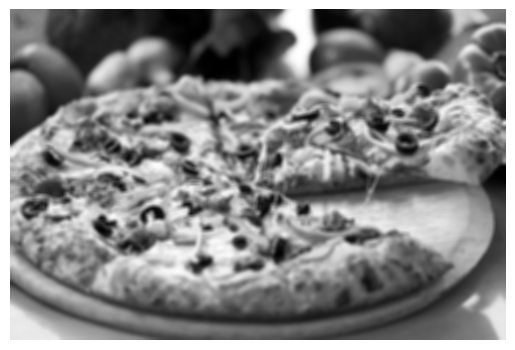

In [34]:
img_blur=average_blur_gray(img1_gray,5)
plt.imshow(img_blur,cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

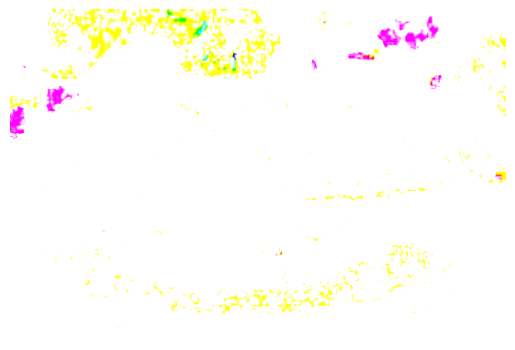

In [43]:
img_blur_rgb=average_blur(img1_rgb,3)
plt.imshow(img_blur_rgb)
plt.axis("off")

In [44]:
def gaussian_kernel(ksize, sigma):
  kernel=np.zeros((ksize,ksize),dtype=np.float32)
  center=ksize//2
  for i in range(ksize):
    for j in range(ksize):
      x=i-center
      y=j-center
      kernel[i,j]=np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)
  return kernel/np.sum(kernel)

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

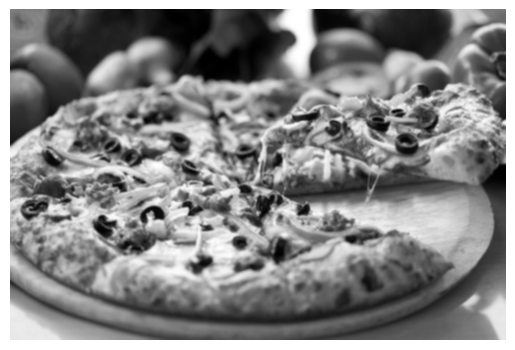

In [45]:
gaussian_k=gaussian_kernel(3,1)
img_blur_gaussian=convolve(img1_gray,gaussian_k)
plt.imshow(img_blur_gaussian,cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

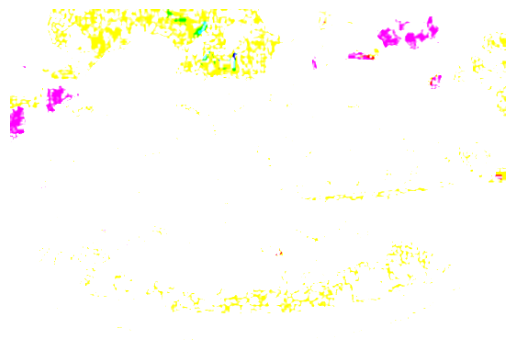

In [46]:
img_blur_gaussian_rgb=convolve_rgb(img1_rgb,gaussian_k)
plt.imshow(img_blur_gaussian_rgb)
plt.axis("off")

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [48]:
SOBEL_X = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)
SOBEL_Y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

In [49]:
Gx=convolve(img1_gray,SOBEL_X)
Gy=convolve(img1_gray,SOBEL_Y)

In [50]:
grad_mag = np.sqrt(Gx**2 + Gy**2)

In [51]:
grad_mag_norm = (grad_mag / grad_mag.max()) * 255
grad_mag_norm = grad_mag_norm.astype(np.uint8)

In [52]:
THRESHOLD = 100

edge_binary = np.zeros_like(grad_mag_norm)
edge_binary[grad_mag_norm >= THRESHOLD] = 255

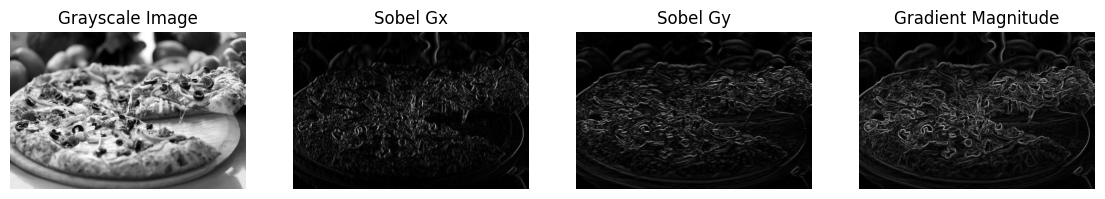

In [56]:
plt.figure(figsize=(14,6))

plt.subplot(1,4,1)
plt.imshow(img1_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(np.abs(Gx), cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(np.abs(Gy), cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(grad_mag_norm, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()


### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [57]:
LAPLACIAN_KERNEL = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
], dtype=np.float32)

In [59]:
lap = convolve(img1_gray, LAPLACIAN_KERNEL)

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

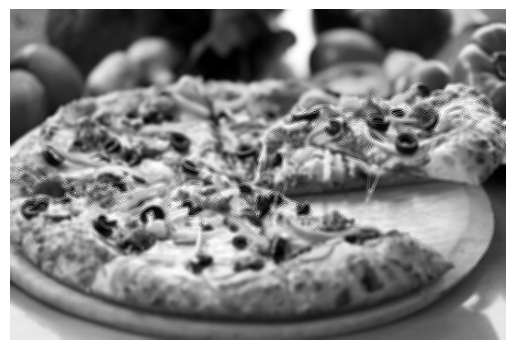

In [63]:
alpha = 0.5
sharp_alpha = img1_gray - lap * alpha
sharp_alpha = np.clip(sharp_alpha, 0, 255).astype(np.uint8)
plt.imshow(sharp_alpha, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

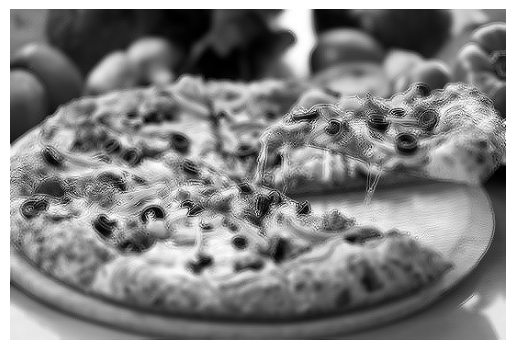

In [64]:
alpha = 1.0
sharp_alpha1 = img1_gray - lap
sharp_alpha1 = np.clip(sharp_alpha1, 0, 255).astype(np.uint8)
plt.imshow(sharp_alpha1, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

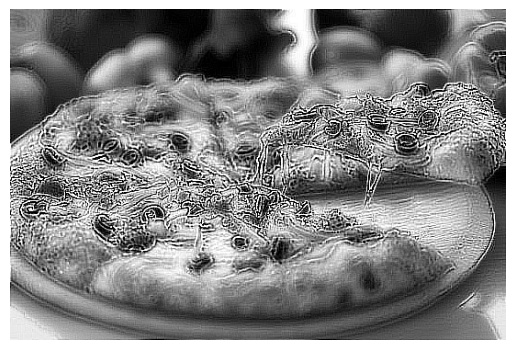

In [74]:
import cv2
lap_cv = cv2.Laplacian(img1_gray, cv2.CV_32F, ksize=3)
sharp_cv = img1_gray + lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255).astype(np.uint8)
plt.imshow(sharp_cv, cmap='gray')
plt.axis("off")

In [80]:
sharp_cv_add = img1_gray + lap_cv
sharp_cv_add = np.clip(sharp_cv_add, 0, 255).astype(np.uint8)

diff = np.abs(sharp_alpha1.astype(int) - sharp_cv_add.astype(int))
print("Max difference (with +):", diff.max())

Max difference (with +): 251


In [83]:
kernel = gaussian_kernel(ksize=5, sigma=1.0)
blurred = convolve(img1_gray, kernel)
mask = img1_gray - blurred

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

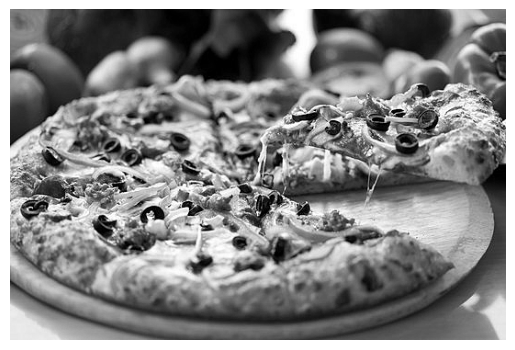

In [86]:
alpha = 0.7
sharp_unsharp = img1_gray + alpha * mask
sharp_unsharp = np.clip(sharp_unsharp, 0, 255).astype(np.uint8)
plt.imshow(sharp_unsharp, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(539.5), np.float64(359.5), np.float64(-0.5))

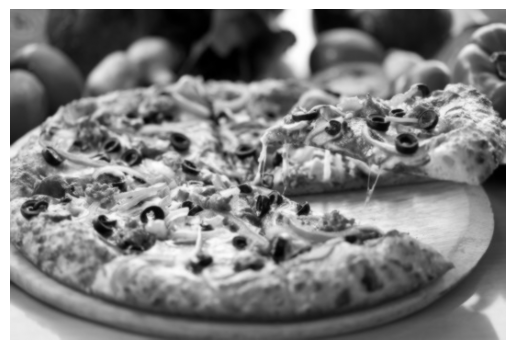

In [87]:
alpha_neg = -0.7
blur_from_unsharp = img1_gray + alpha_neg * mask
blur_from_unsharp = np.clip(blur_from_unsharp, 0, 255).astype(np.uint8)
plt.imshow(blur_from_unsharp, cmap='gray')
plt.axis("off")

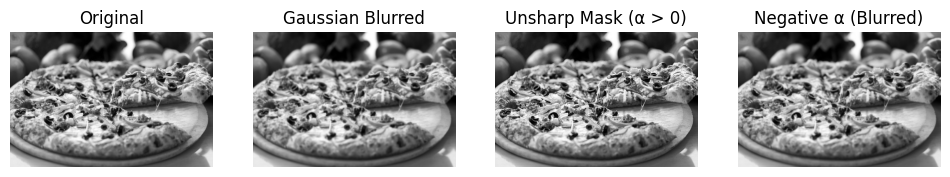

In [90]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img1_gray.astype(np.uint8), cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(sharp_unsharp, cmap='gray')
plt.title("Unsharp Mask (α > 0)")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(blur_from_unsharp, cmap='gray')
plt.title("Negative α (Blurred)")
plt.axis("off")

plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [93]:
def magnitude_spectrum(img):
    img = img.astype(np.float32)
    F = np.fft.fft2(img)
    F_shifted = np.fft.fftshift(F)
    magnitude = 20*np.log(1 + np.abs(F_shifted))
    return magnitude

In [95]:
mag_original = magnitude_spectrum(img1_gray)
mag_blurred = magnitude_spectrum(blurred)
mag_unsharp = magnitude_spectrum(sharp_unsharp)

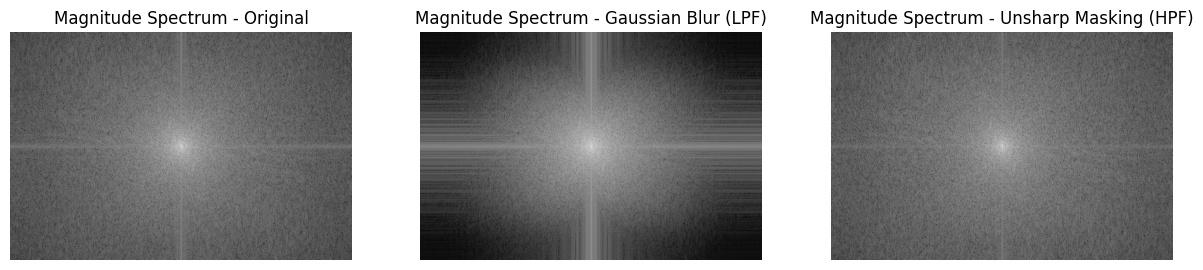

In [96]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(mag_original, cmap='gray')
plt.title("Magnitude Spectrum - Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mag_blurred, cmap='gray')
plt.title("Magnitude Spectrum - Gaussian Blur (LPF)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(mag_unsharp, cmap='gray')
plt.title("Magnitude Spectrum - Unsharp Masking (HPF)")
plt.axis("off")

plt.show()


For Gaussian Blur case(as we smooth a image it should behave like LPF)
- Center becomes MUCH brighter
- Outer regions become darker
- High frequencies (edges) are suppressed

For Unsharp Masking case(as we sharp edges it should behave like HPF)
- Outer regions (high frequencies) become brighter
- Center remains similar or slightly reduced
- Edge frequencies are amplified

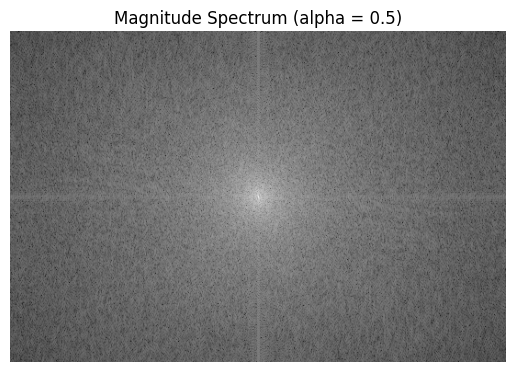

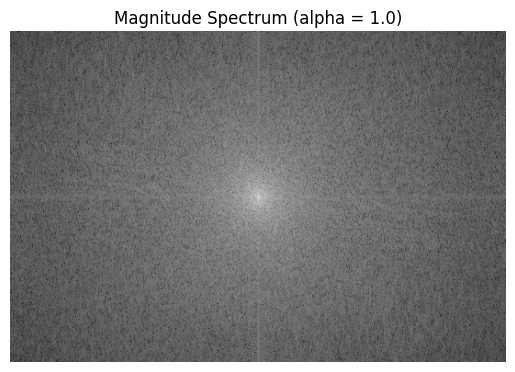

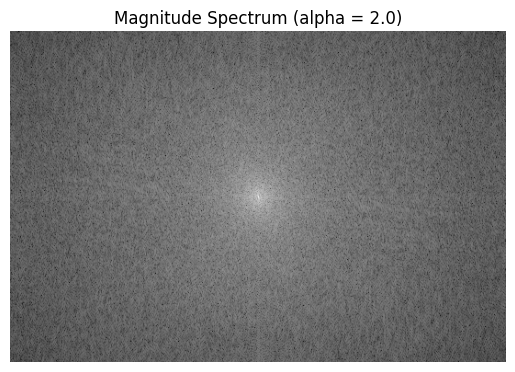

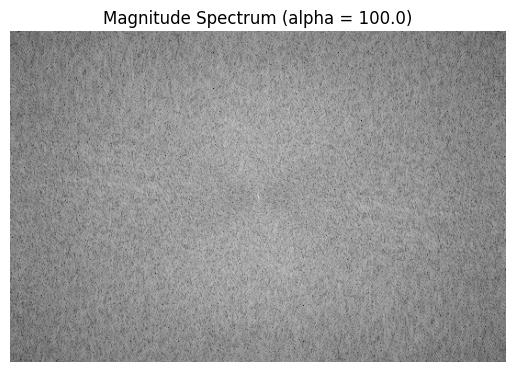

In [98]:
for alpha in [0.5, 1.0, 2.0,100.0]:
    unsharp = img1_gray + alpha * (img1_gray - blurred)
    mag = magnitude_spectrum(unsharp)

    plt.imshow(mag, cmap='gray')
    plt.title(f"Magnitude Spectrum (alpha = {alpha})")
    plt.axis("off")
    plt.show()

- Increasing alpha increases brightness in outer frequency regions
- High-frequency amplification becomes stronger
- Excessive alpha exaggerates noise (very bright outer regions)

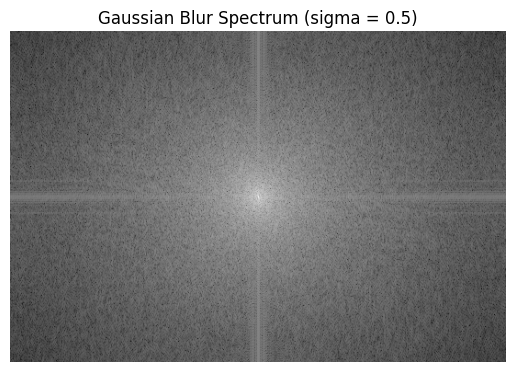

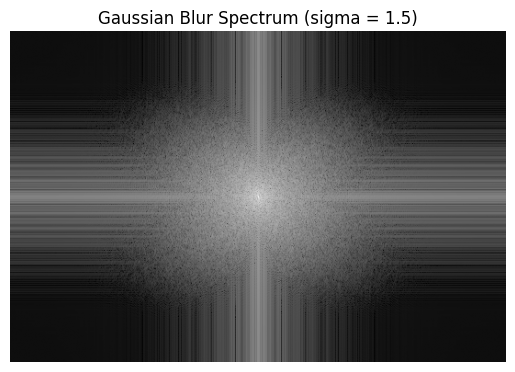

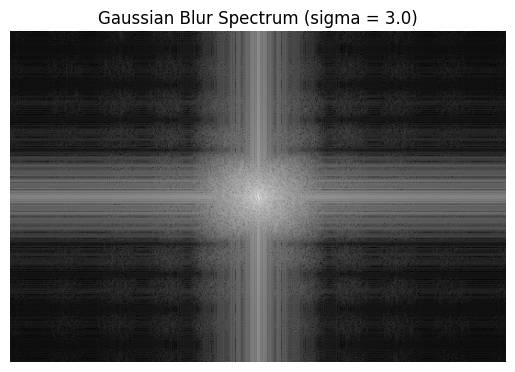

In [99]:
for sigma in [0.5, 1.5, 3.0]:
    kernel = gaussian_kernel(ksize=9, sigma=sigma)
    blur = convolve(img1_gray, kernel)
    mag = magnitude_spectrum(blur)

    plt.imshow(mag, cmap='gray')
    plt.title(f"Gaussian Blur Spectrum (sigma = {sigma})")
    plt.axis("off")
    plt.show()


- Larger sigma → stronger blur
- High frequencies suppressed more
- Spectrum becomes more concentrated at center

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

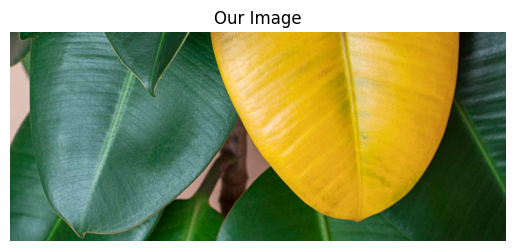

In [100]:
img_rgb=np.array(img)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [101]:
print(img_rgb)

[[[ 53  77  55]
  [ 53  77  55]
  [ 54  78  56]
  ...
  [ 58  93  89]
  [ 66 101  97]
  [ 72 107 103]]

 [[ 53  77  55]
  [ 53  77  55]
  [ 54  78  56]
  ...
  [ 61  96  92]
  [ 68 103  99]
  [ 73 108 104]]

 [[ 54  78  56]
  [ 54  78  56]
  [ 55  77  56]
  ...
  [ 66 101  97]
  [ 71 106 102]
  [ 74 109 105]]

 ...

 [[ 57 108  91]
  [ 57 108  91]
  [ 56 107  90]
  ...
  [ 13  39  12]
  [ 12  38  11]
  [ 11  37  10]]

 [[ 57 108  91]
  [ 57 108  91]
  [ 56 107  90]
  ...
  [ 13  39  12]
  [ 11  37  10]
  [ 10  36   9]]

 [[ 57 108  91]
  [ 57 108  91]
  [ 56 107  90]
  ...
  [ 13  39  12]
  [ 10  36   9]
  [  9  35   8]]]


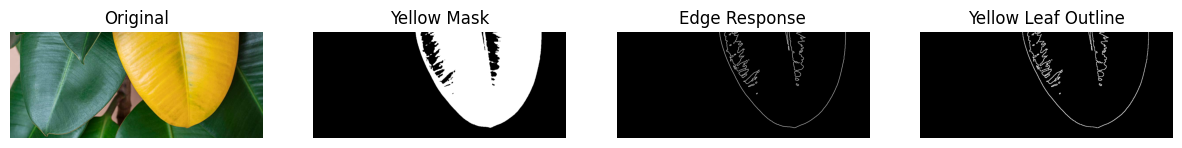

In [137]:
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

yellow_score = R + G - 2*B
yellow_score = (yellow_score - yellow_score.min()) / (yellow_score.max() - yellow_score.min())

yellow_mask = np.zeros_like(yellow_score)
yellow_mask[yellow_score > 0.55] = 1   # isolates yellow leaf

Kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
Ky = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)

gx = convolve(yellow_mask, Kx)
gy = convolve(yellow_mask, Ky)
edges = np.sqrt(gx**2 + gy**2)

edges = (edges / edges.max() * 255).astype(np.uint8)

edge_binary = np.zeros_like(edges)
edge_binary[edges > 50] = 255

plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
plt.imshow(img_rgb.astype(np.uint8))
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(yellow_mask, cmap="gray")
plt.title("Yellow Mask")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(edges, cmap="gray")
plt.title("Edge Response")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(edge_binary, cmap="gray")
plt.title("Yellow Leaf Outline")
plt.axis("off")

plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
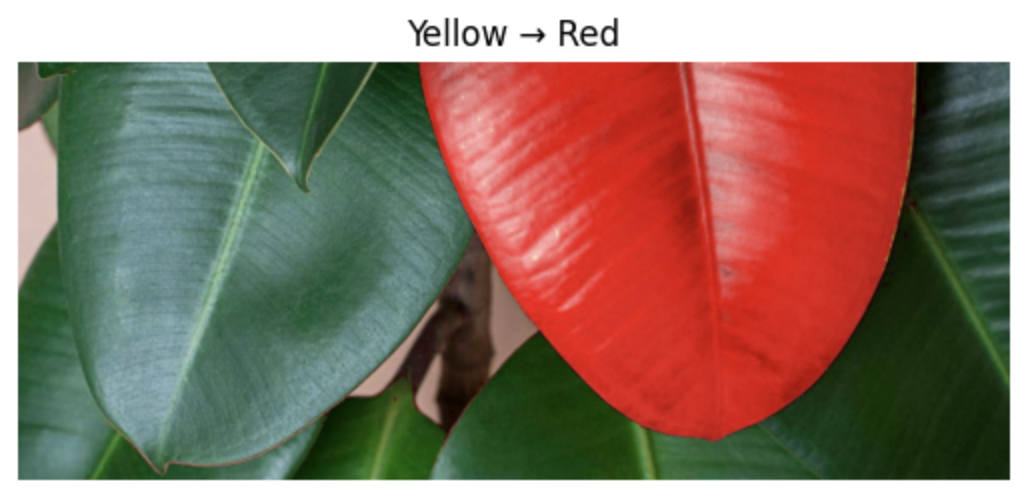

Also, we can change to a less brighter colour
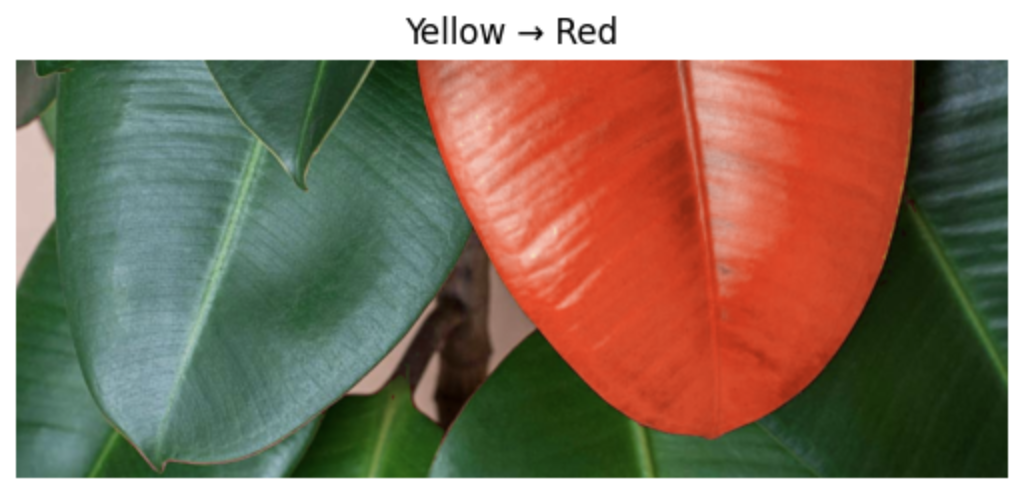

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.